In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
file_ex = '/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_females/8wks_120923/session_20231209161248/depth.dat'

In [71]:
data = np.memmap(file_ex, dtype=np.uint16)
data = data.reshape((-1, 424, 512))

In [72]:
data.shape

(53947, 424, 512)

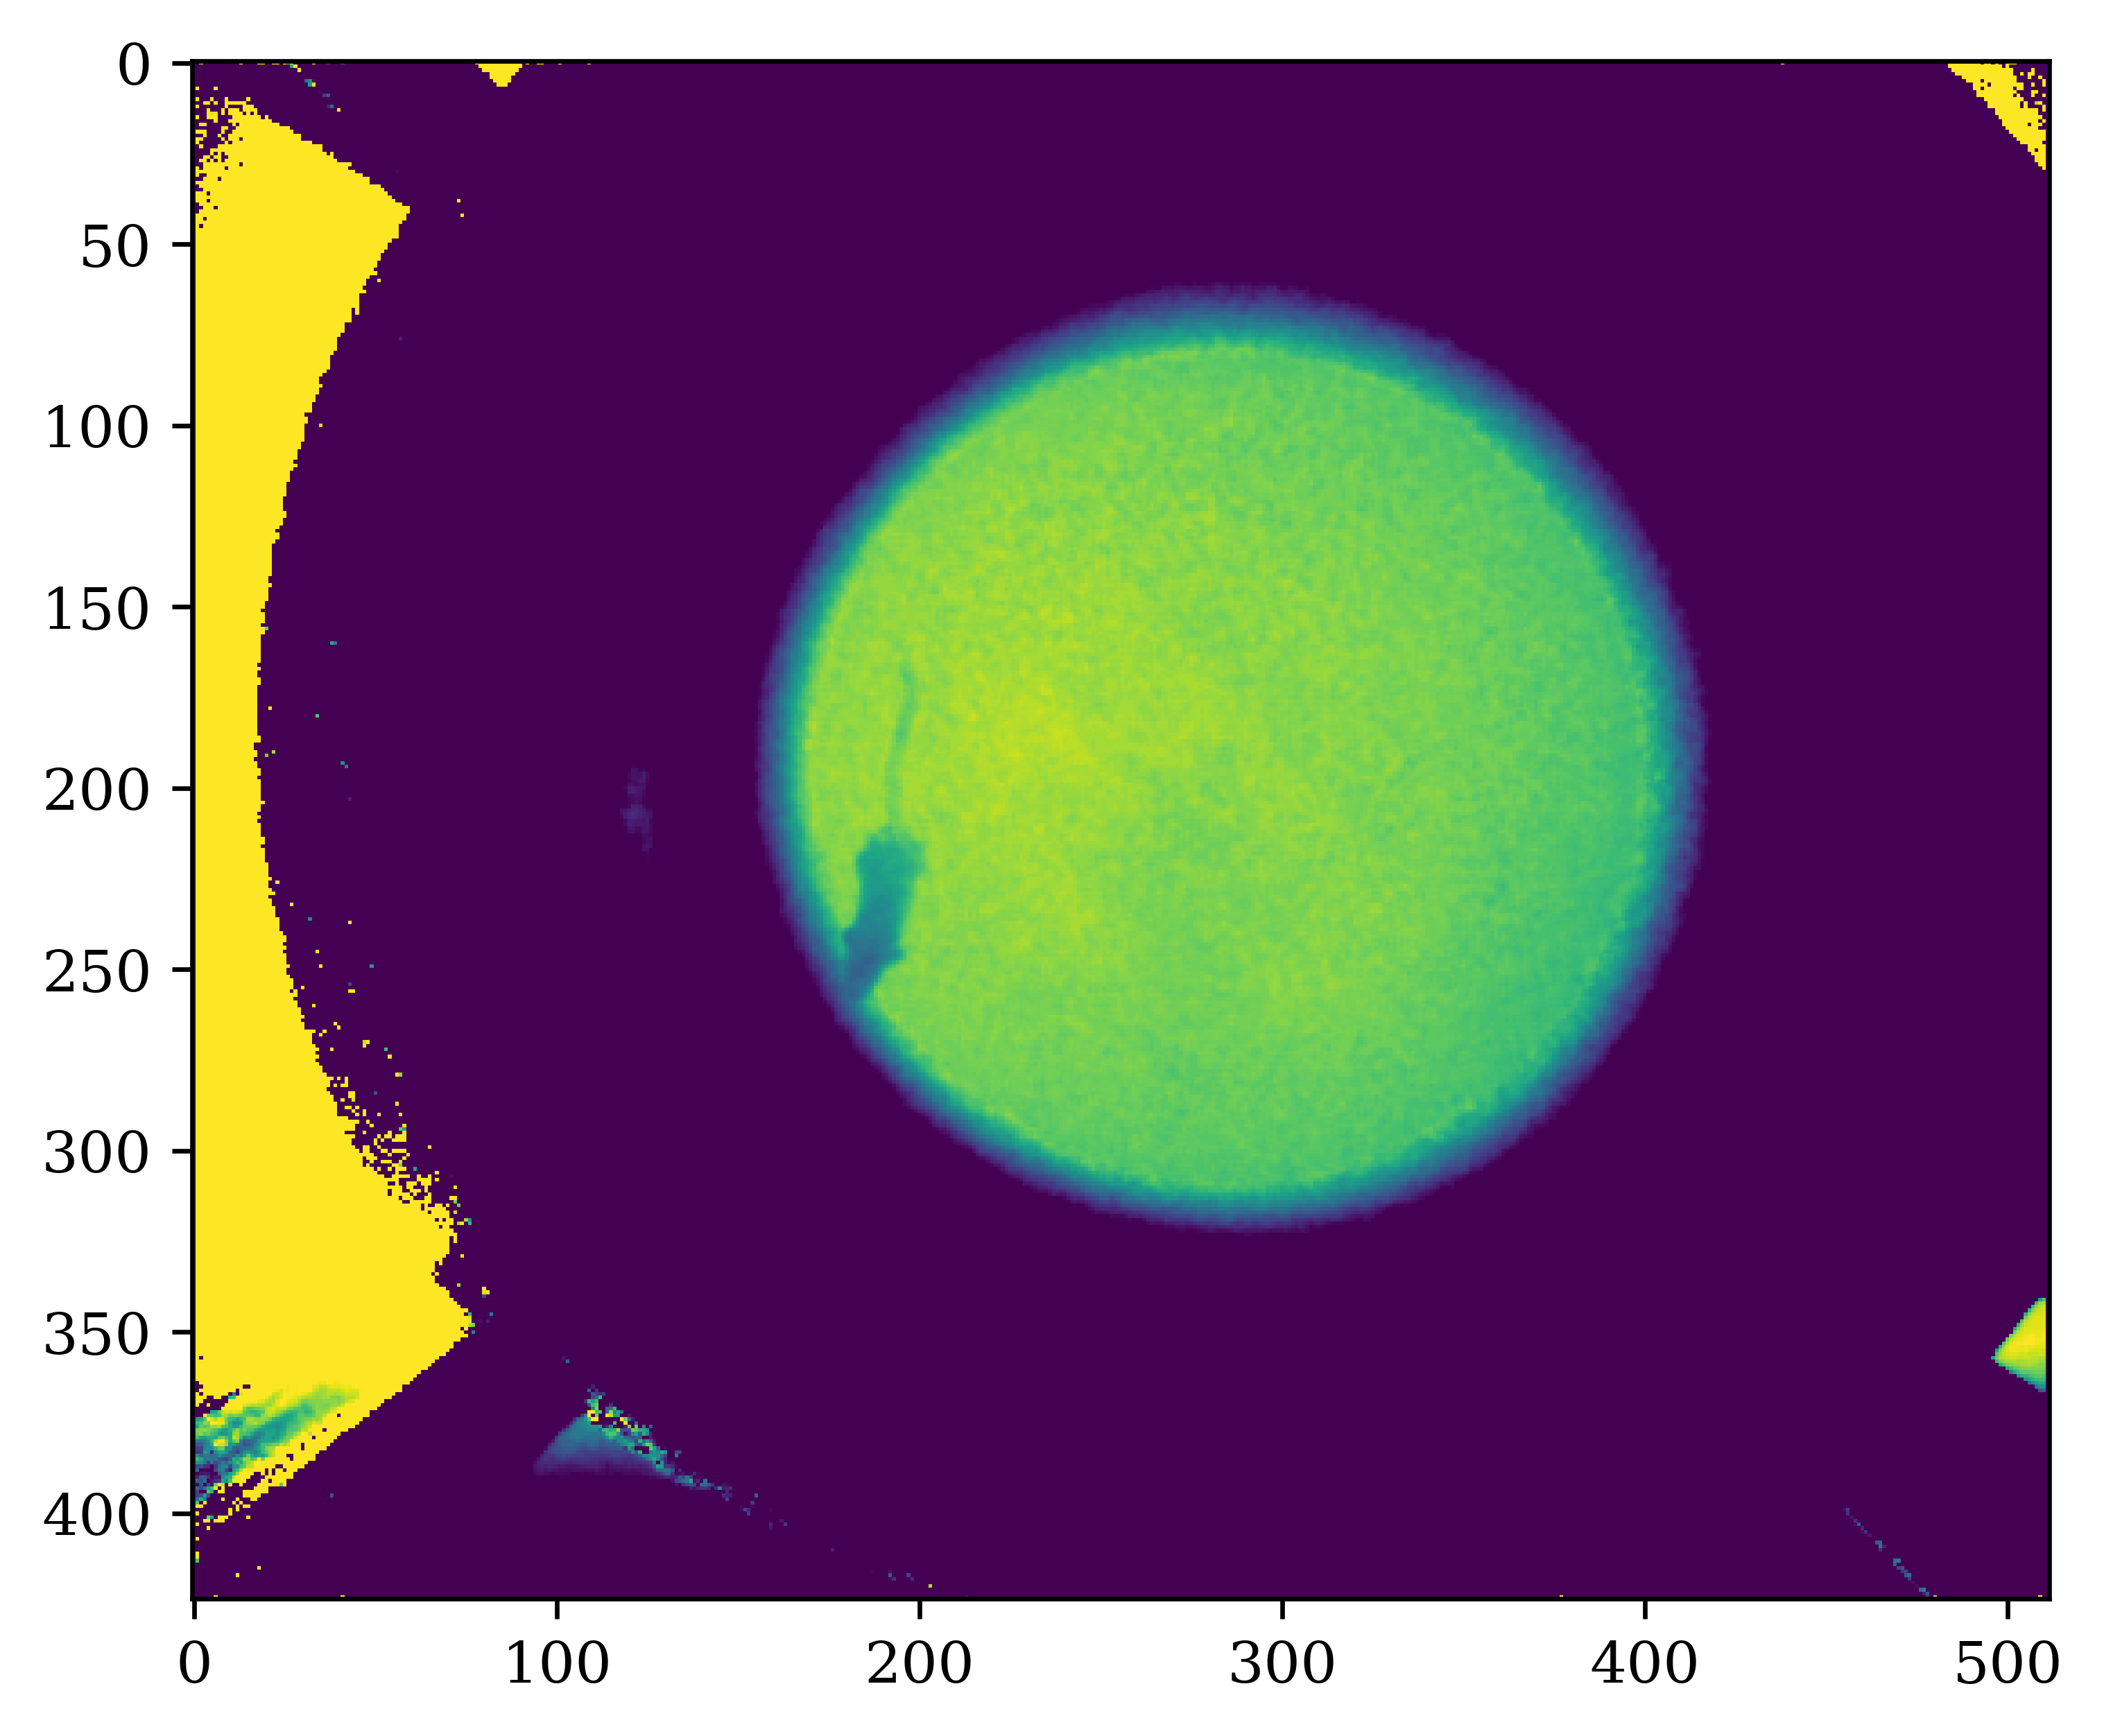

In [73]:
plt.imshow(data[1], vmin=600, vmax=700)

In [74]:
bg = np.median(data[::100], axis=0)

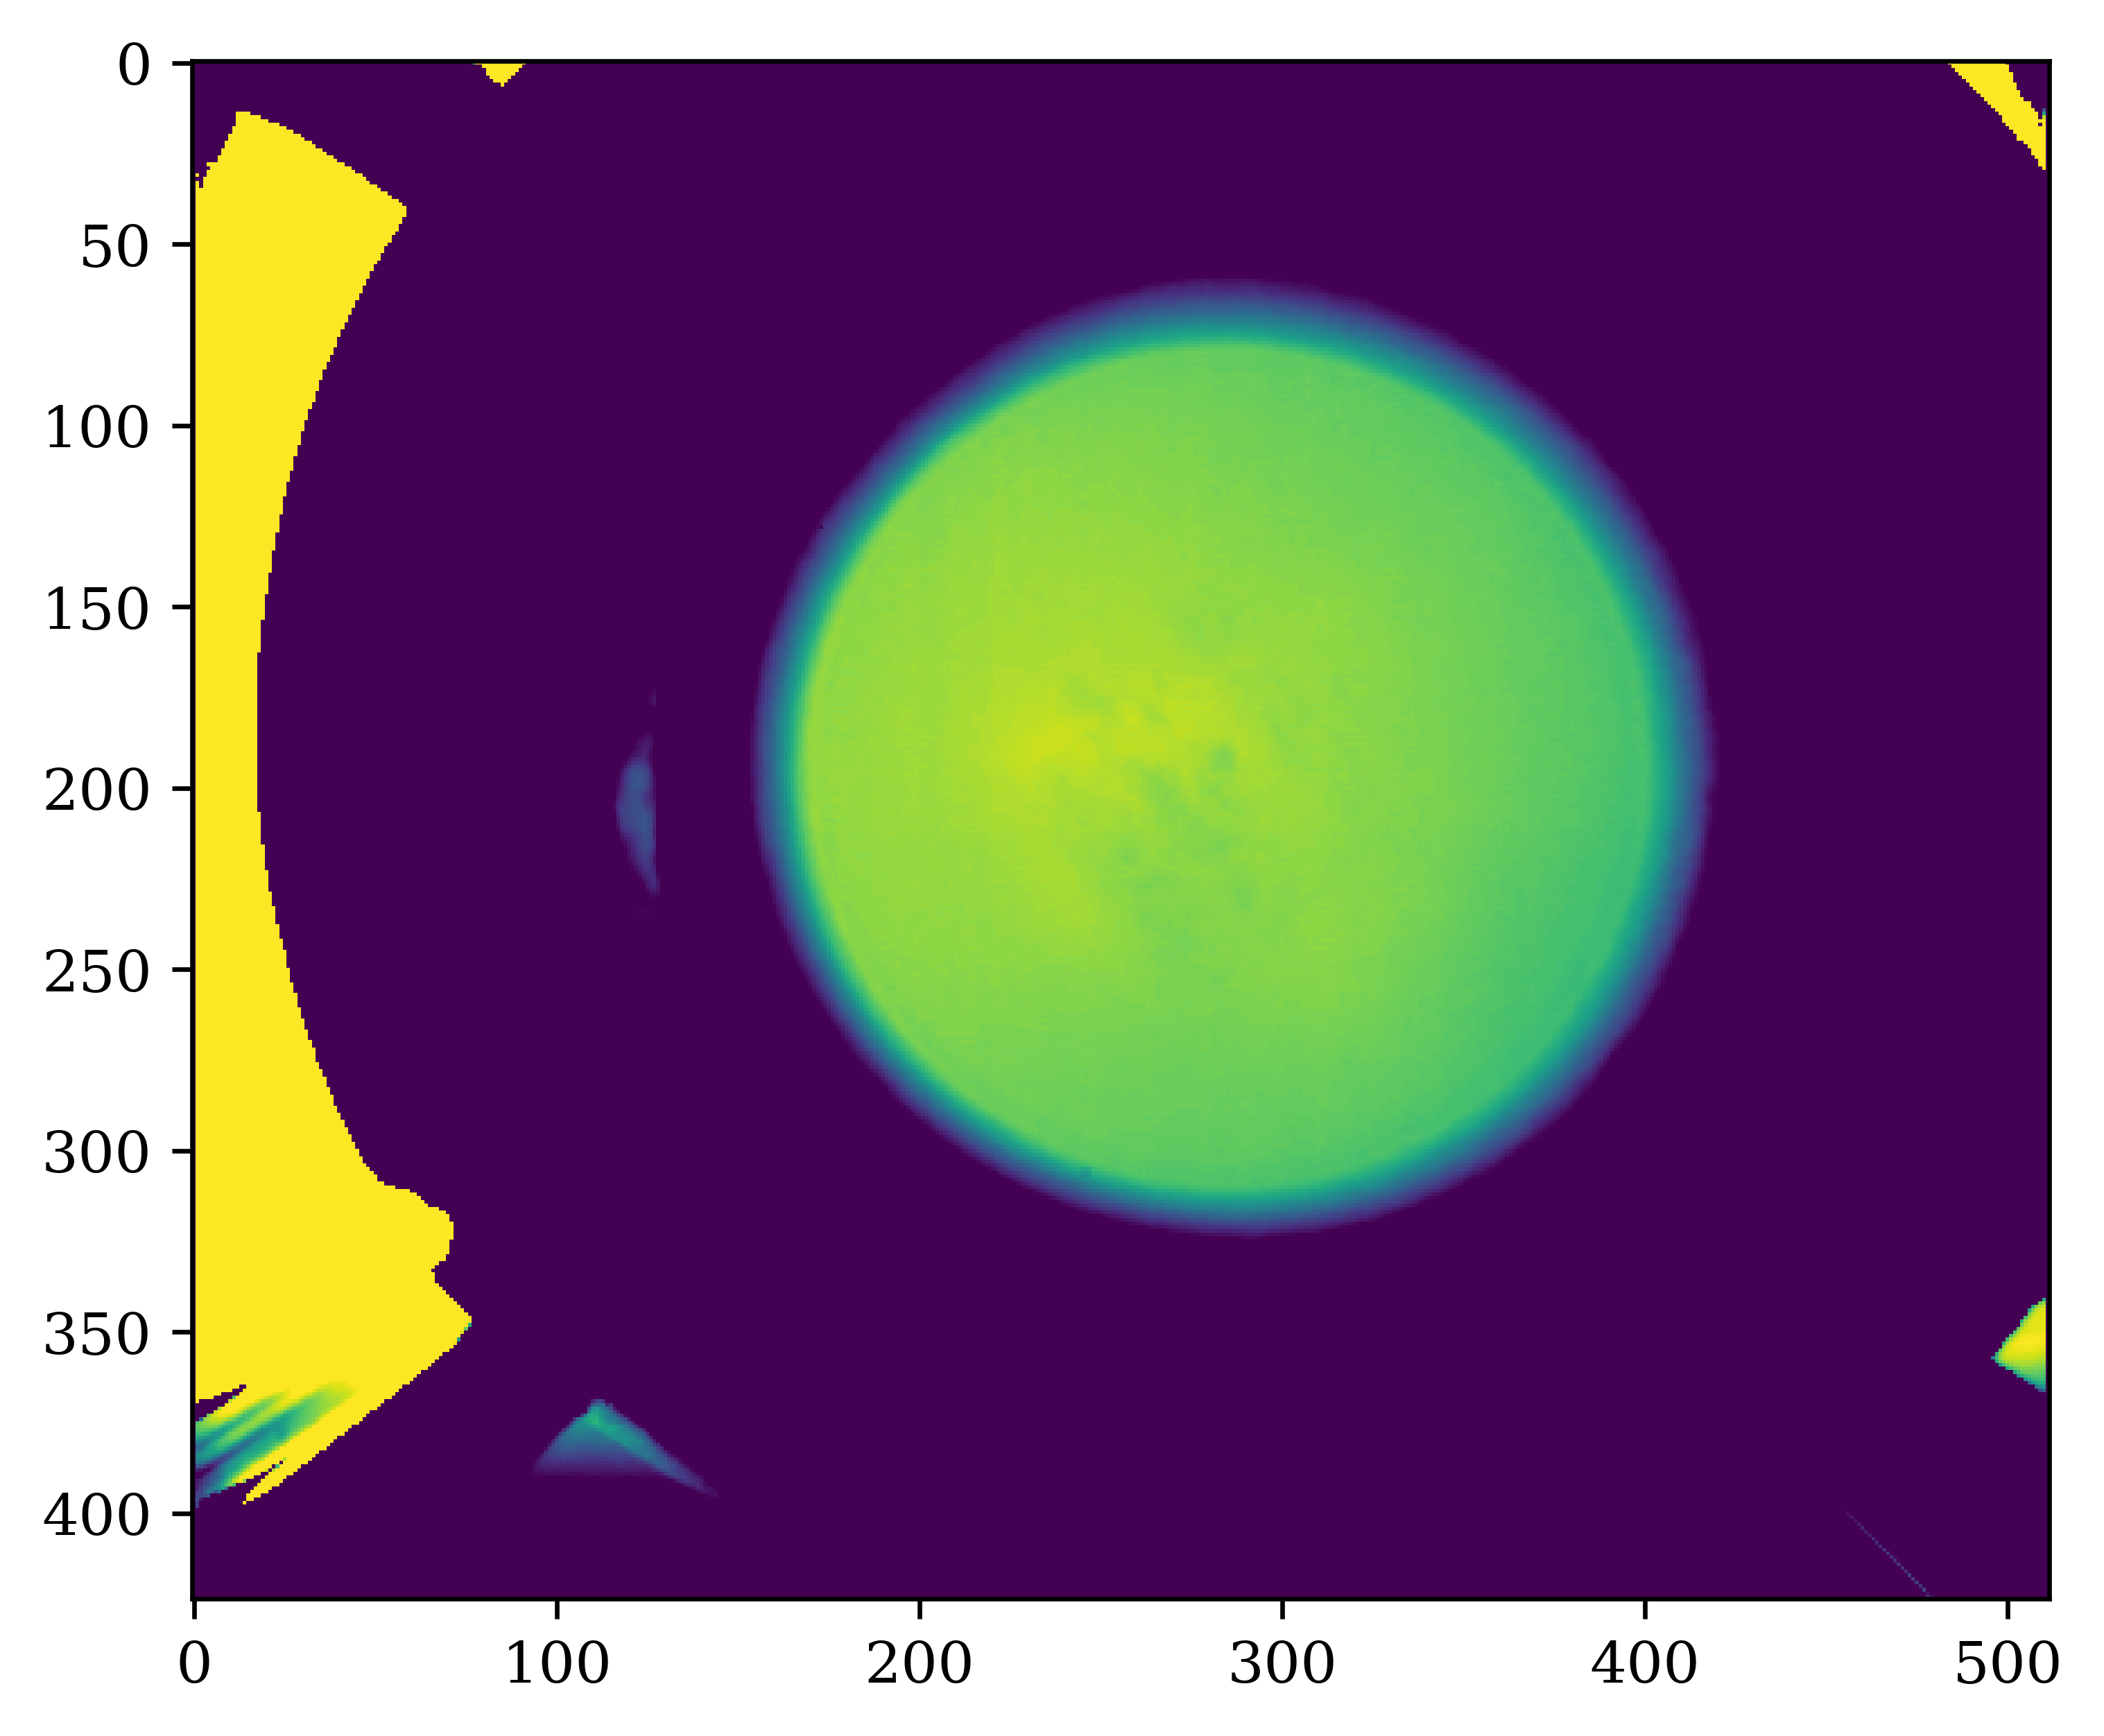

In [75]:
plt.imshow(bg, vmin=600, vmax=700)

In [76]:
bg = bg.astype('float32')

In [82]:
smooth_bg = cv2.medianBlur(bg, ksize=5)
smooth_bg = cv2.GaussianBlur(smooth_bg, ksize=(9, 9), sigmaX=2, sigmaY=2)

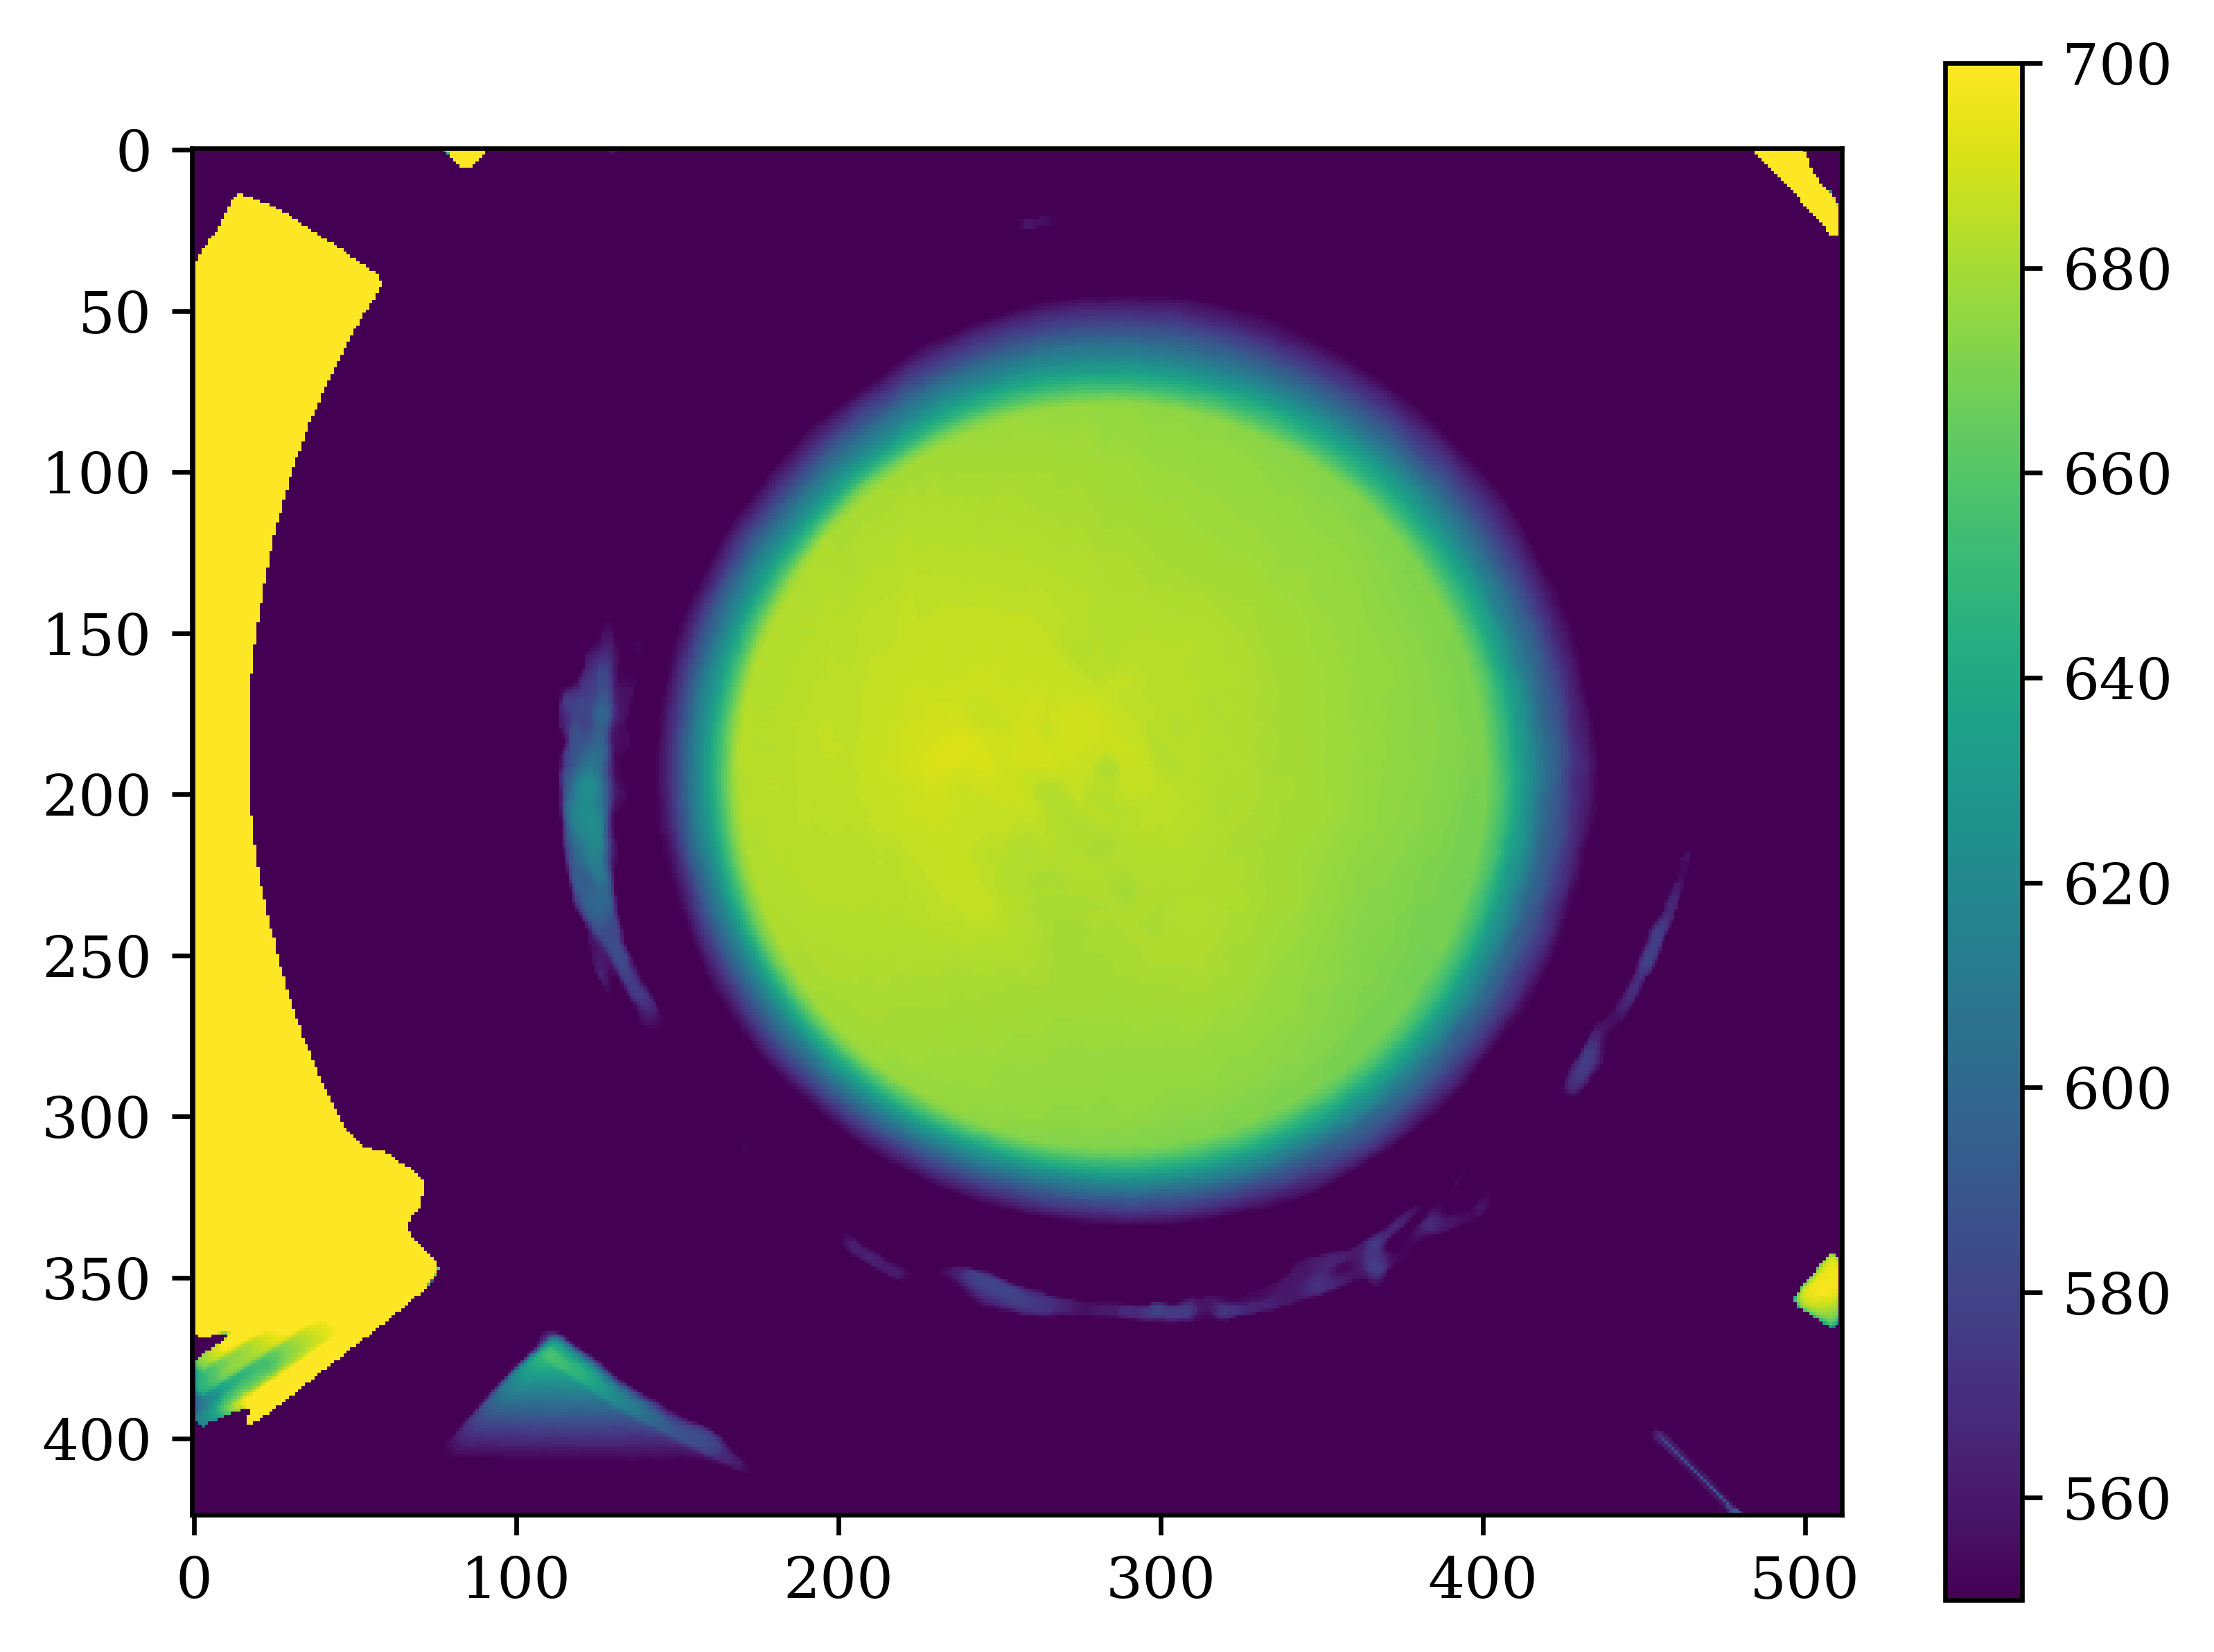

In [83]:
plt.imshow(smooth_bg, vmin=550, vmax=700)
plt.colorbar()

In [79]:
smooth_bg.dtype

dtype('float32')

In [80]:
data[0].astype('float32').dtype

dtype('float32')

In [85]:
bg2 = np.median(data[:100], axis=0)

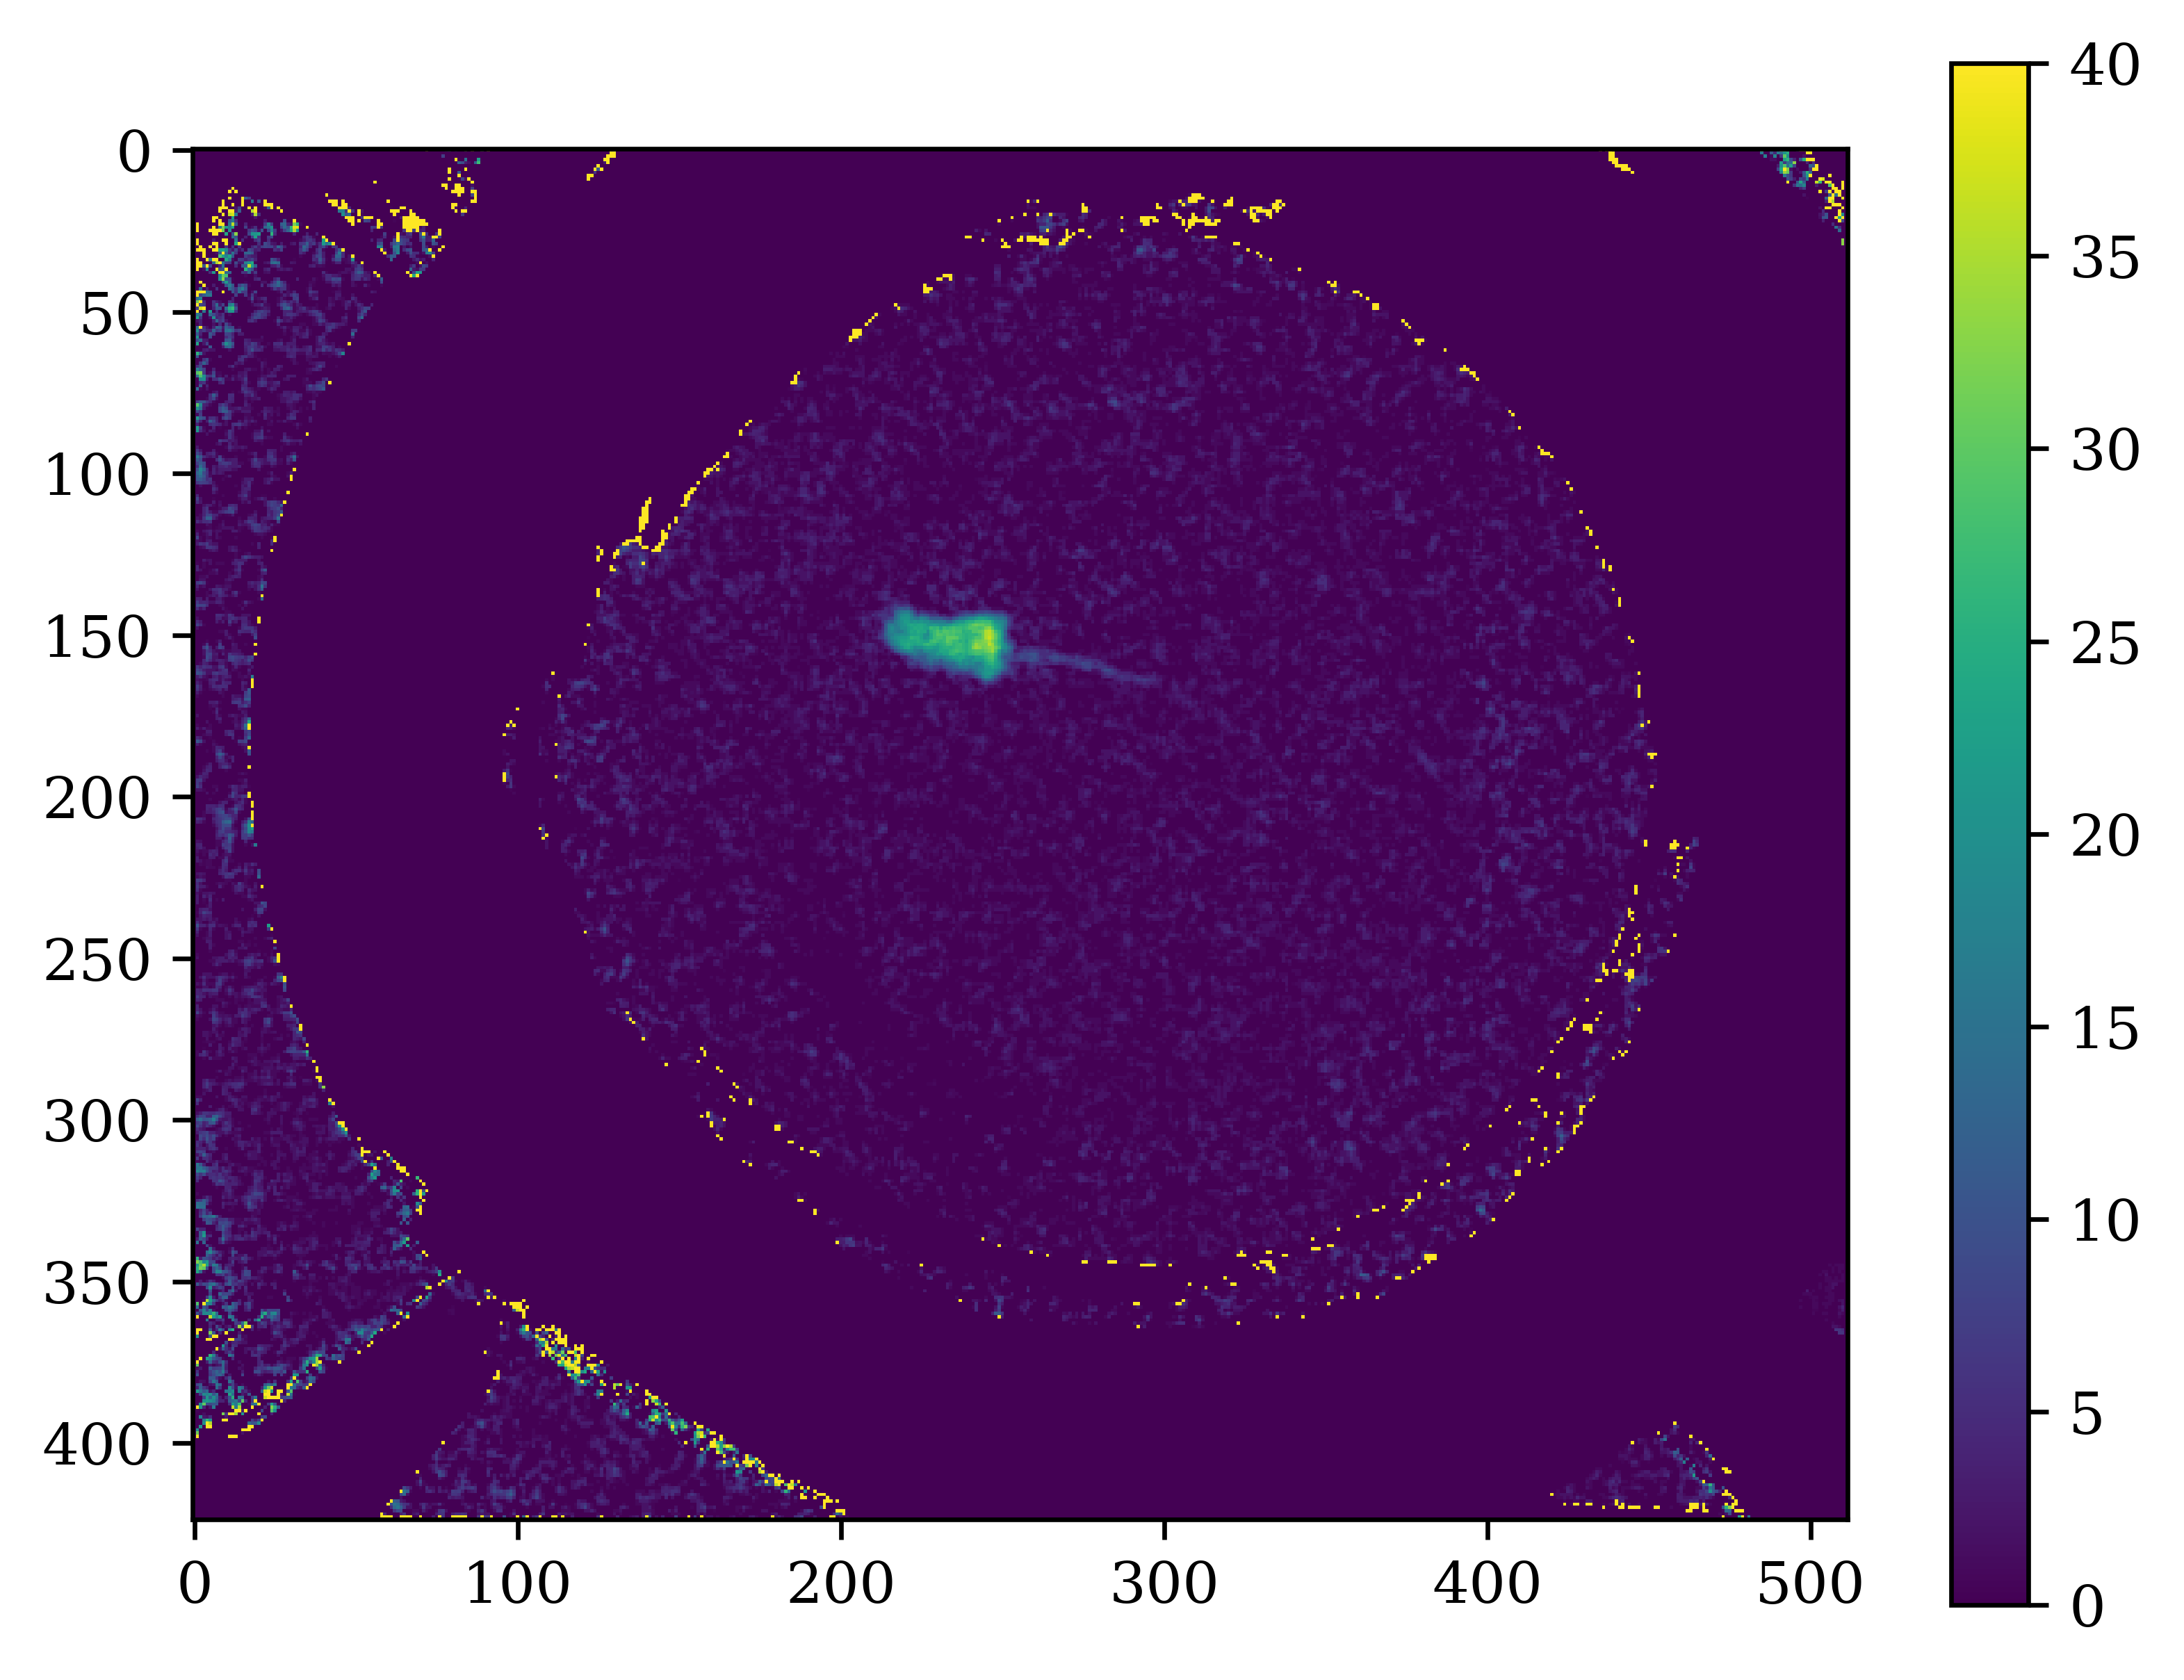

In [86]:
# plt.imshow(smooth_bg.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
plt.imshow(bg2.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

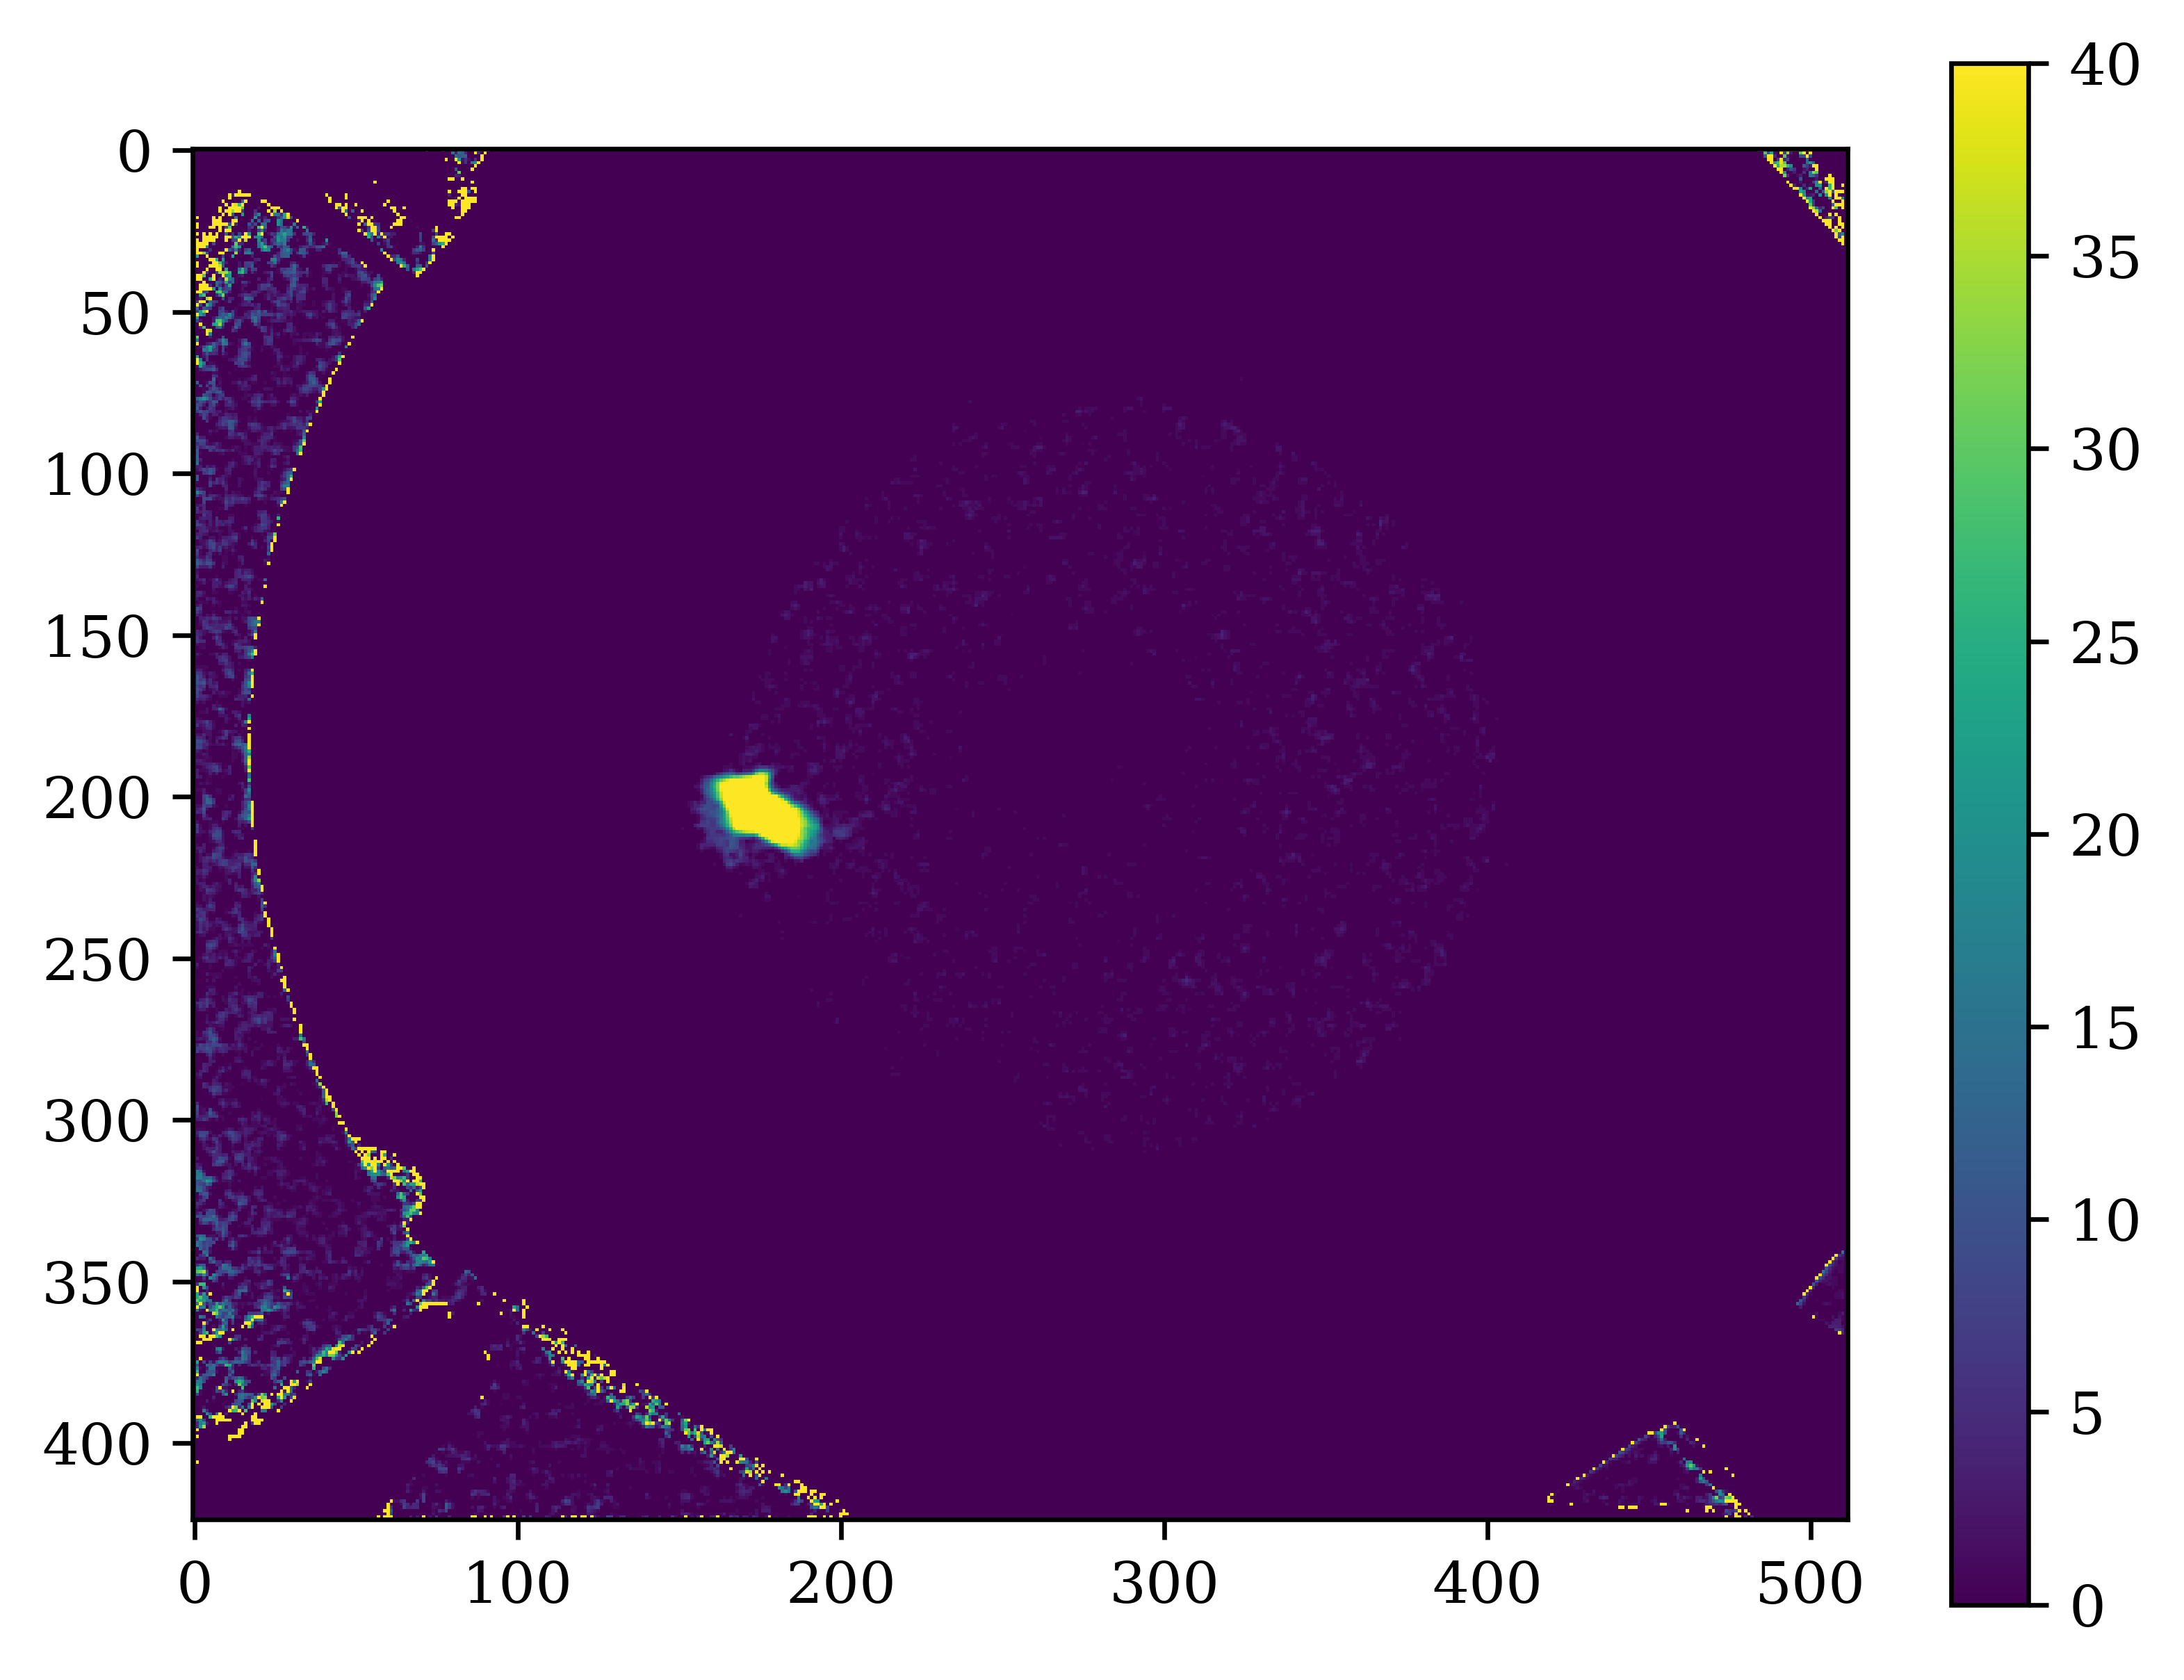

In [87]:
# plt.imshow(smooth_bg.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
plt.imshow(bg2.astype('float32') - data[-316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

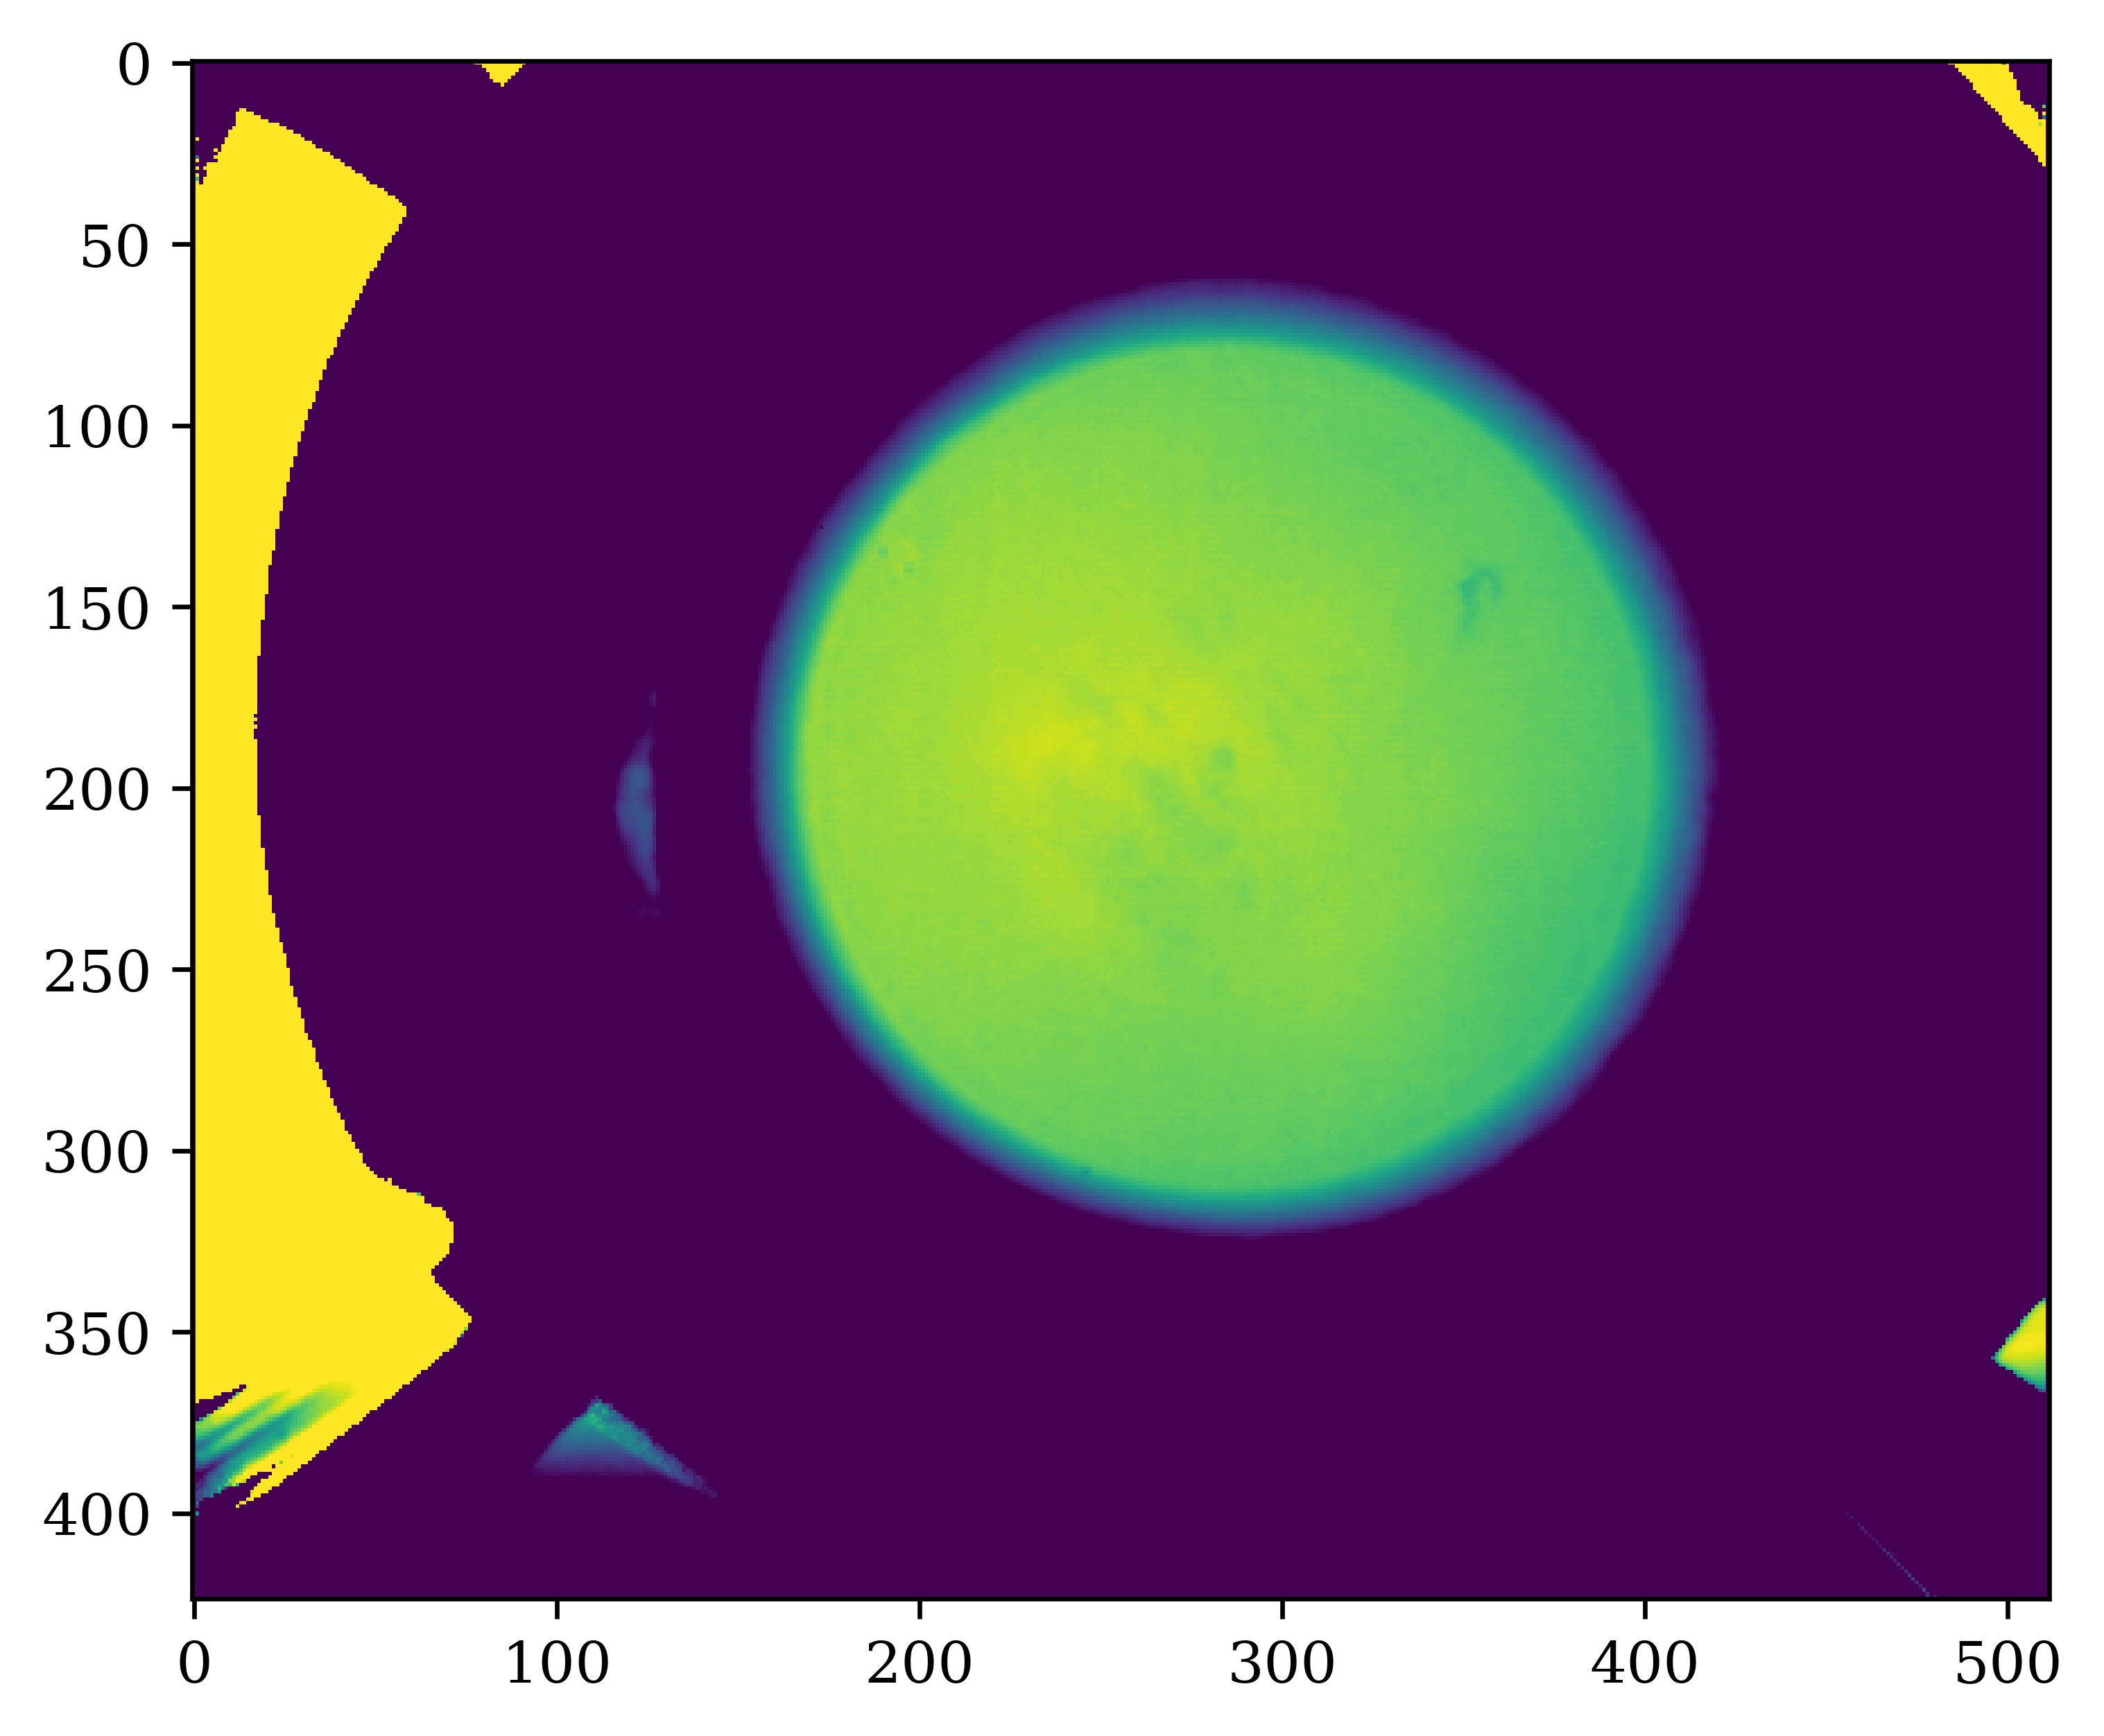

In [89]:
plt.imshow(np.median(data[-100:], axis=0), vmin=600, vmax=700)

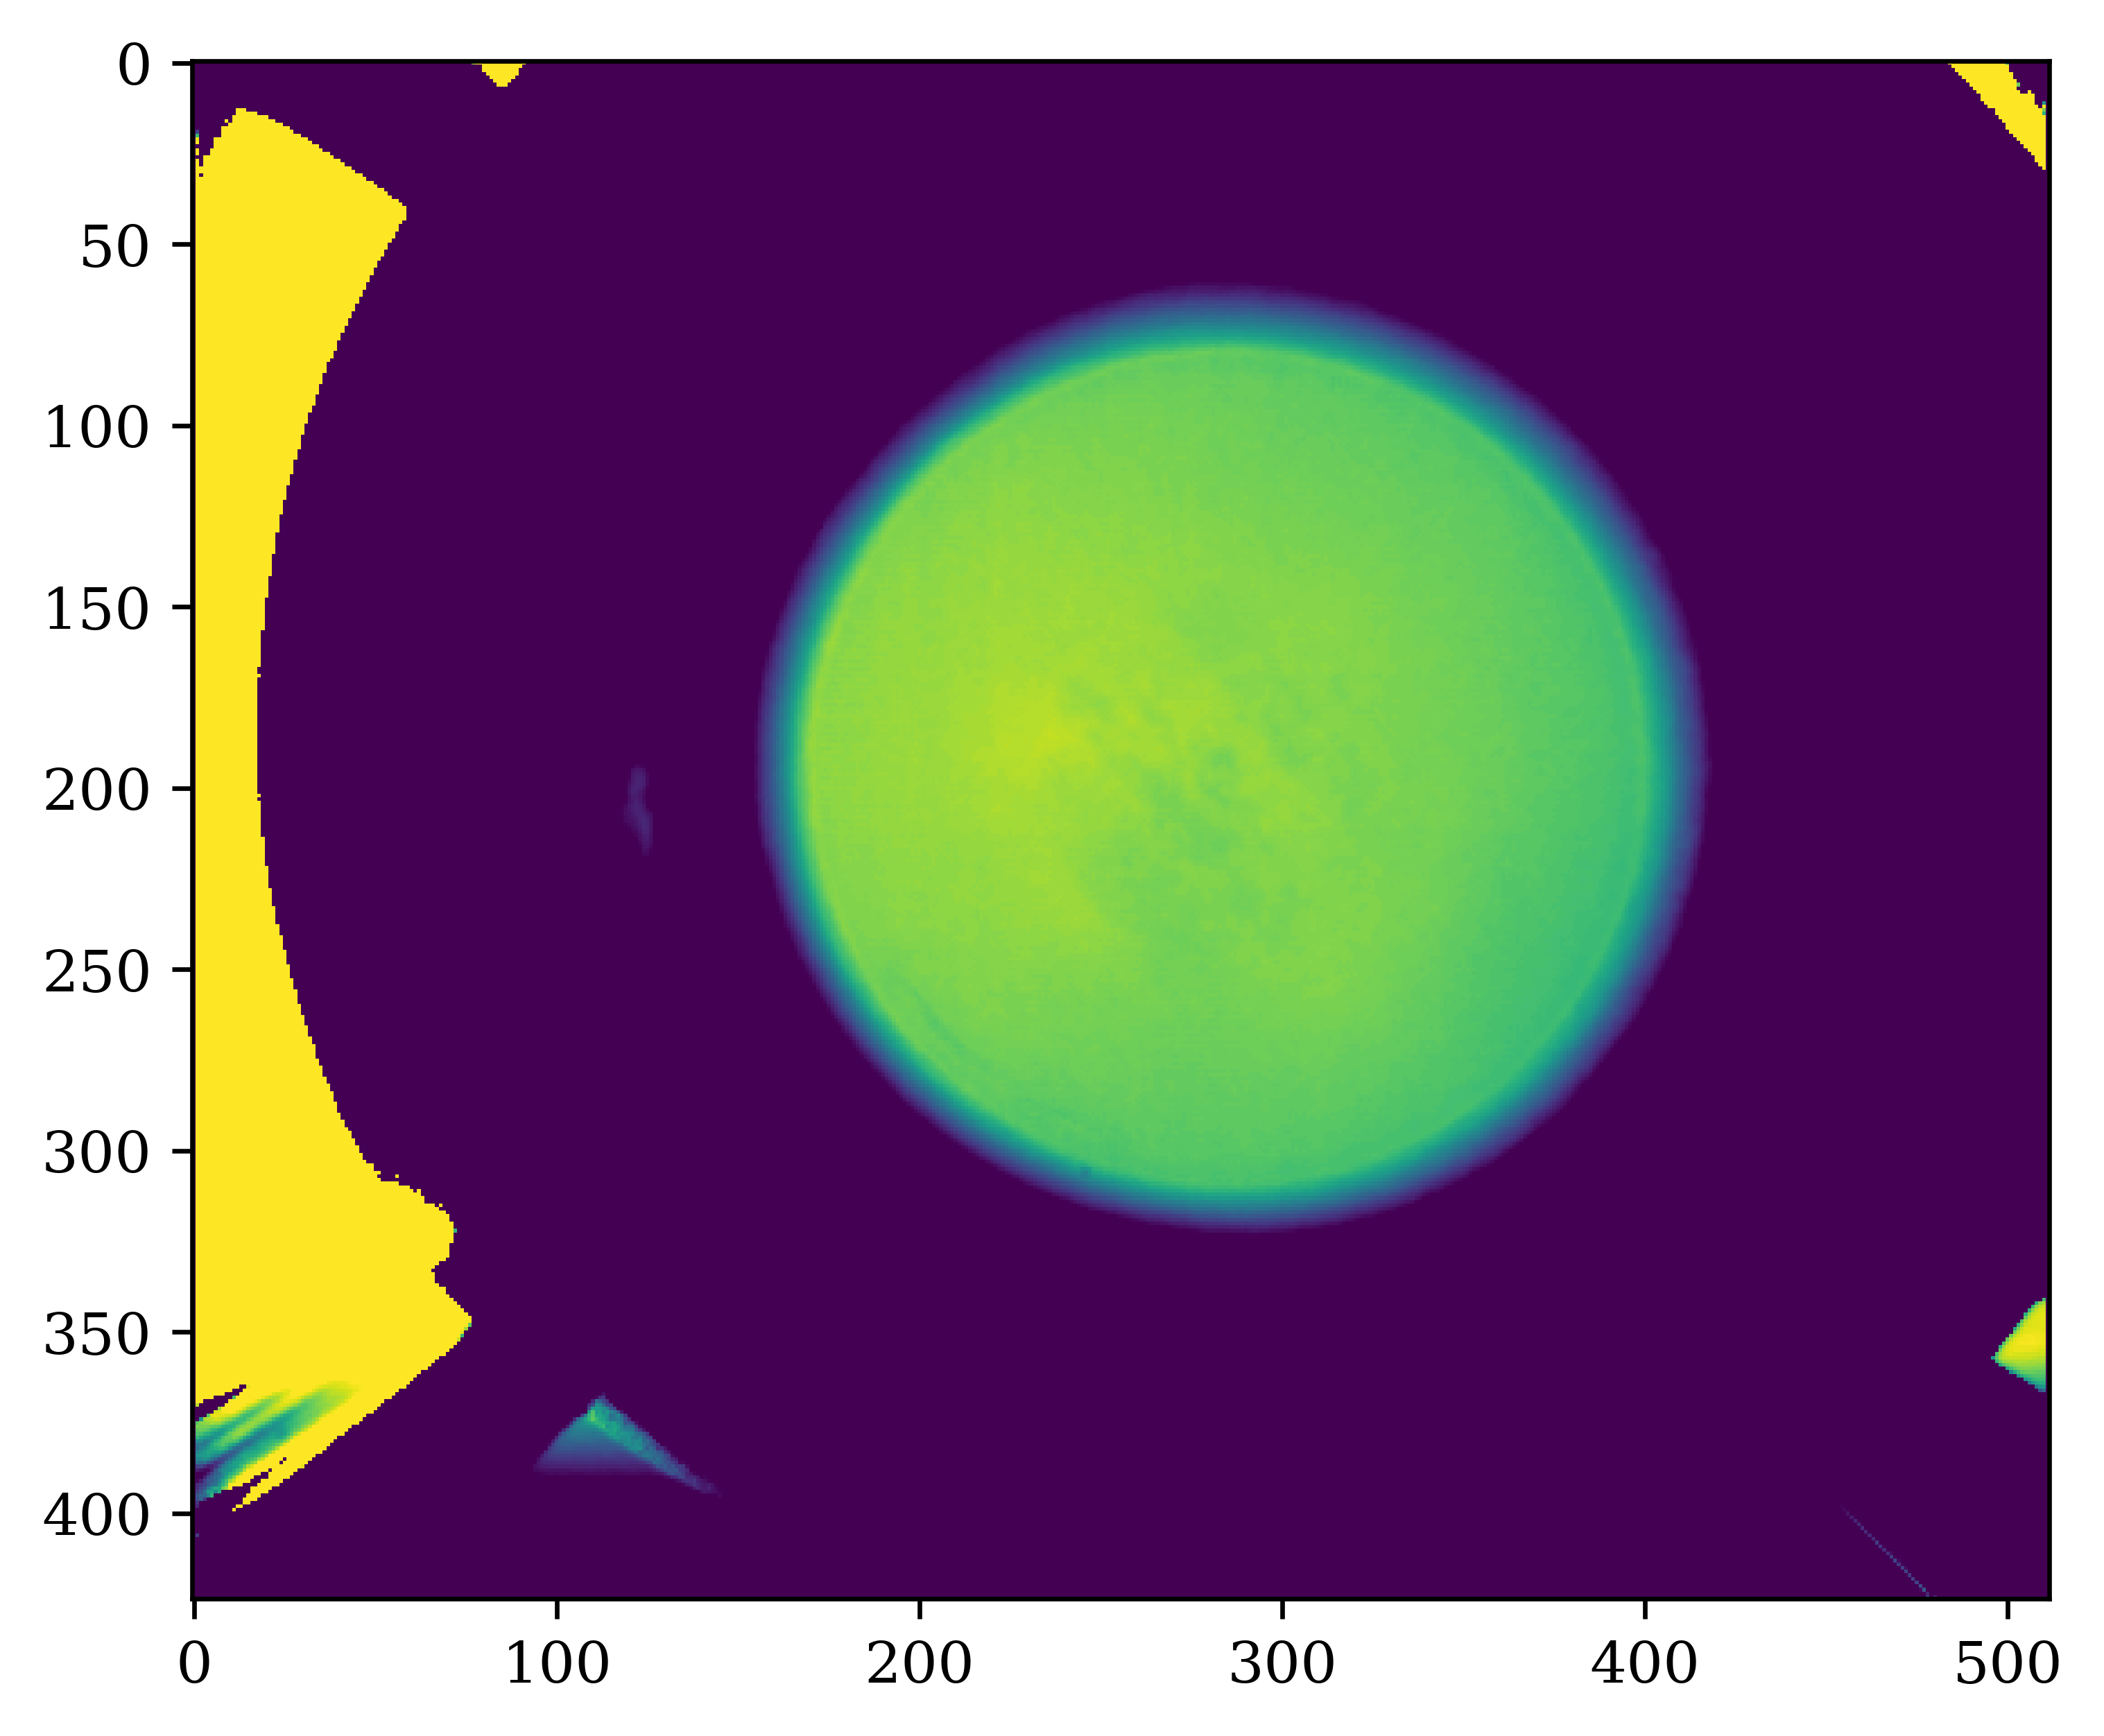

In [90]:
plt.imshow(np.median(data[:100], axis=0), vmin=600, vmax=700)

In [91]:
x = np.median(data[-100:], axis=0) -  np.median(data[:100], axis=0)

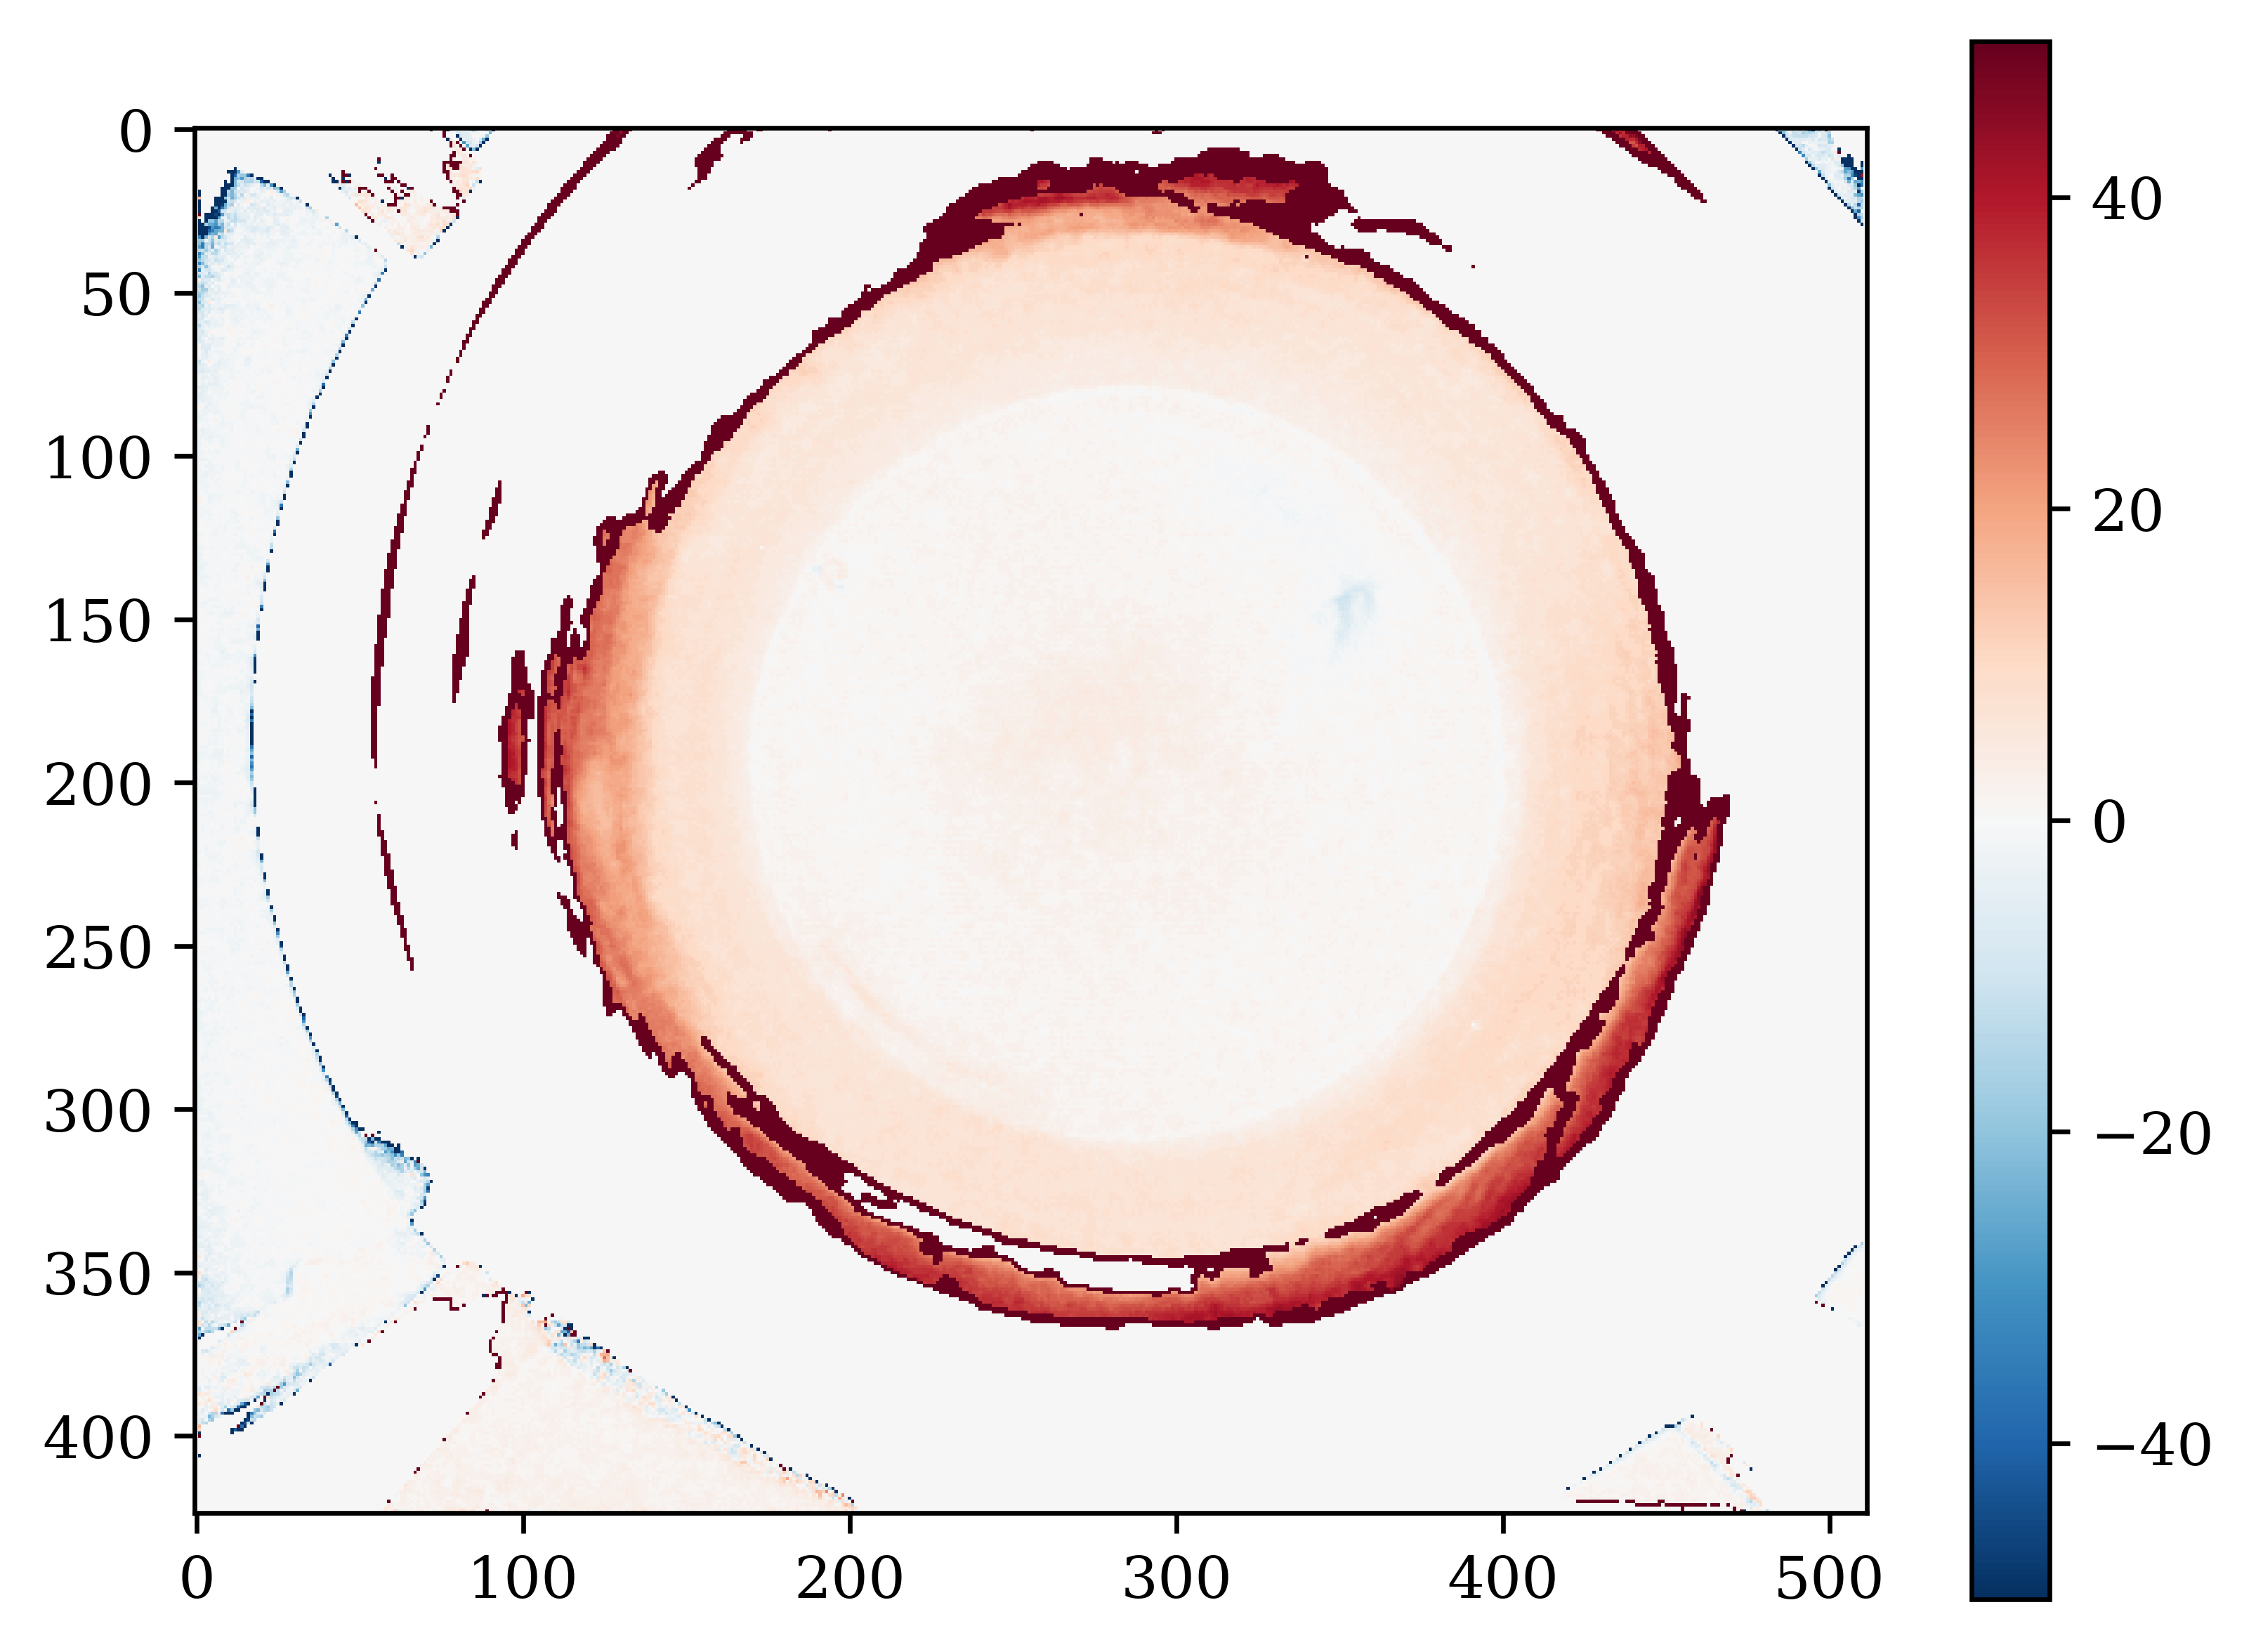

In [96]:
plt.imshow(x, vmin=-50, vmax=50, cmap='RdBu_r')
plt.colorbar()

In [112]:
px = data[:, 75, 300]
px = pd.Series(px)

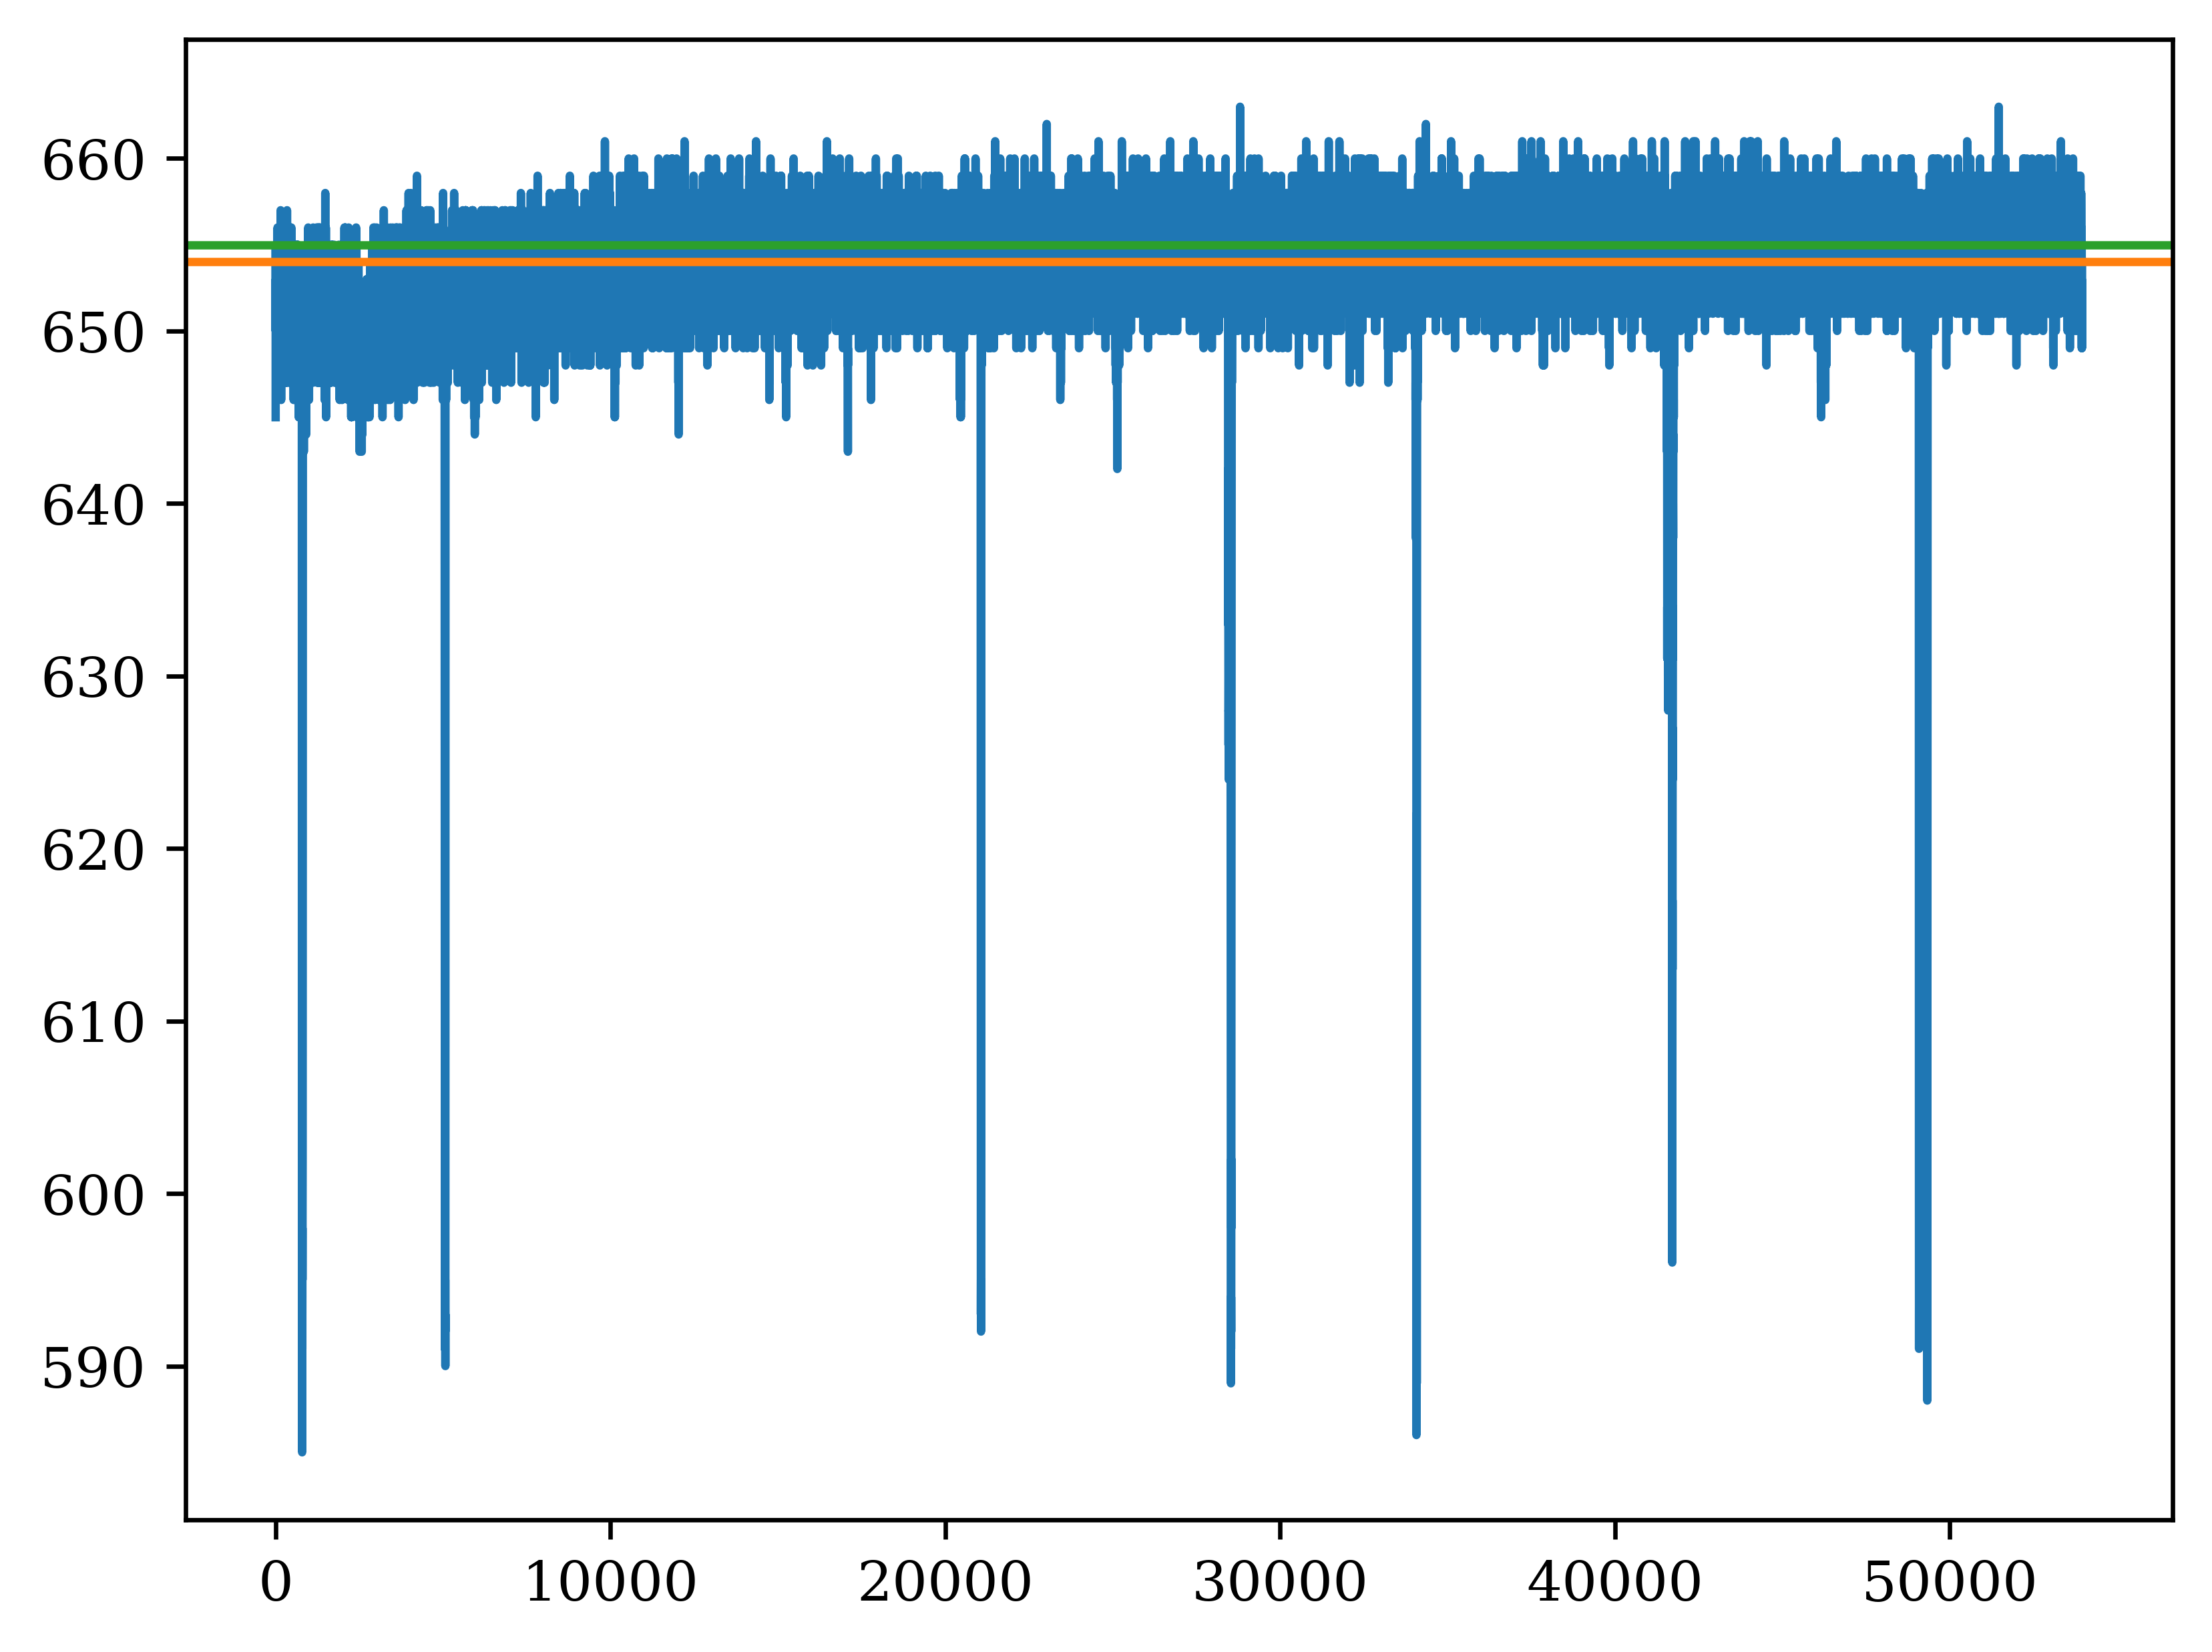

In [124]:
plt.plot(px)
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

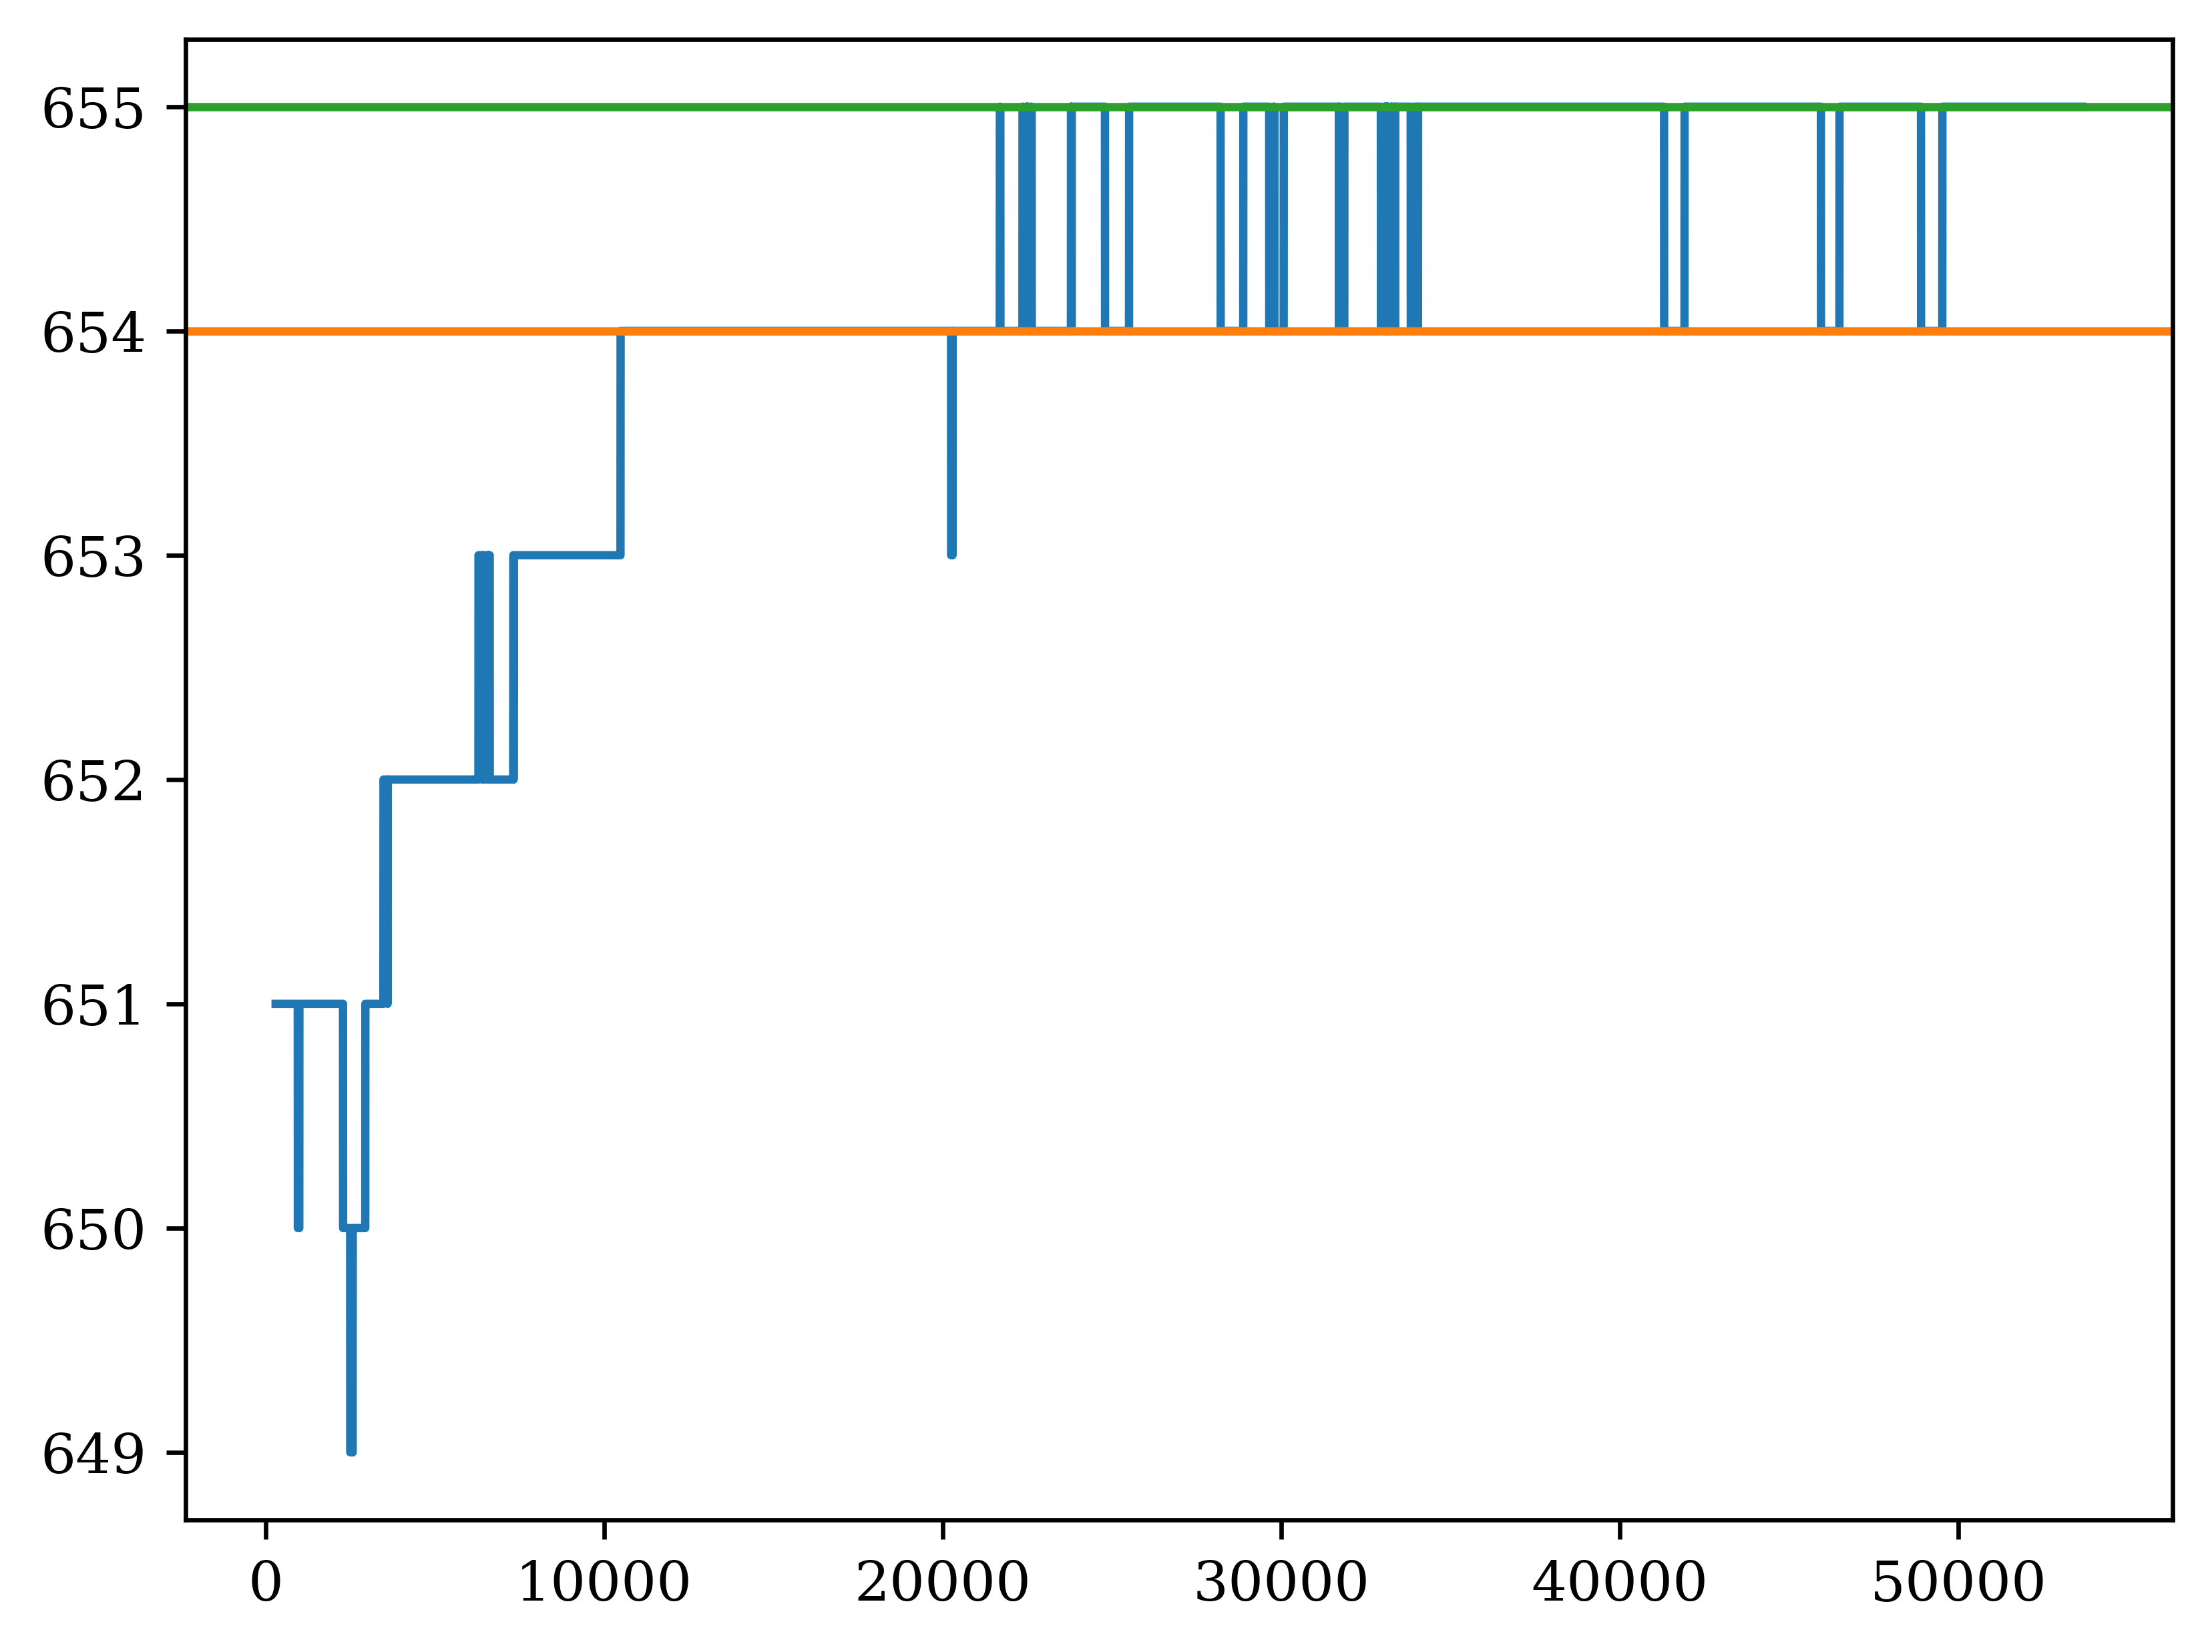

In [125]:
plt.plot(px.rolling(601, center=True).median())
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

In [106]:
px = data[:, 200, 300]
px = pd.Series(px)

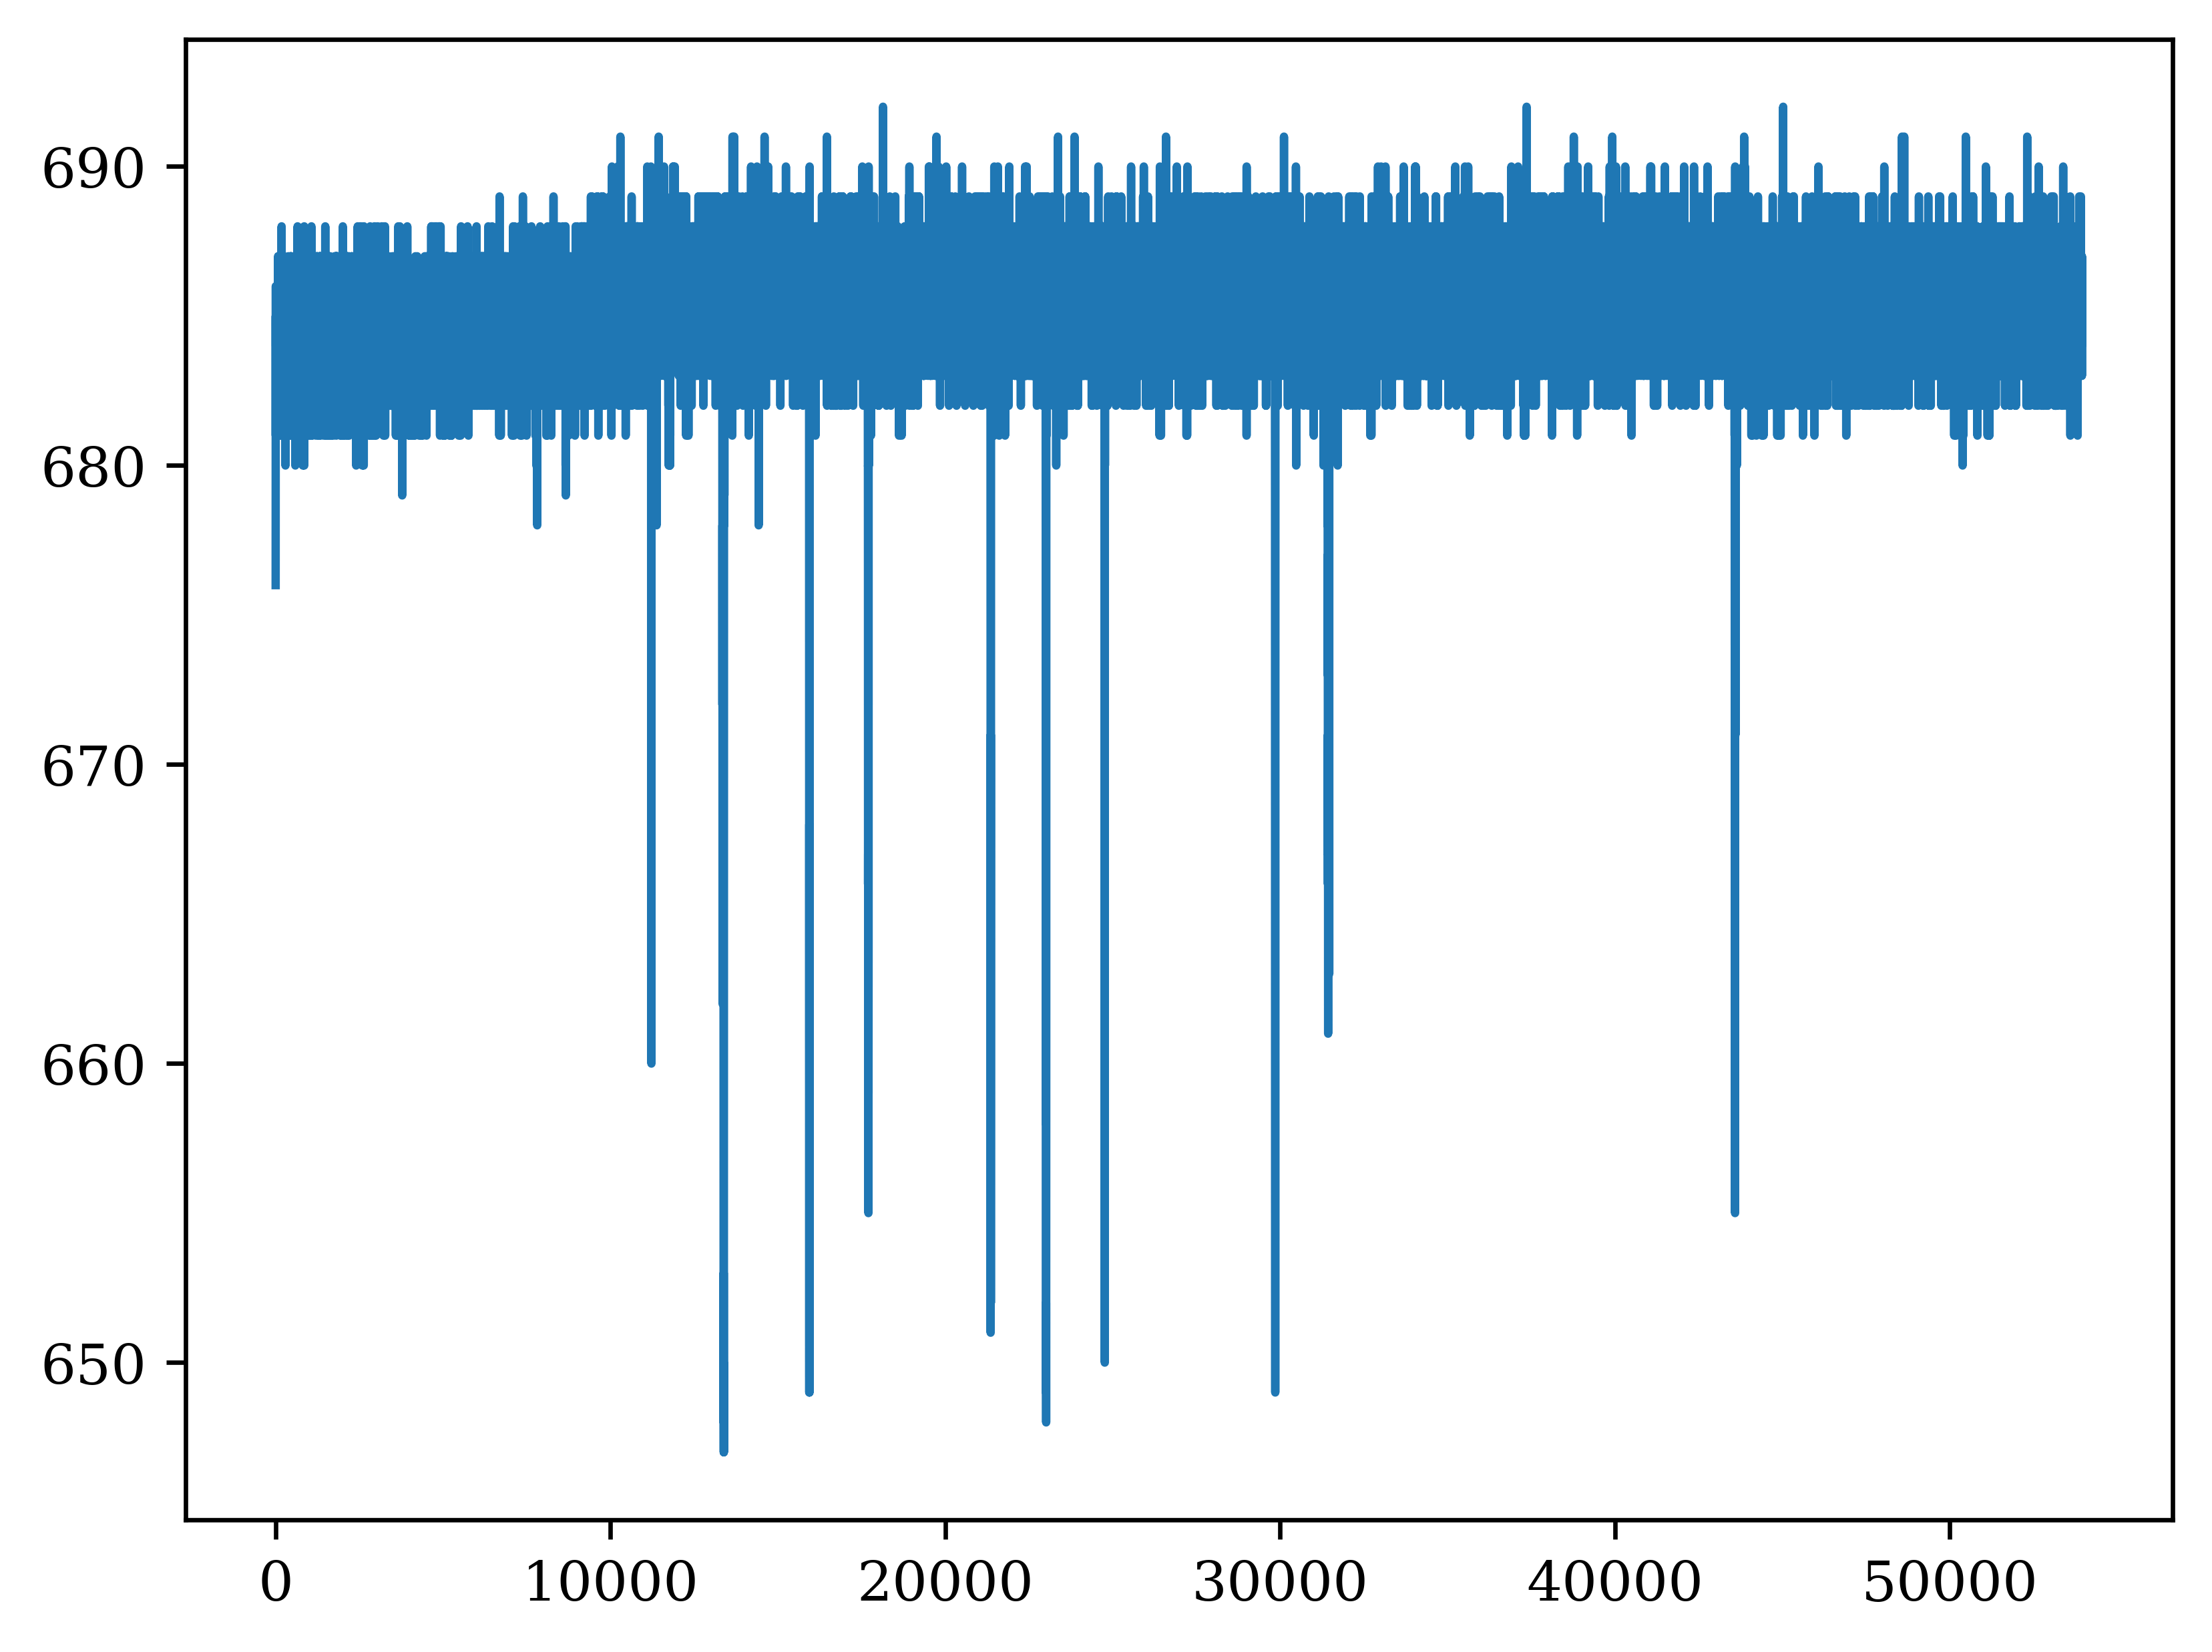

In [107]:
plt.plot(px)

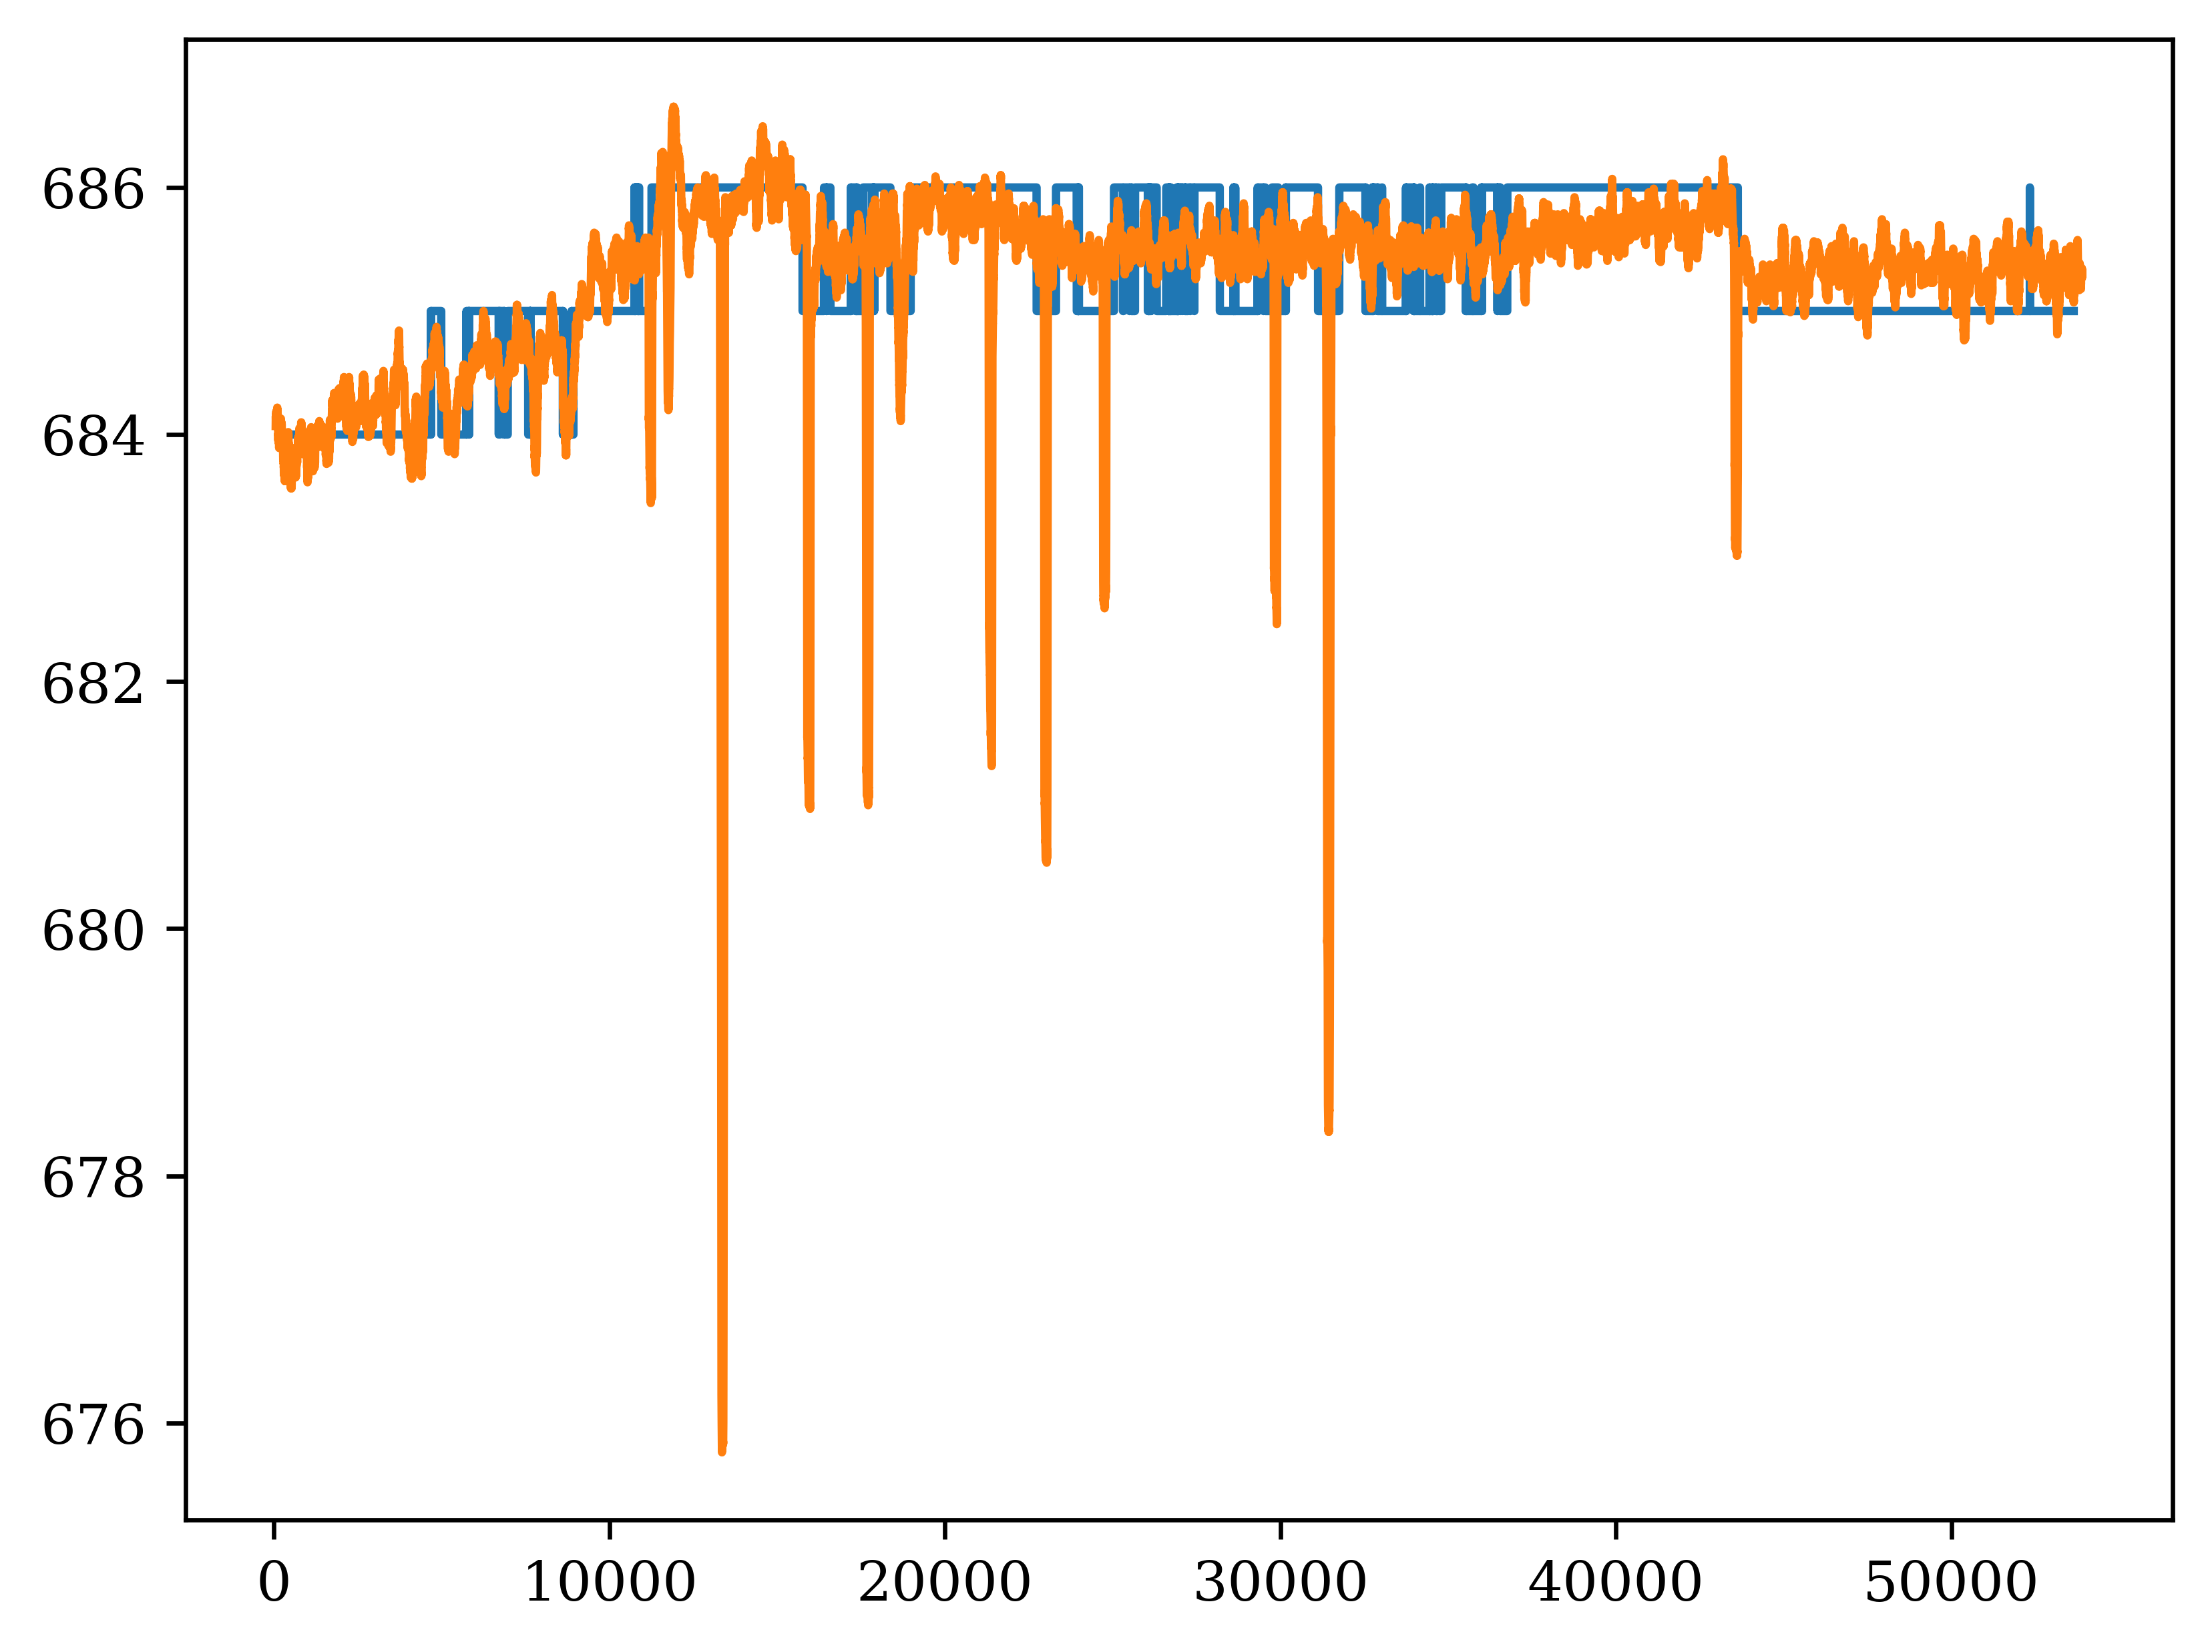

In [111]:
plt.plot(px.rolling(601, center=True).median())
plt.plot(px.rolling(101, center=True).mean())

In [126]:
file_ex = '/n/groups/datta/min/longtogeny_072023/Females/session_20231215203812/depth.dat'

In [127]:
data = np.memmap(file_ex, dtype=np.uint16)
data = data.reshape((-1, 424, 512))

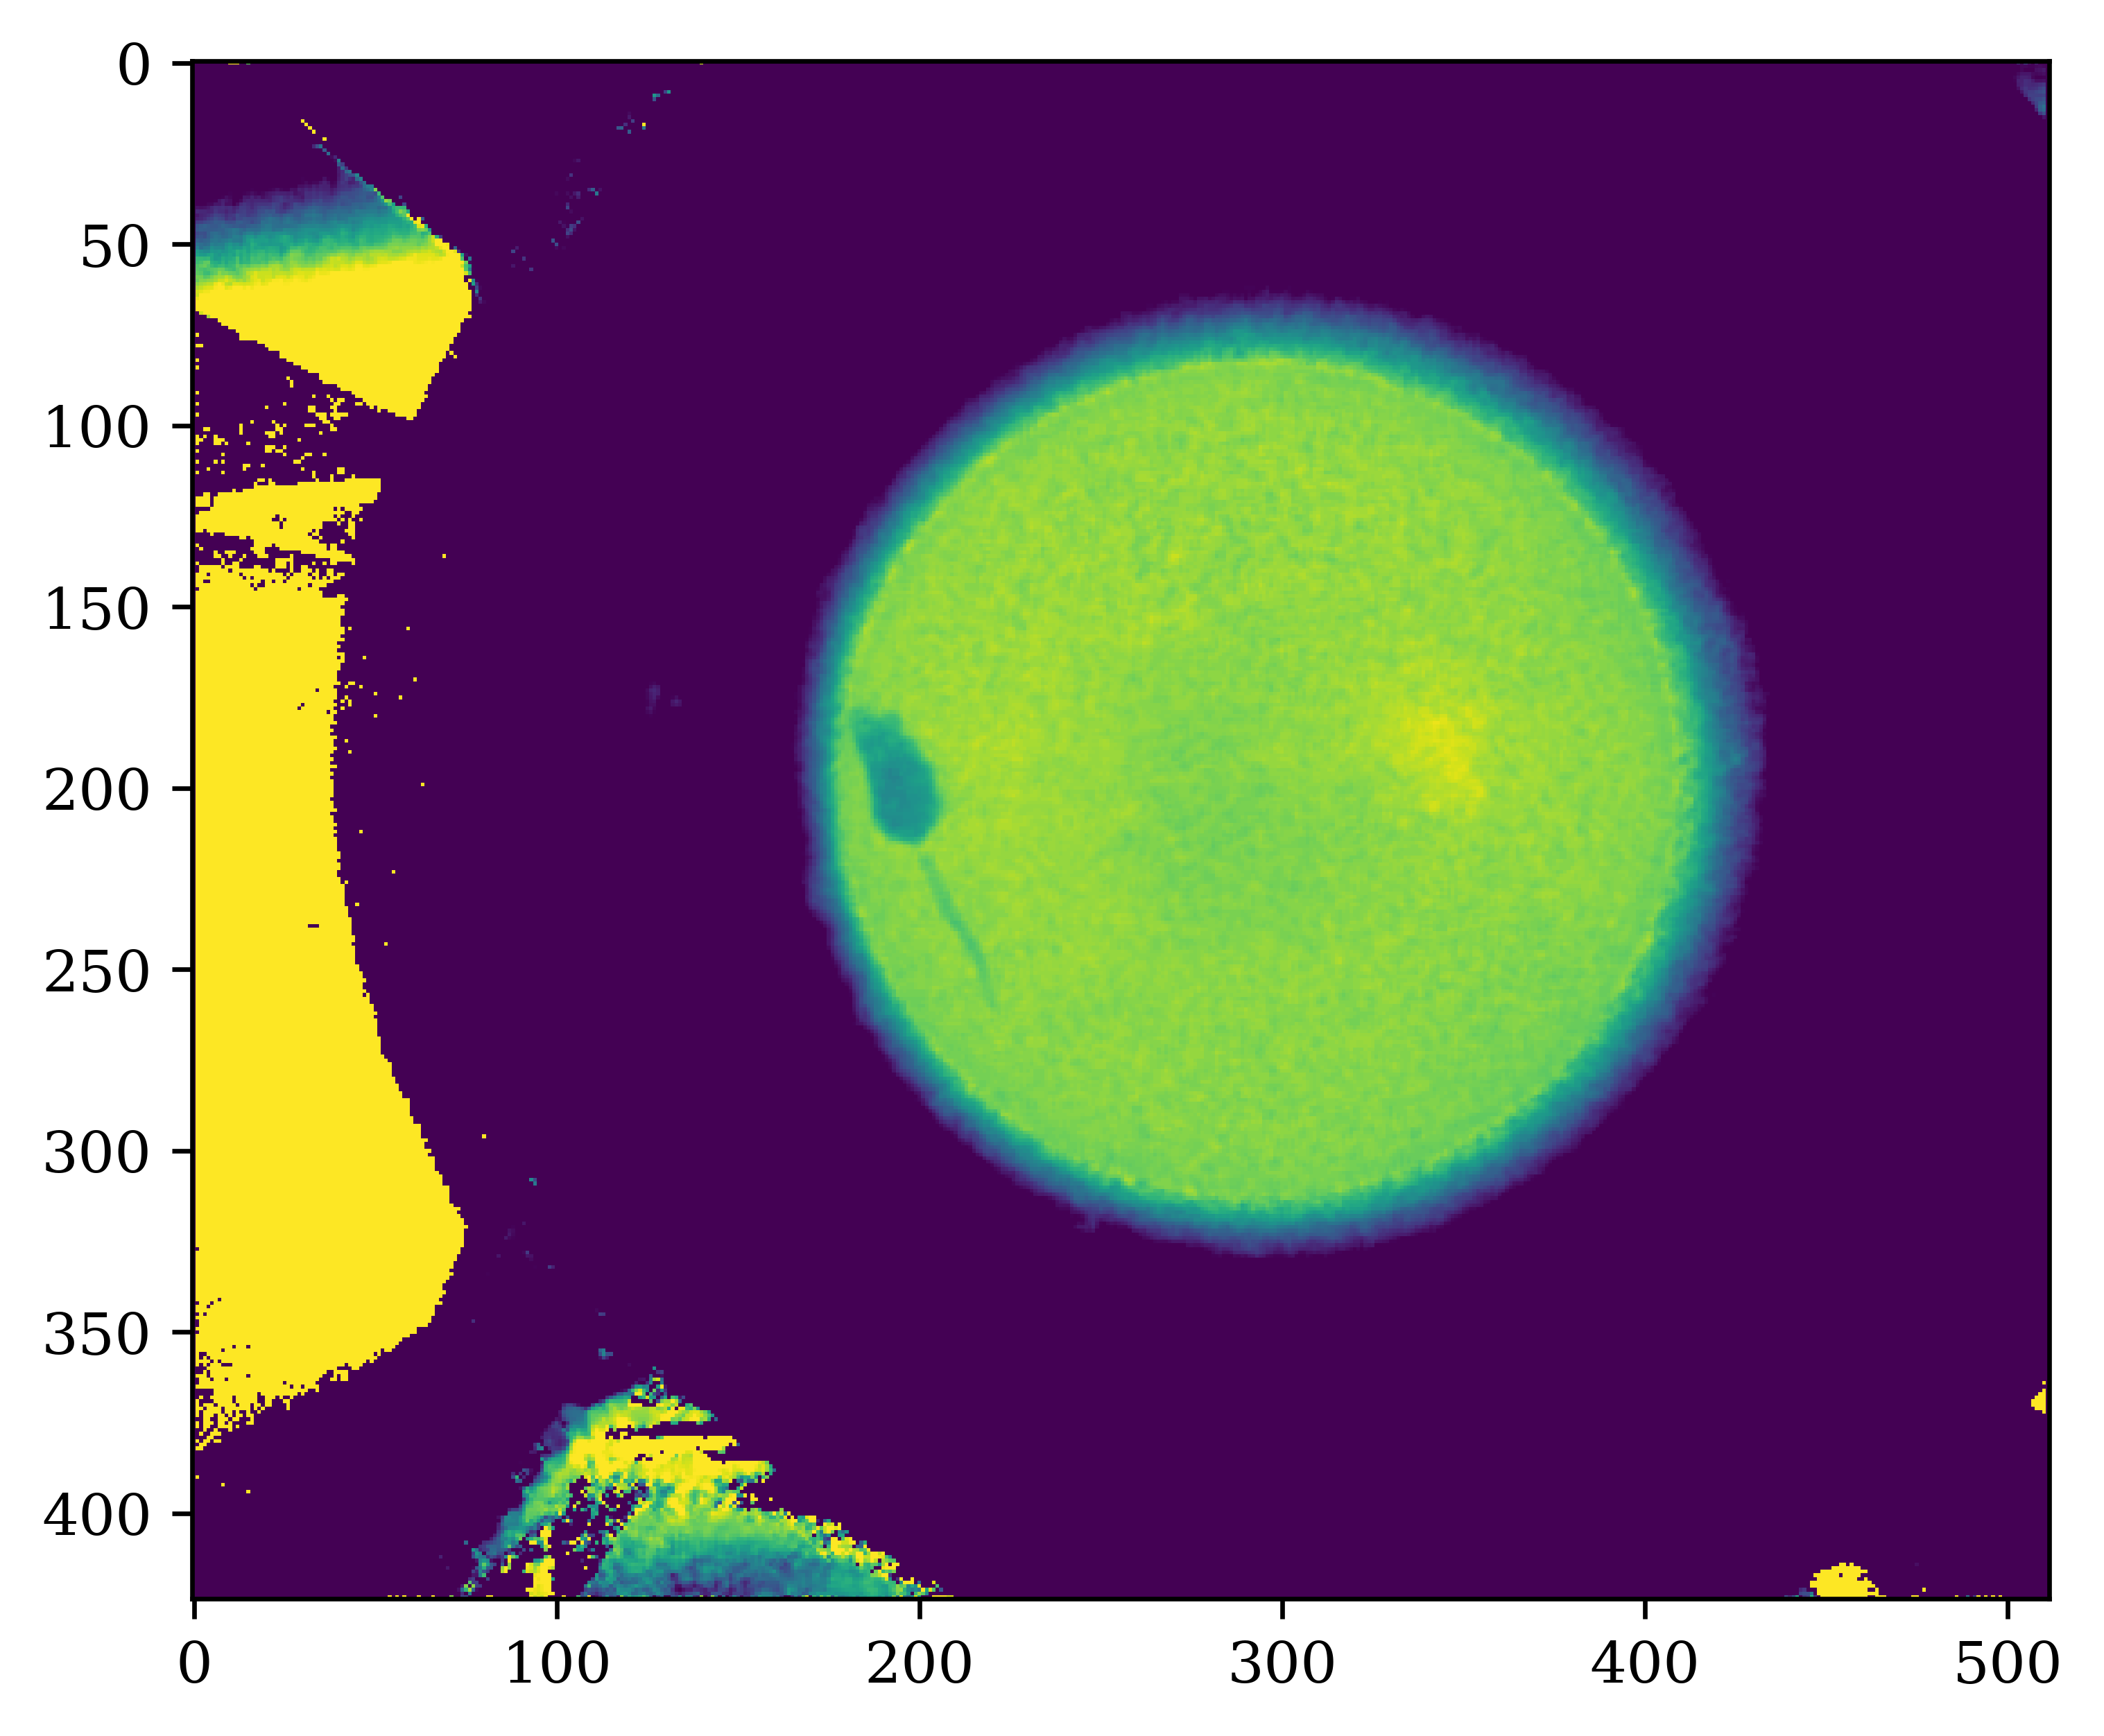

In [128]:
plt.imshow(data[1], vmin=600, vmax=700)

In [129]:
bg = np.median(data[::100], axis=0)

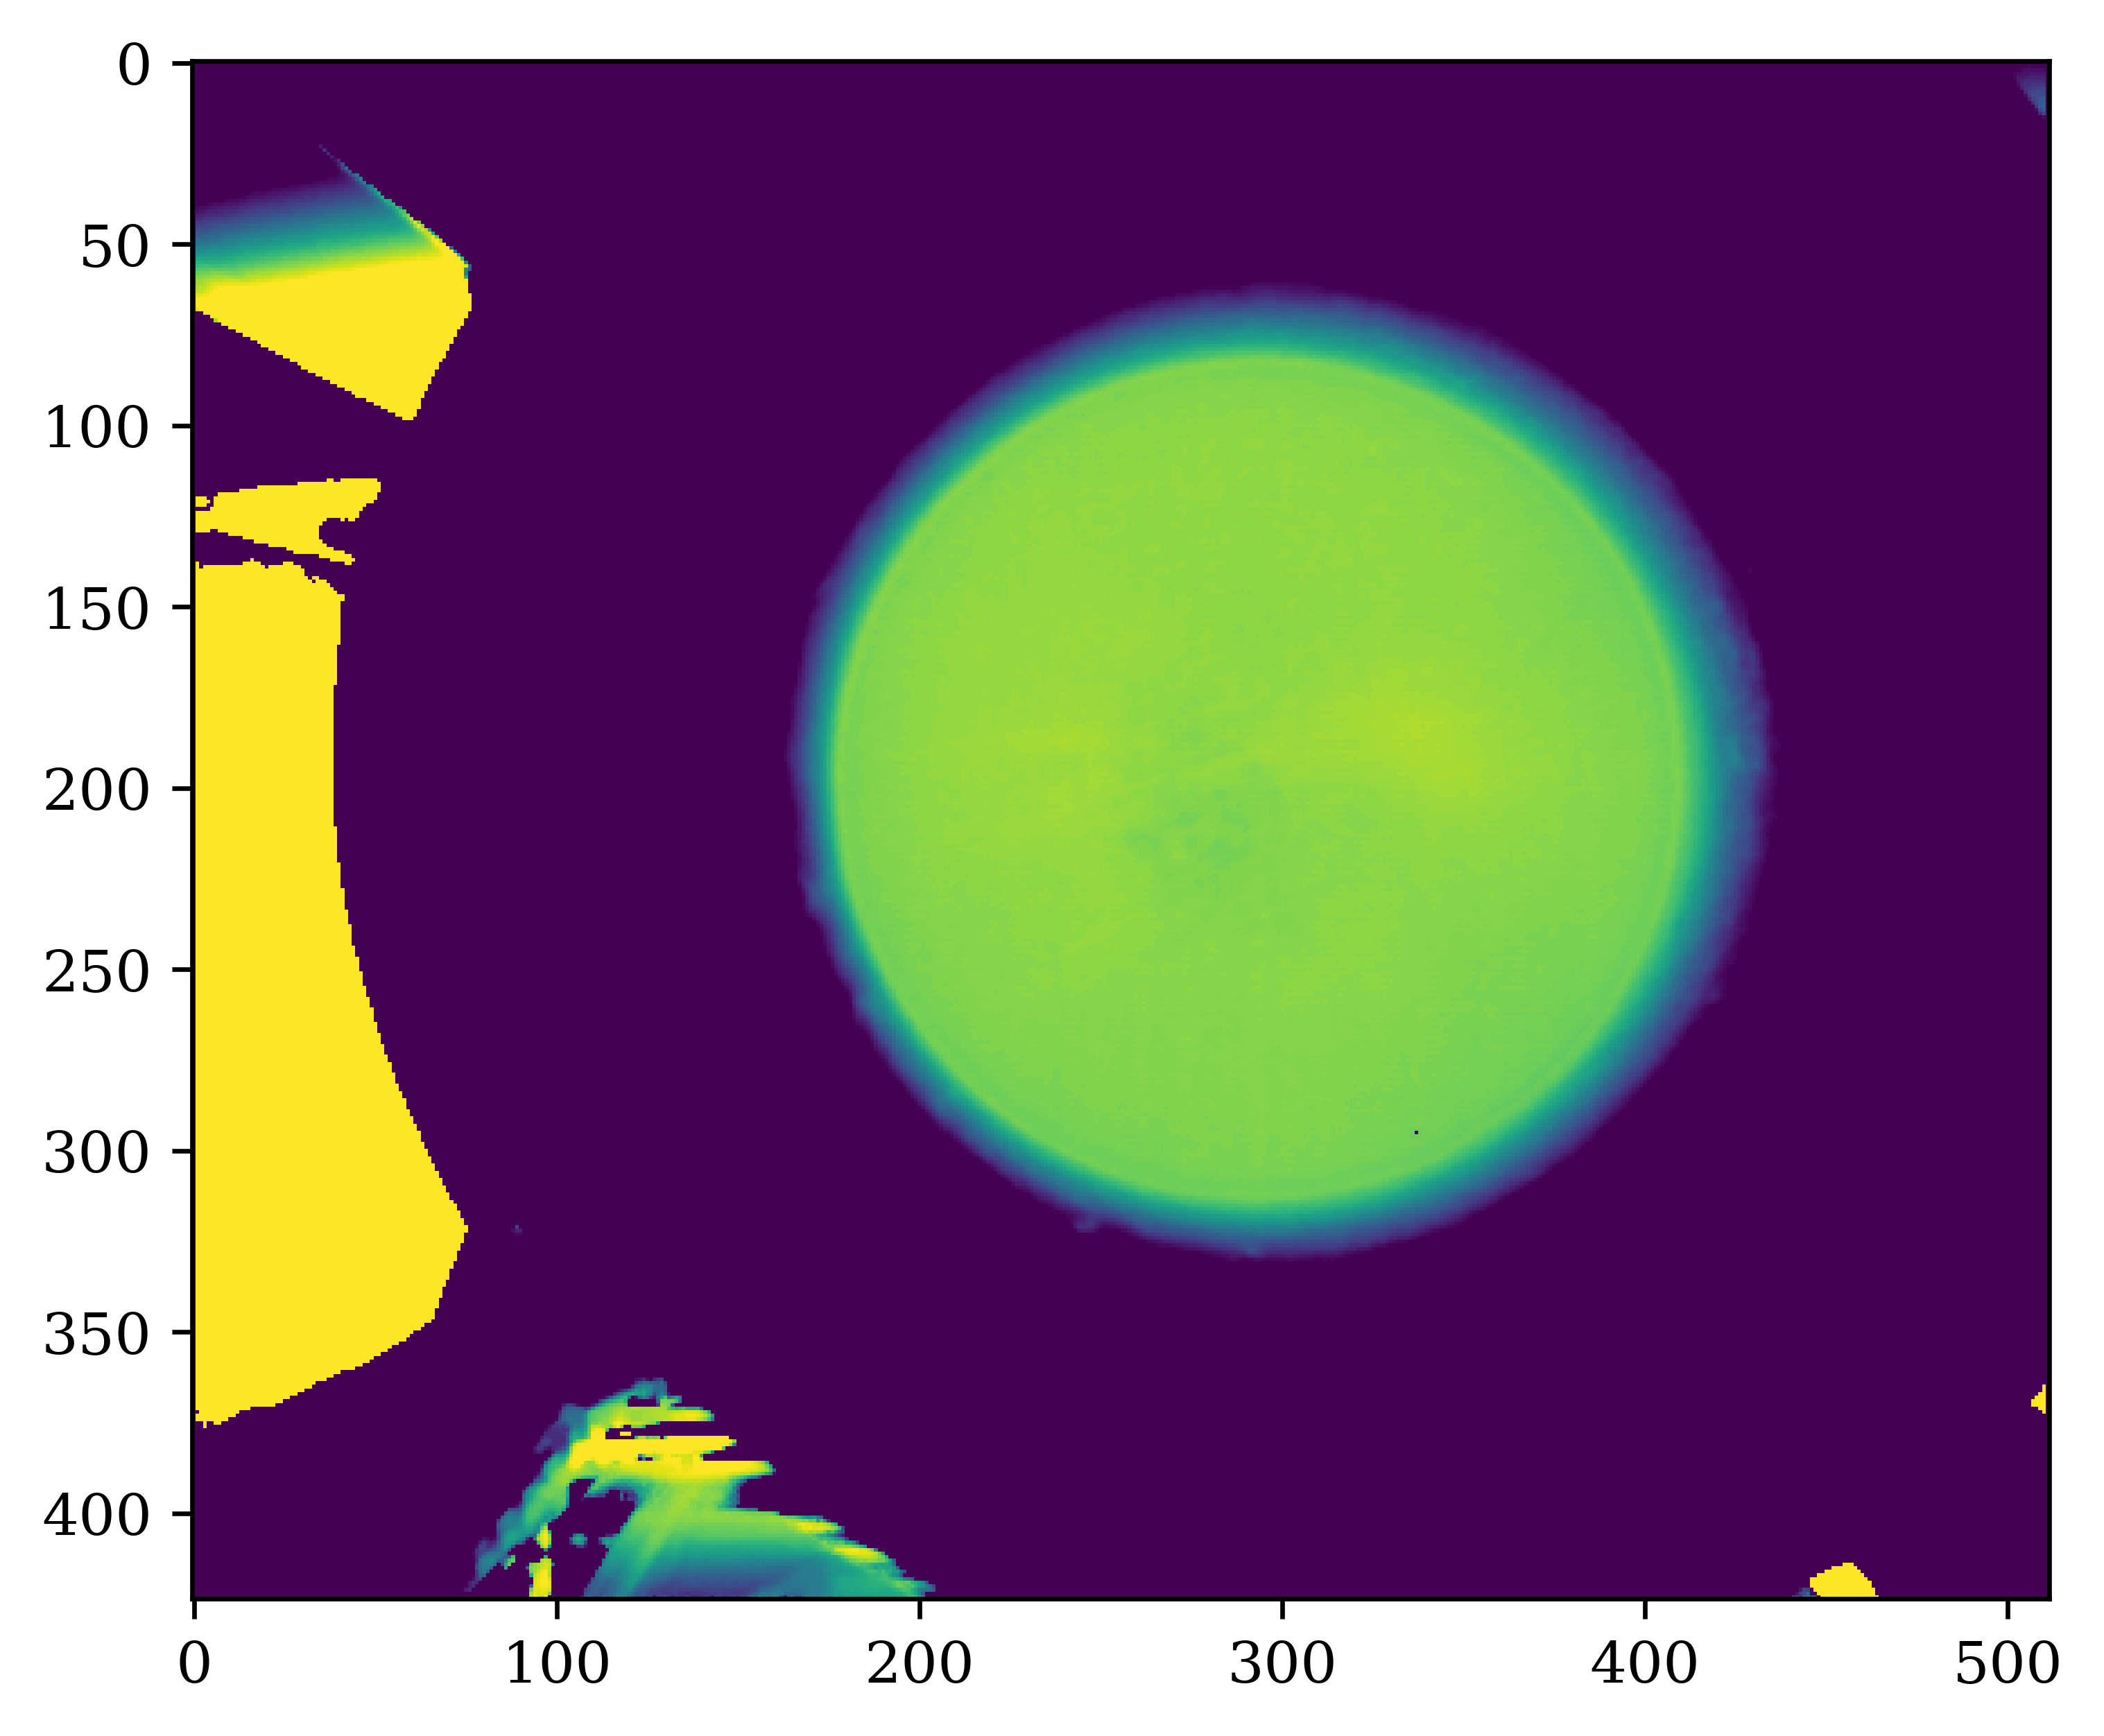

In [130]:
plt.imshow(bg, vmin=600, vmax=700)

In [132]:
smooth_bg = cv2.medianBlur(bg.astype('float32'), ksize=5)
smooth_bg = cv2.GaussianBlur(smooth_bg, ksize=(9, 9), sigmaX=2, sigmaY=2)

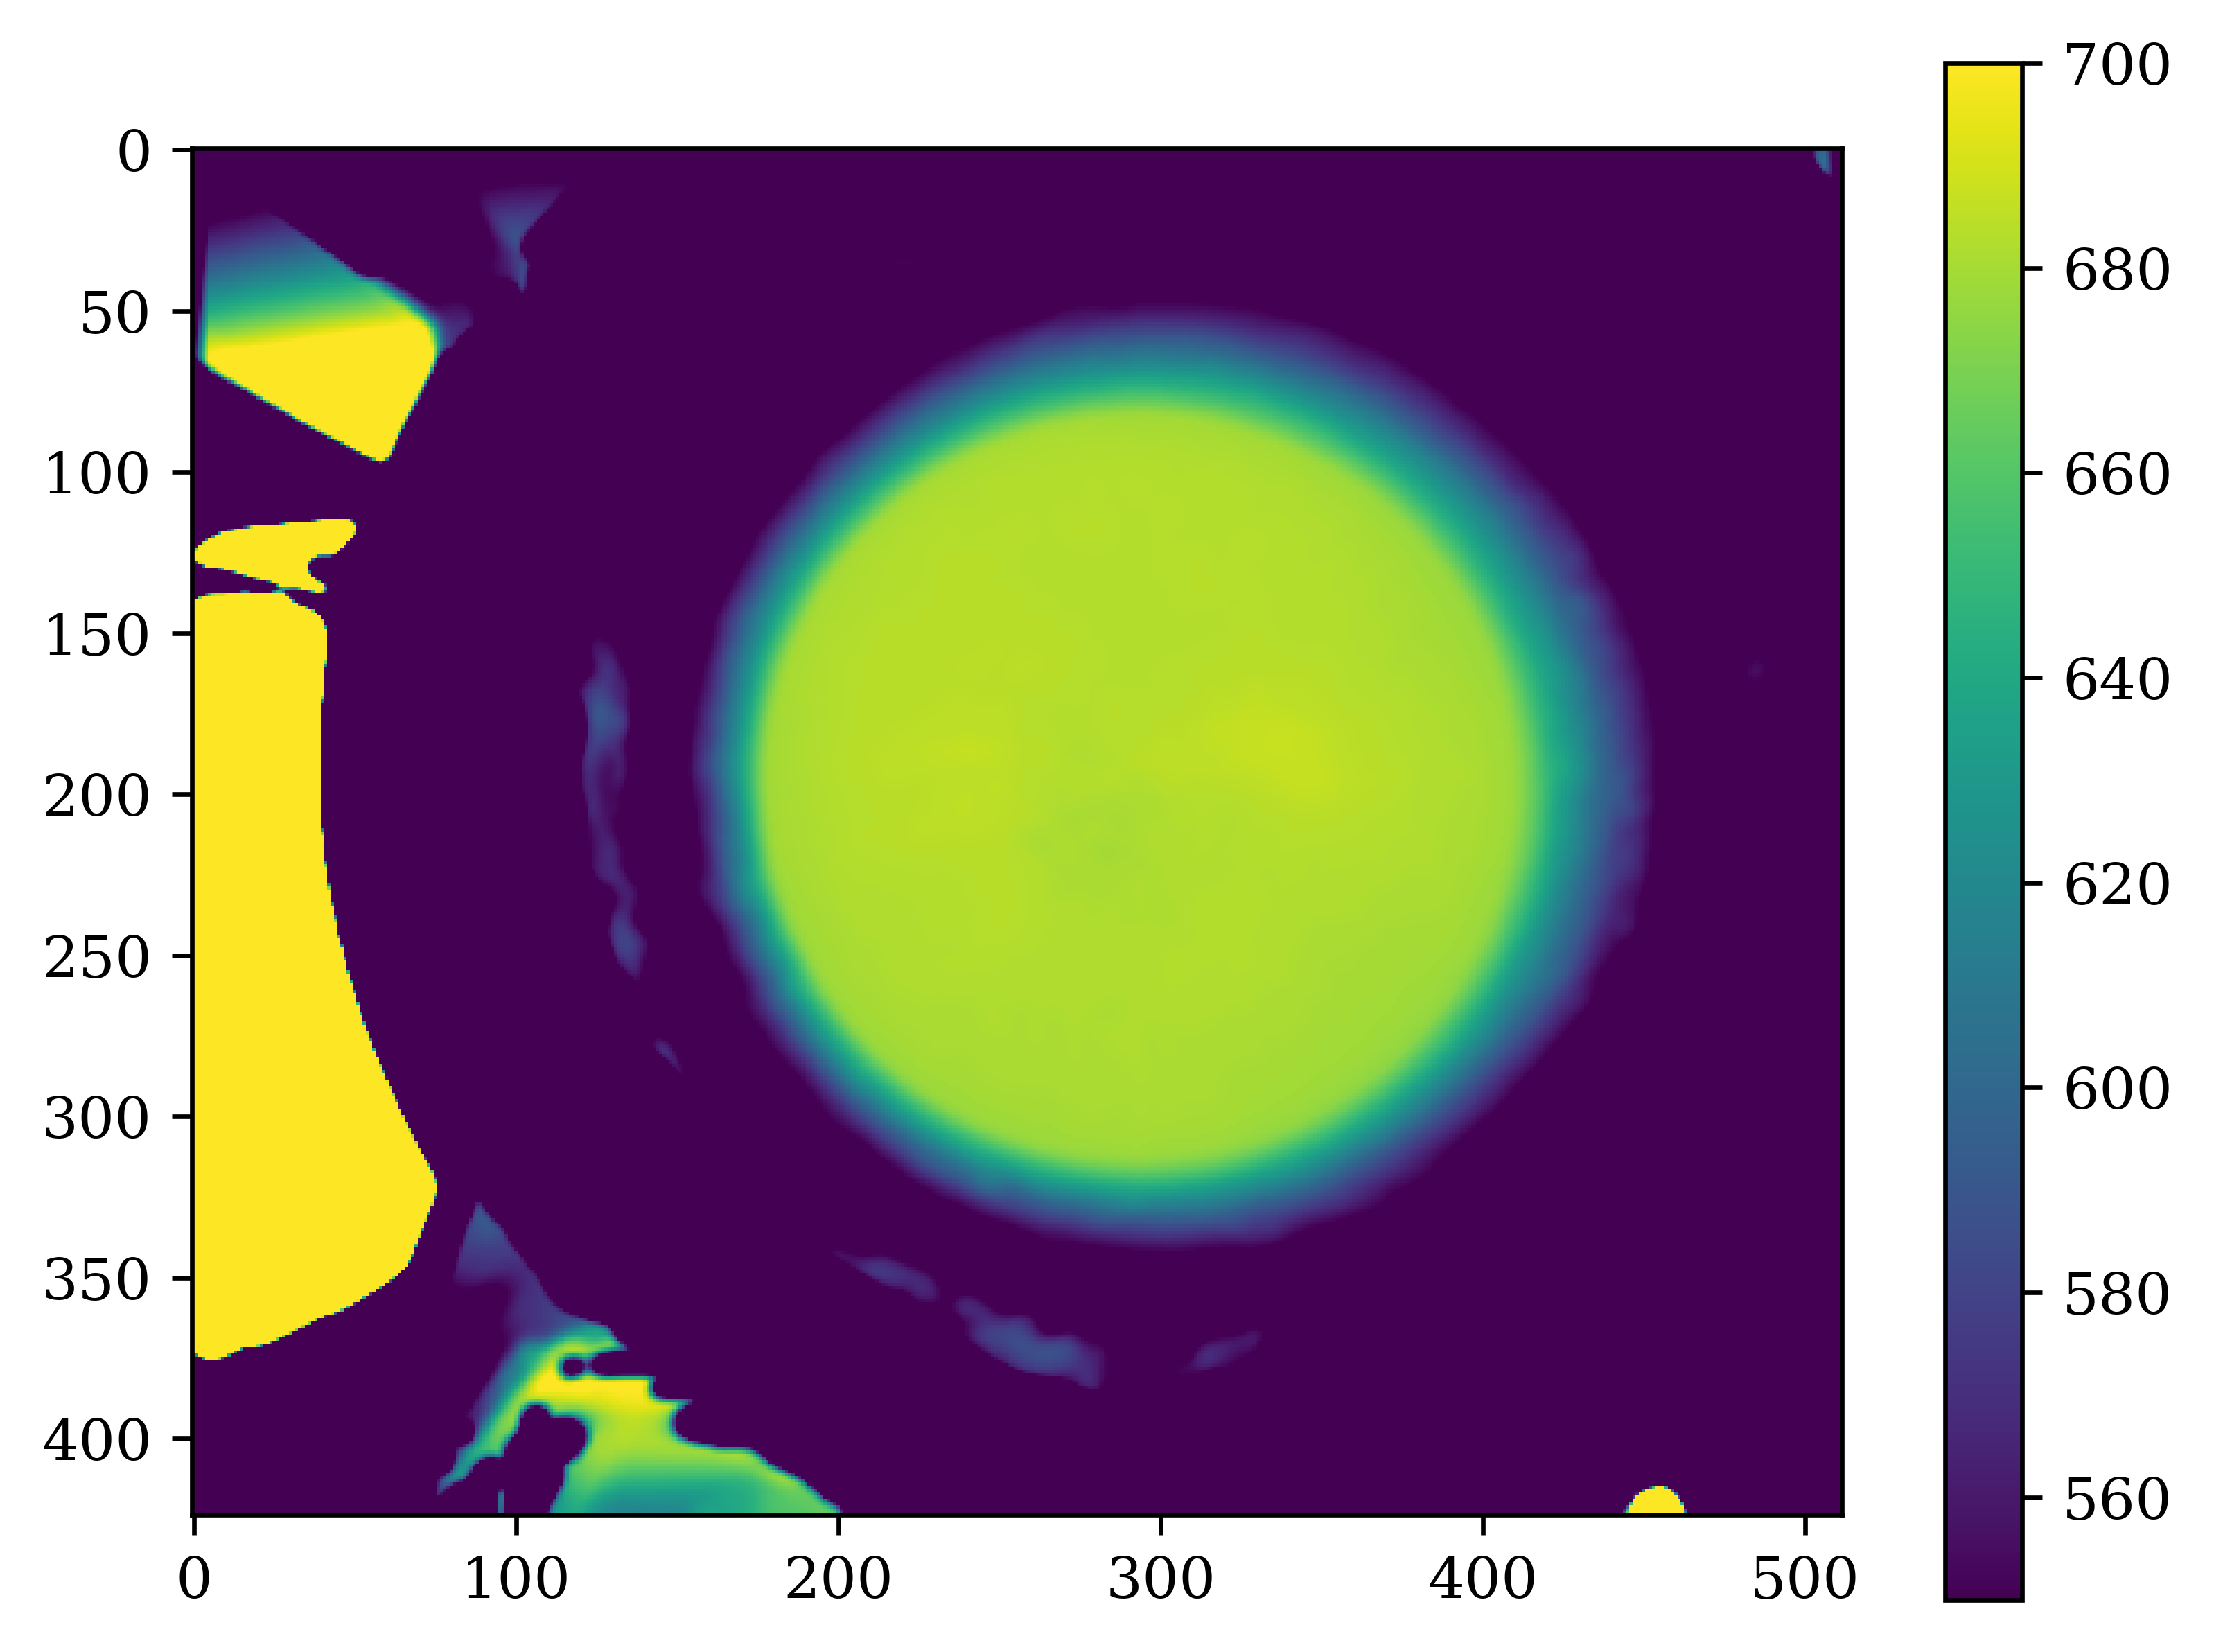

In [133]:
plt.imshow(smooth_bg, vmin=550, vmax=700)
plt.colorbar()

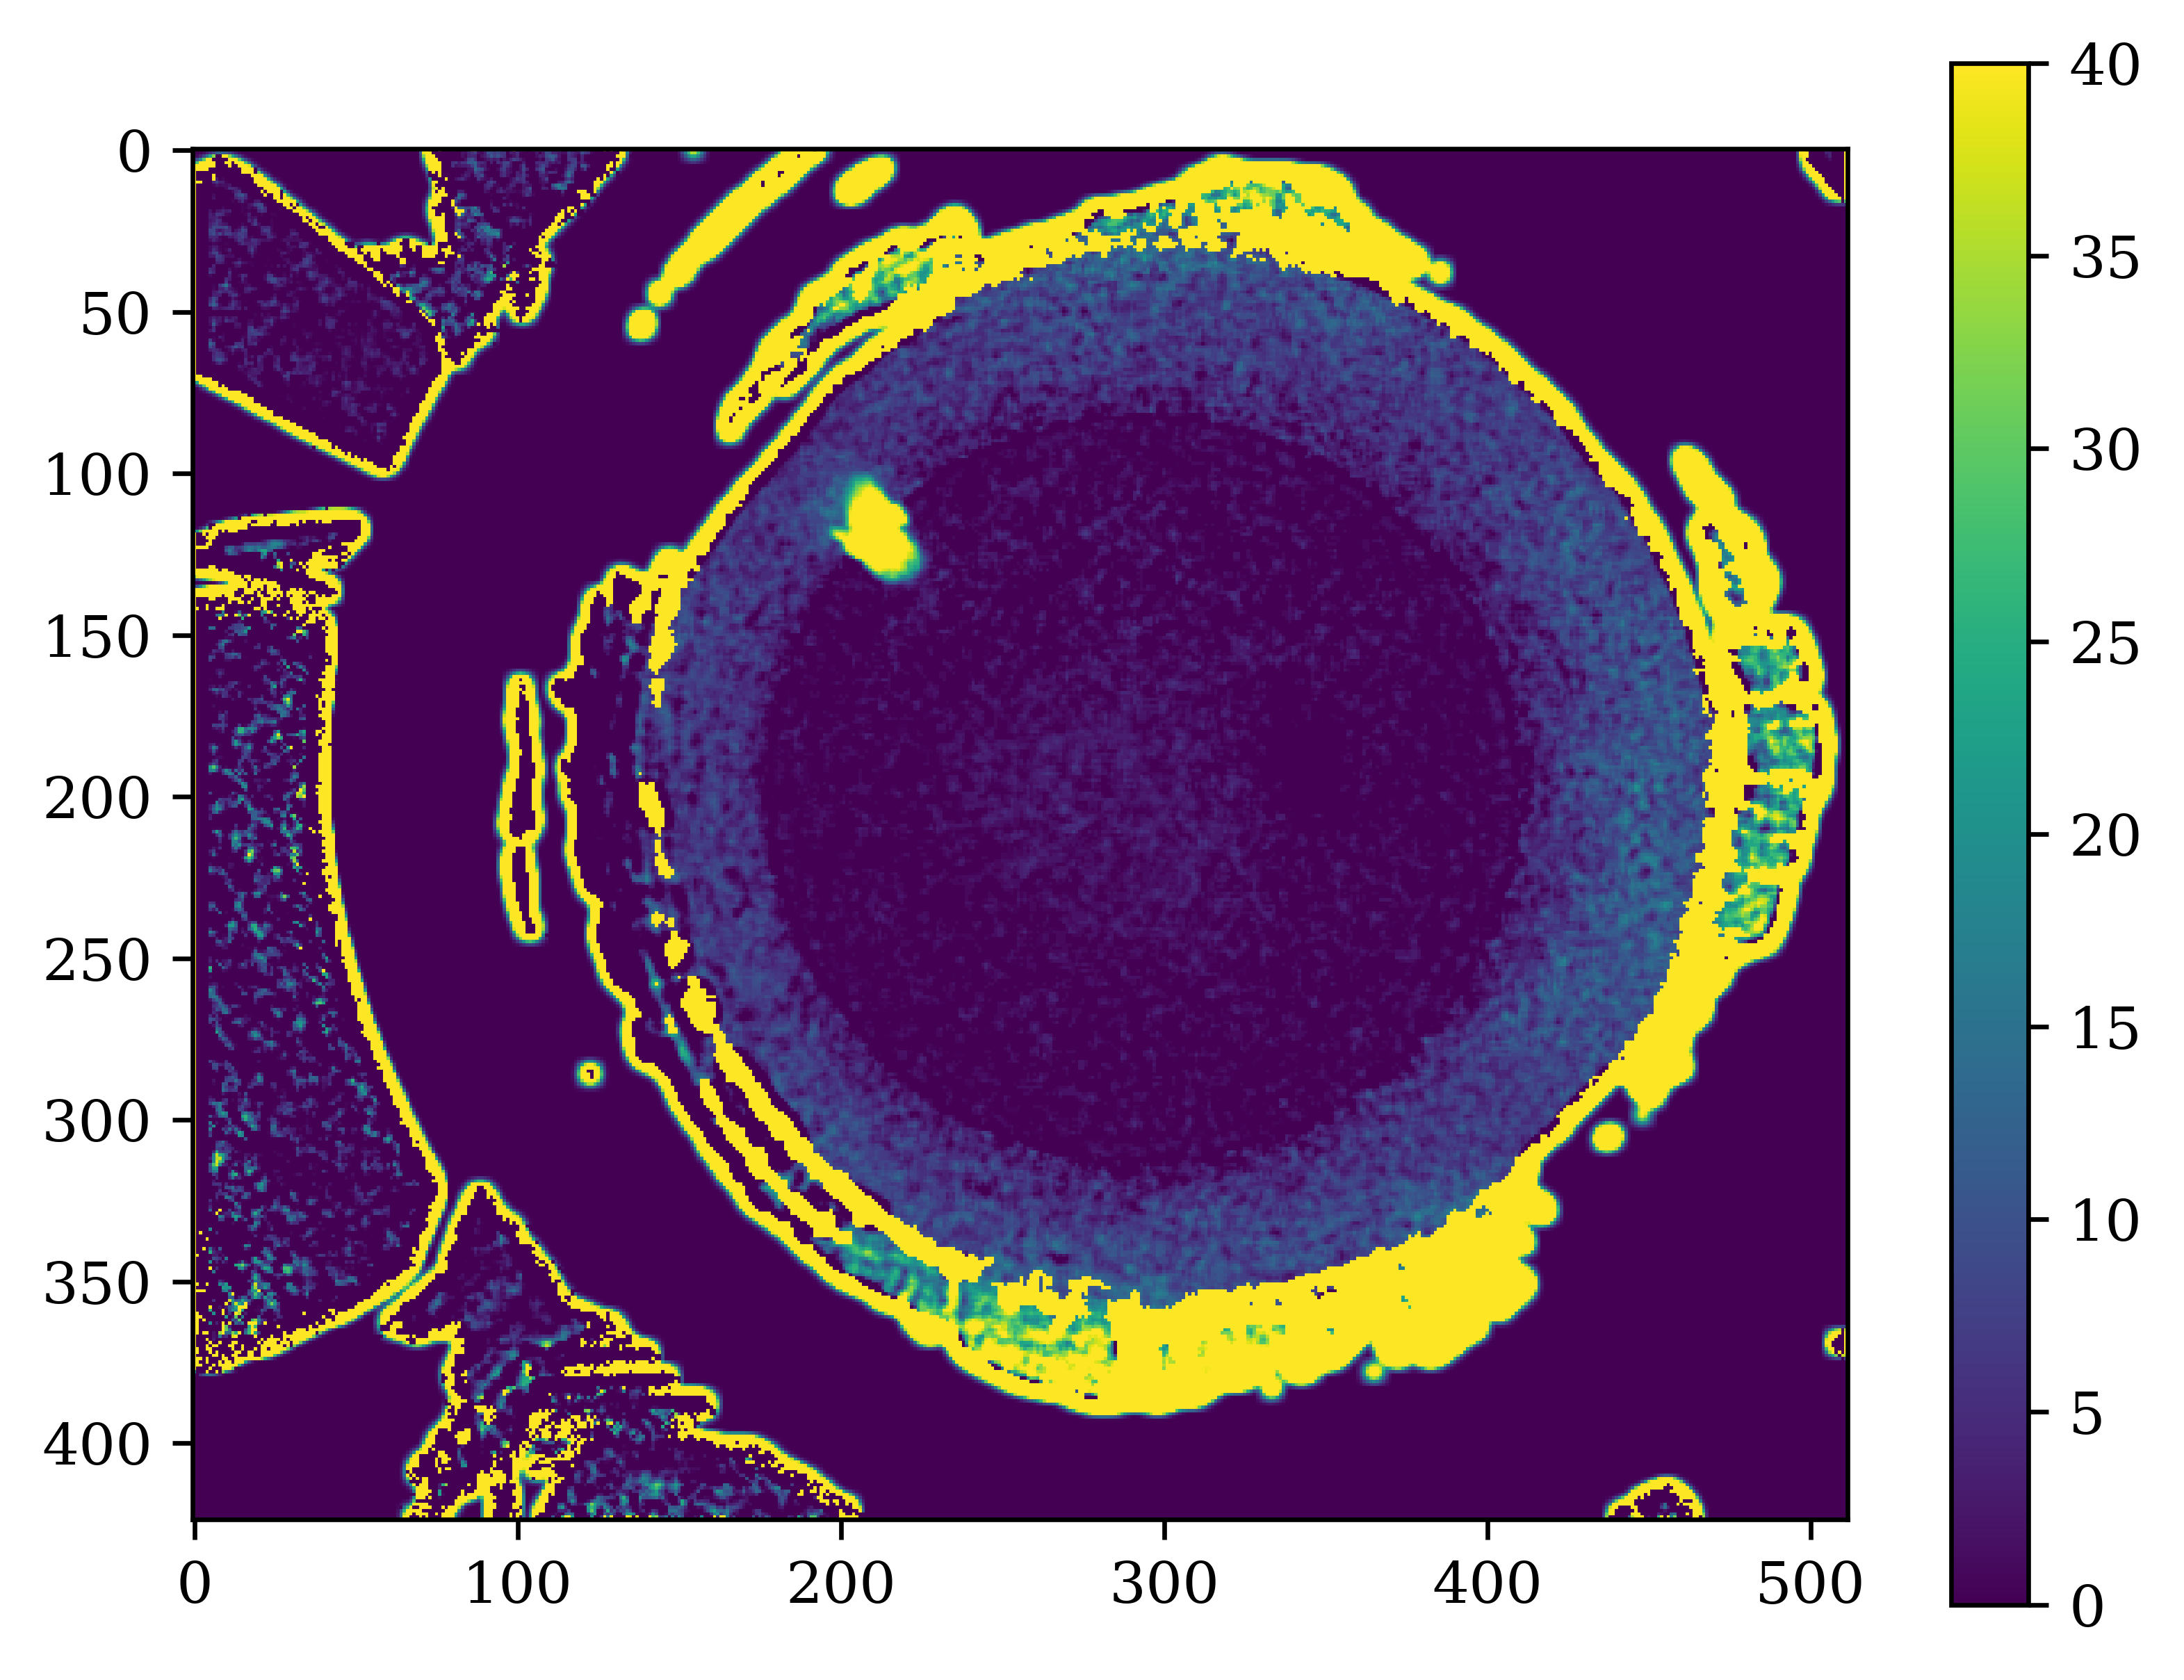

In [134]:
plt.imshow(smooth_bg.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
# plt.imshow(bg2.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

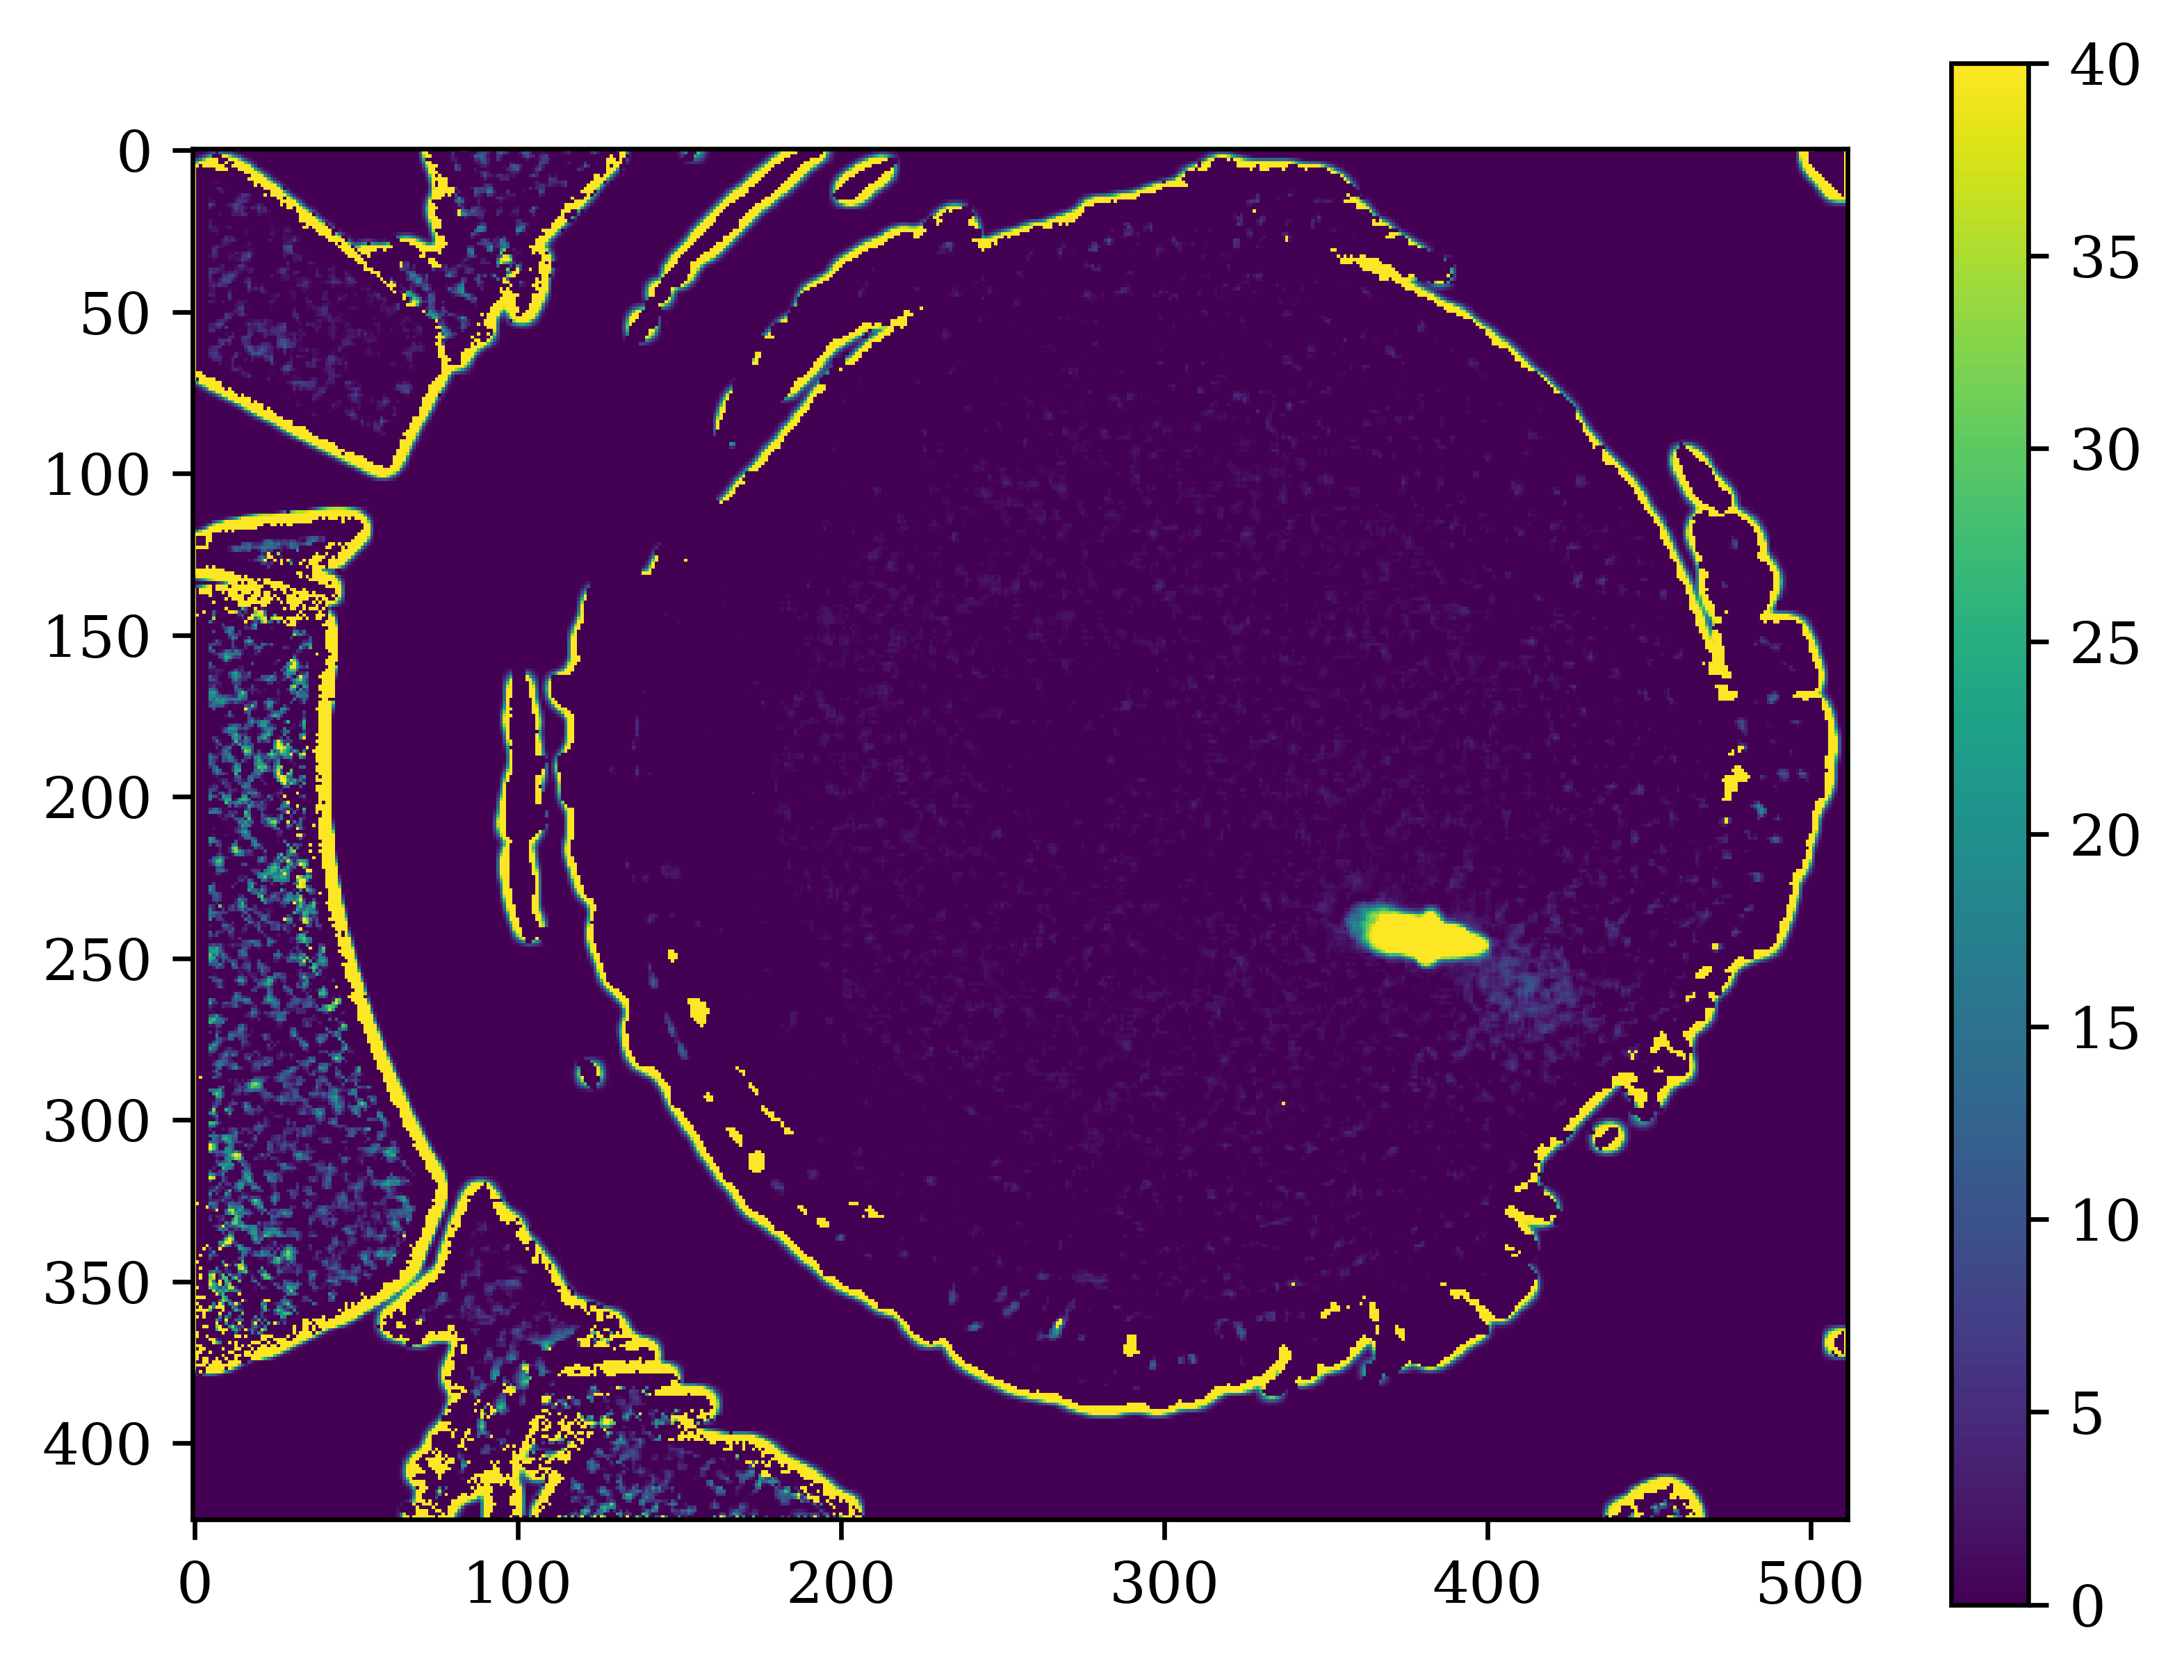

In [136]:
plt.imshow(smooth_bg.astype('float32') - data[-316].astype('float32'), vmin=0, vmax=40)
# plt.imshow(bg2.astype('float32') - data[-316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

In [137]:
px = data[:, 75, 300]
px = pd.Series(px)

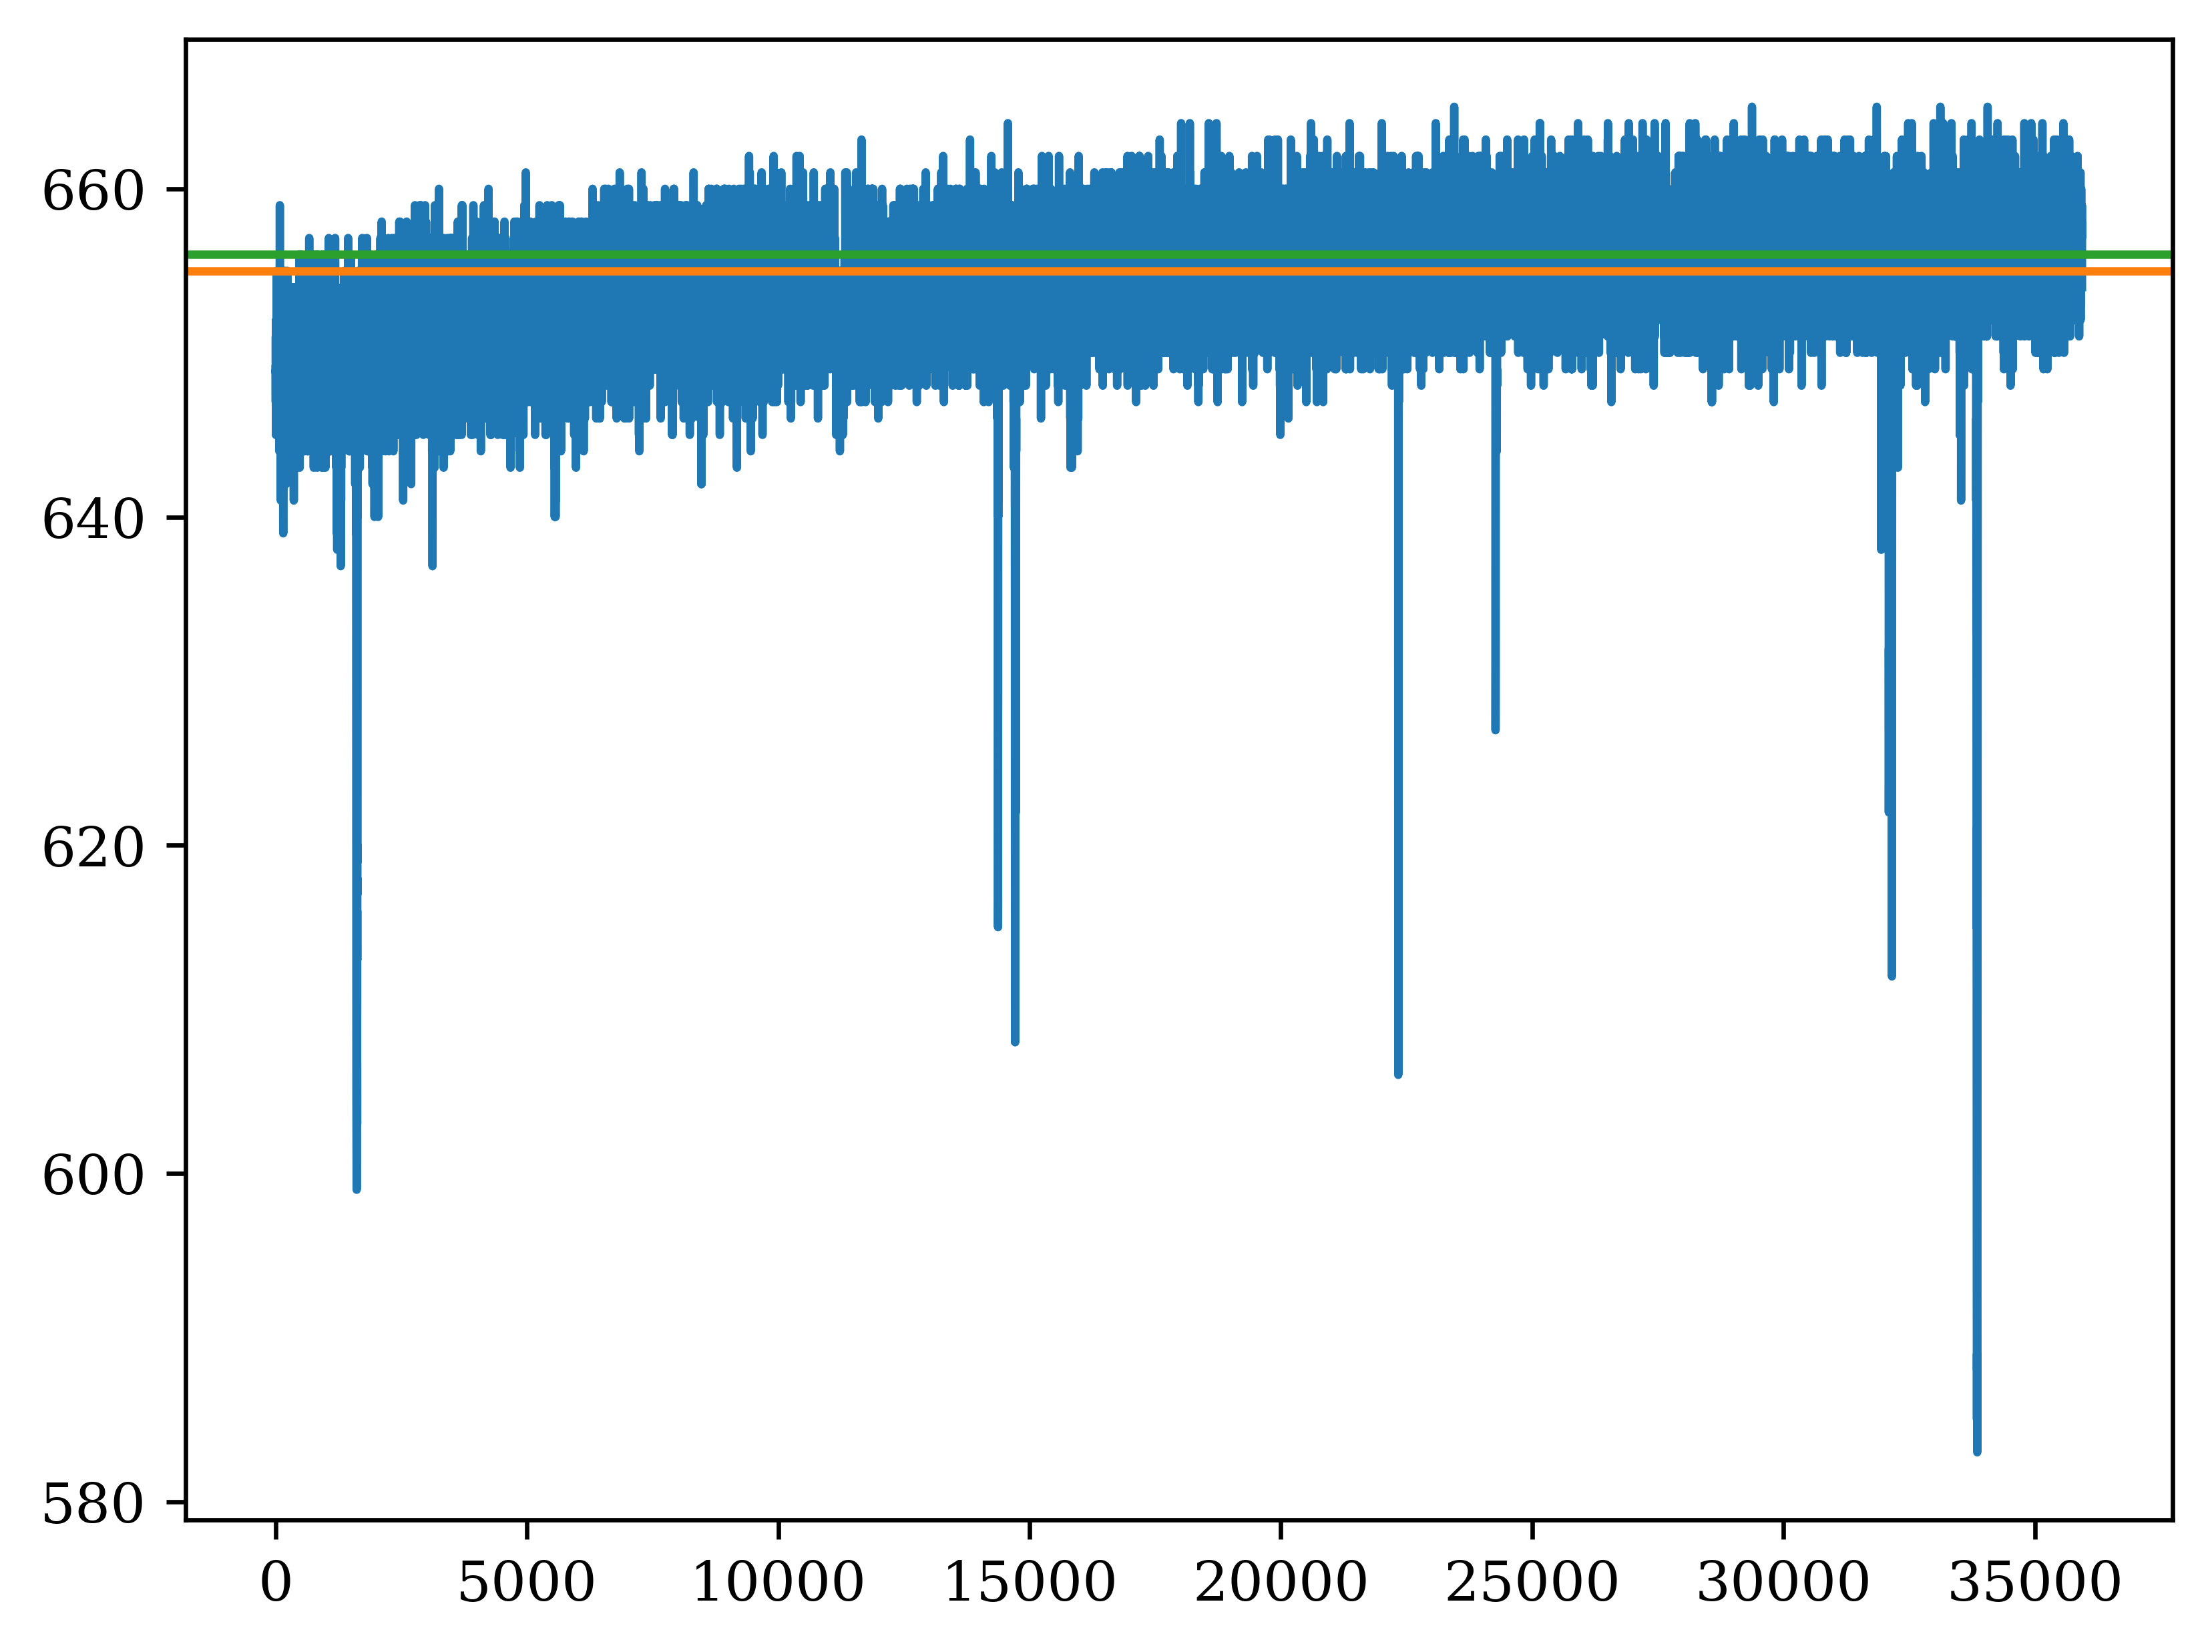

In [138]:
plt.plot(px)
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

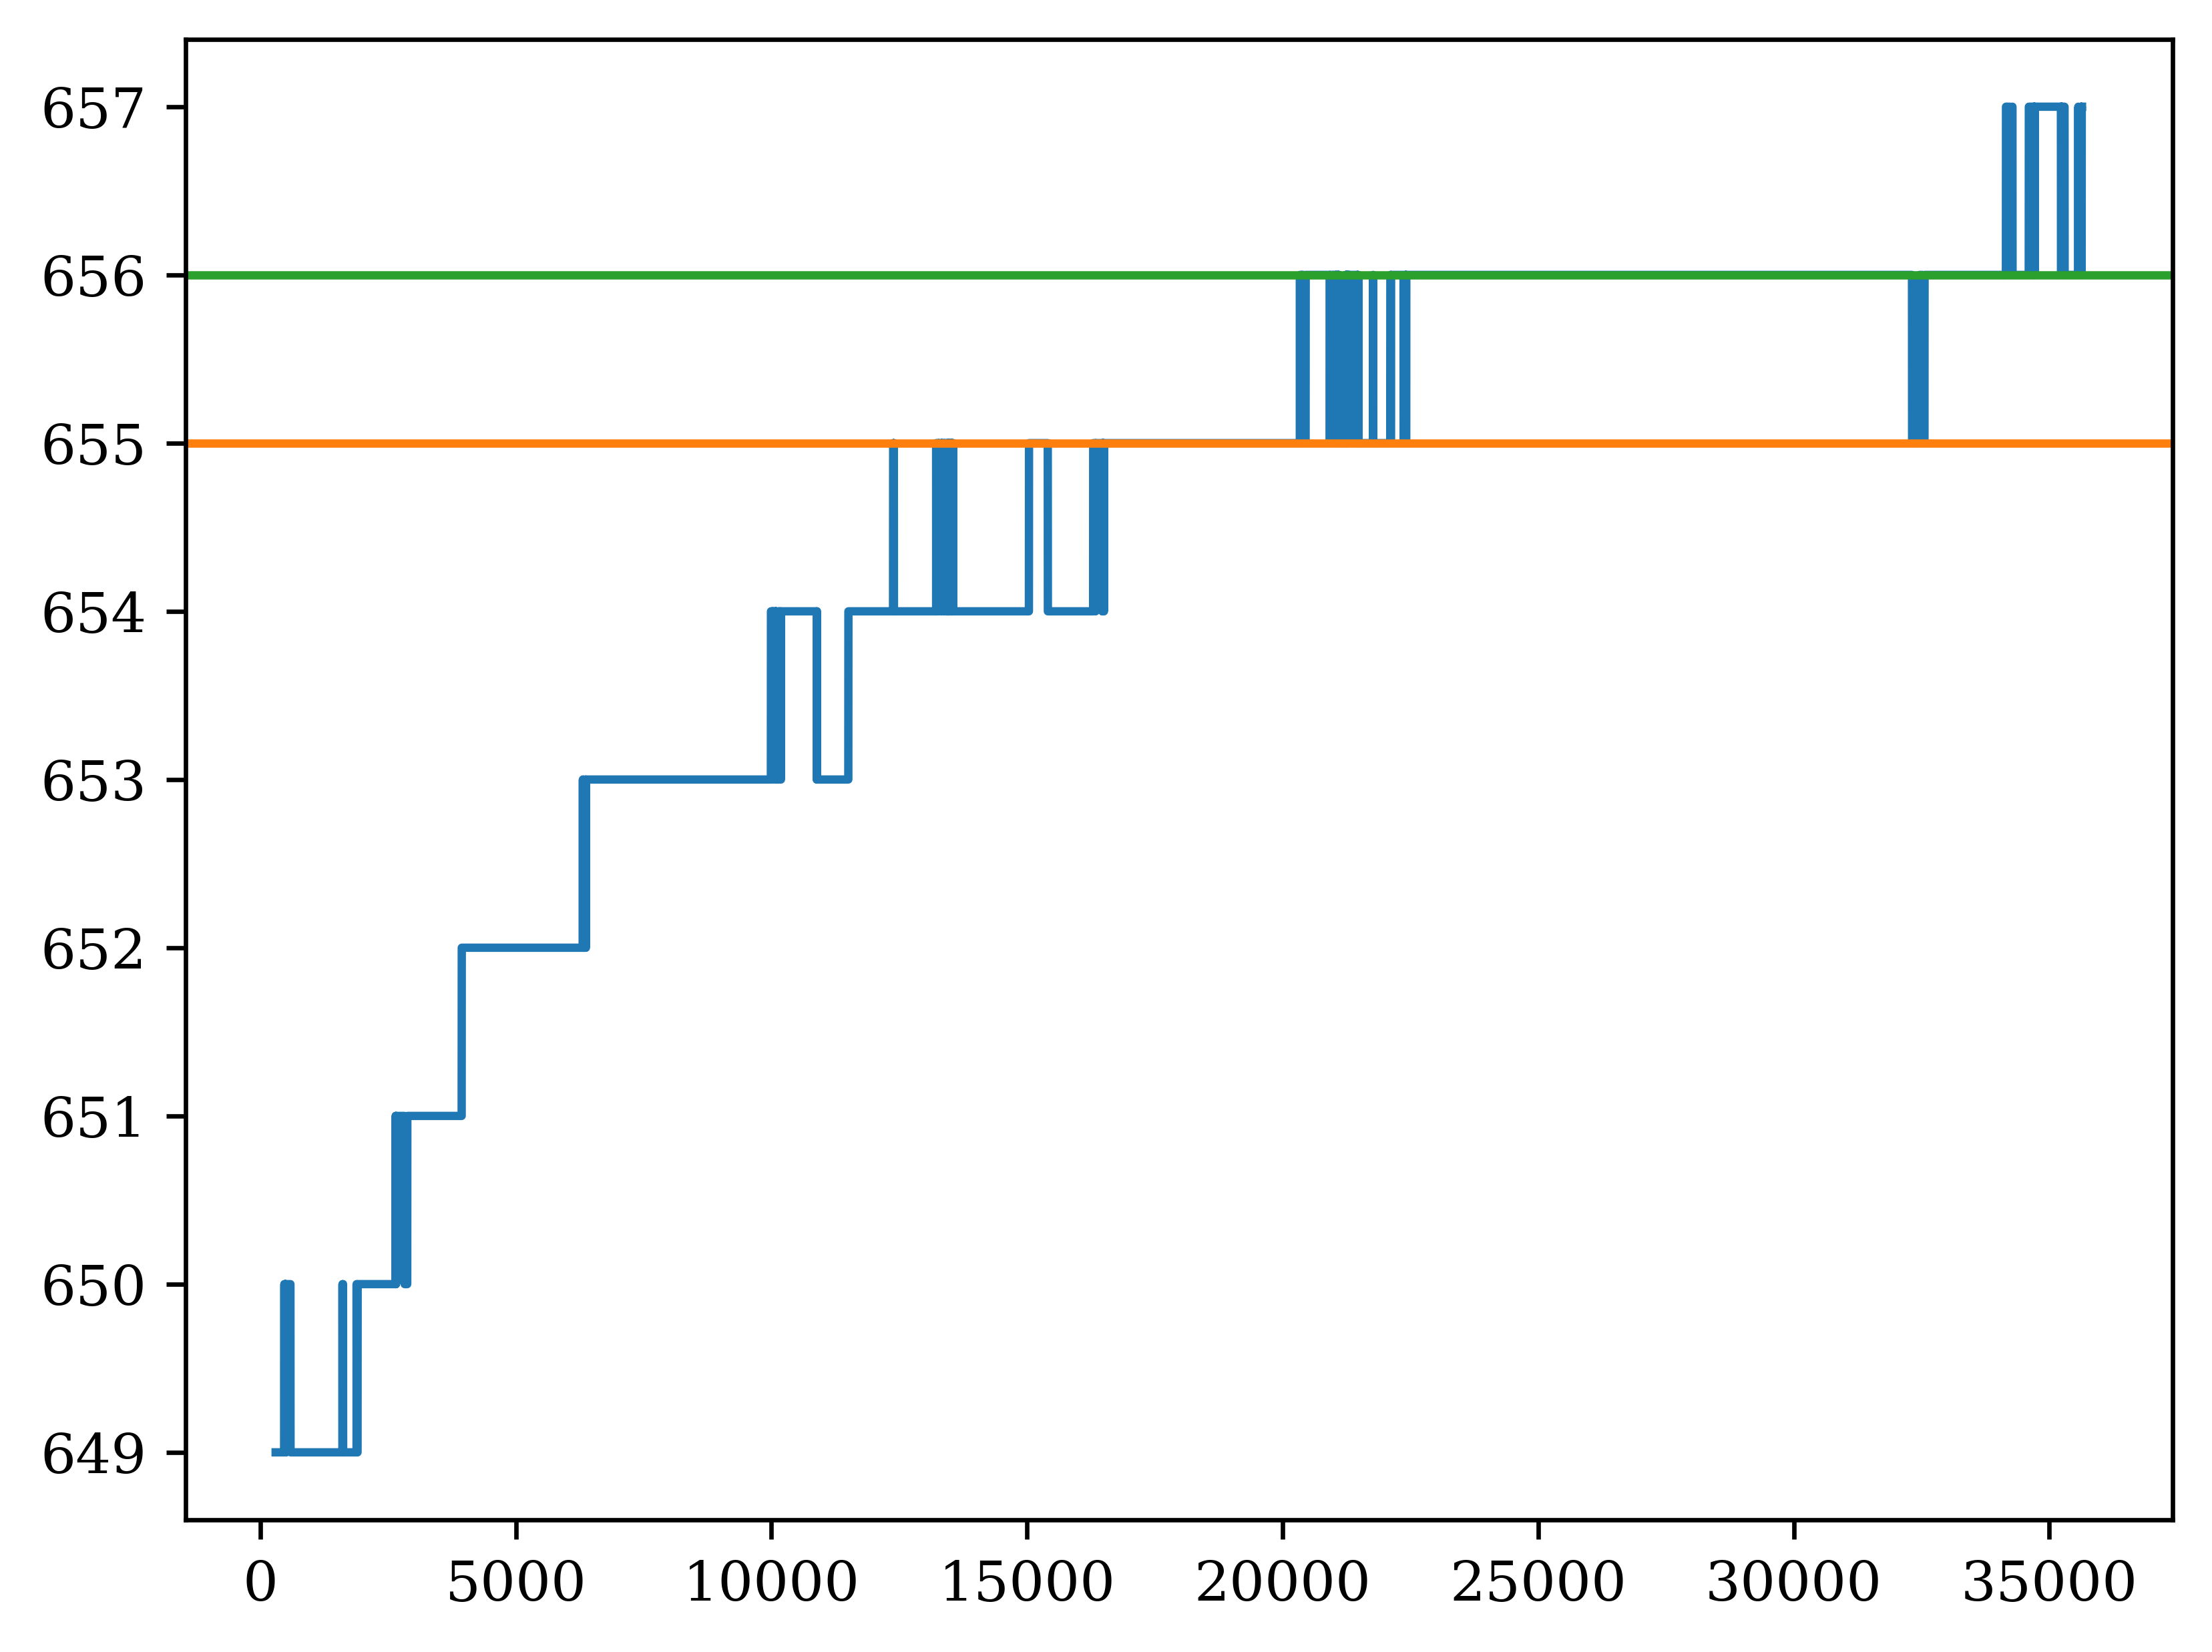

In [139]:
plt.plot(px.rolling(601, center=True).median())
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

## Male example

In [20]:
import av
from itertools import islice

In [3]:
file_ex = '/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_males/12wks_120223/session_20231202092818/depth.avi'

In [27]:
with av.open(file_ex, 'r') as container:
    container.streams.video[0].thread_type = 'AUTO'
    data = np.array(list(map(lambda x: x.to_ndarray(), islice(container.decode(video=0), 0, 7000, 100))))

In [28]:
data.shape

(70, 424, 512)

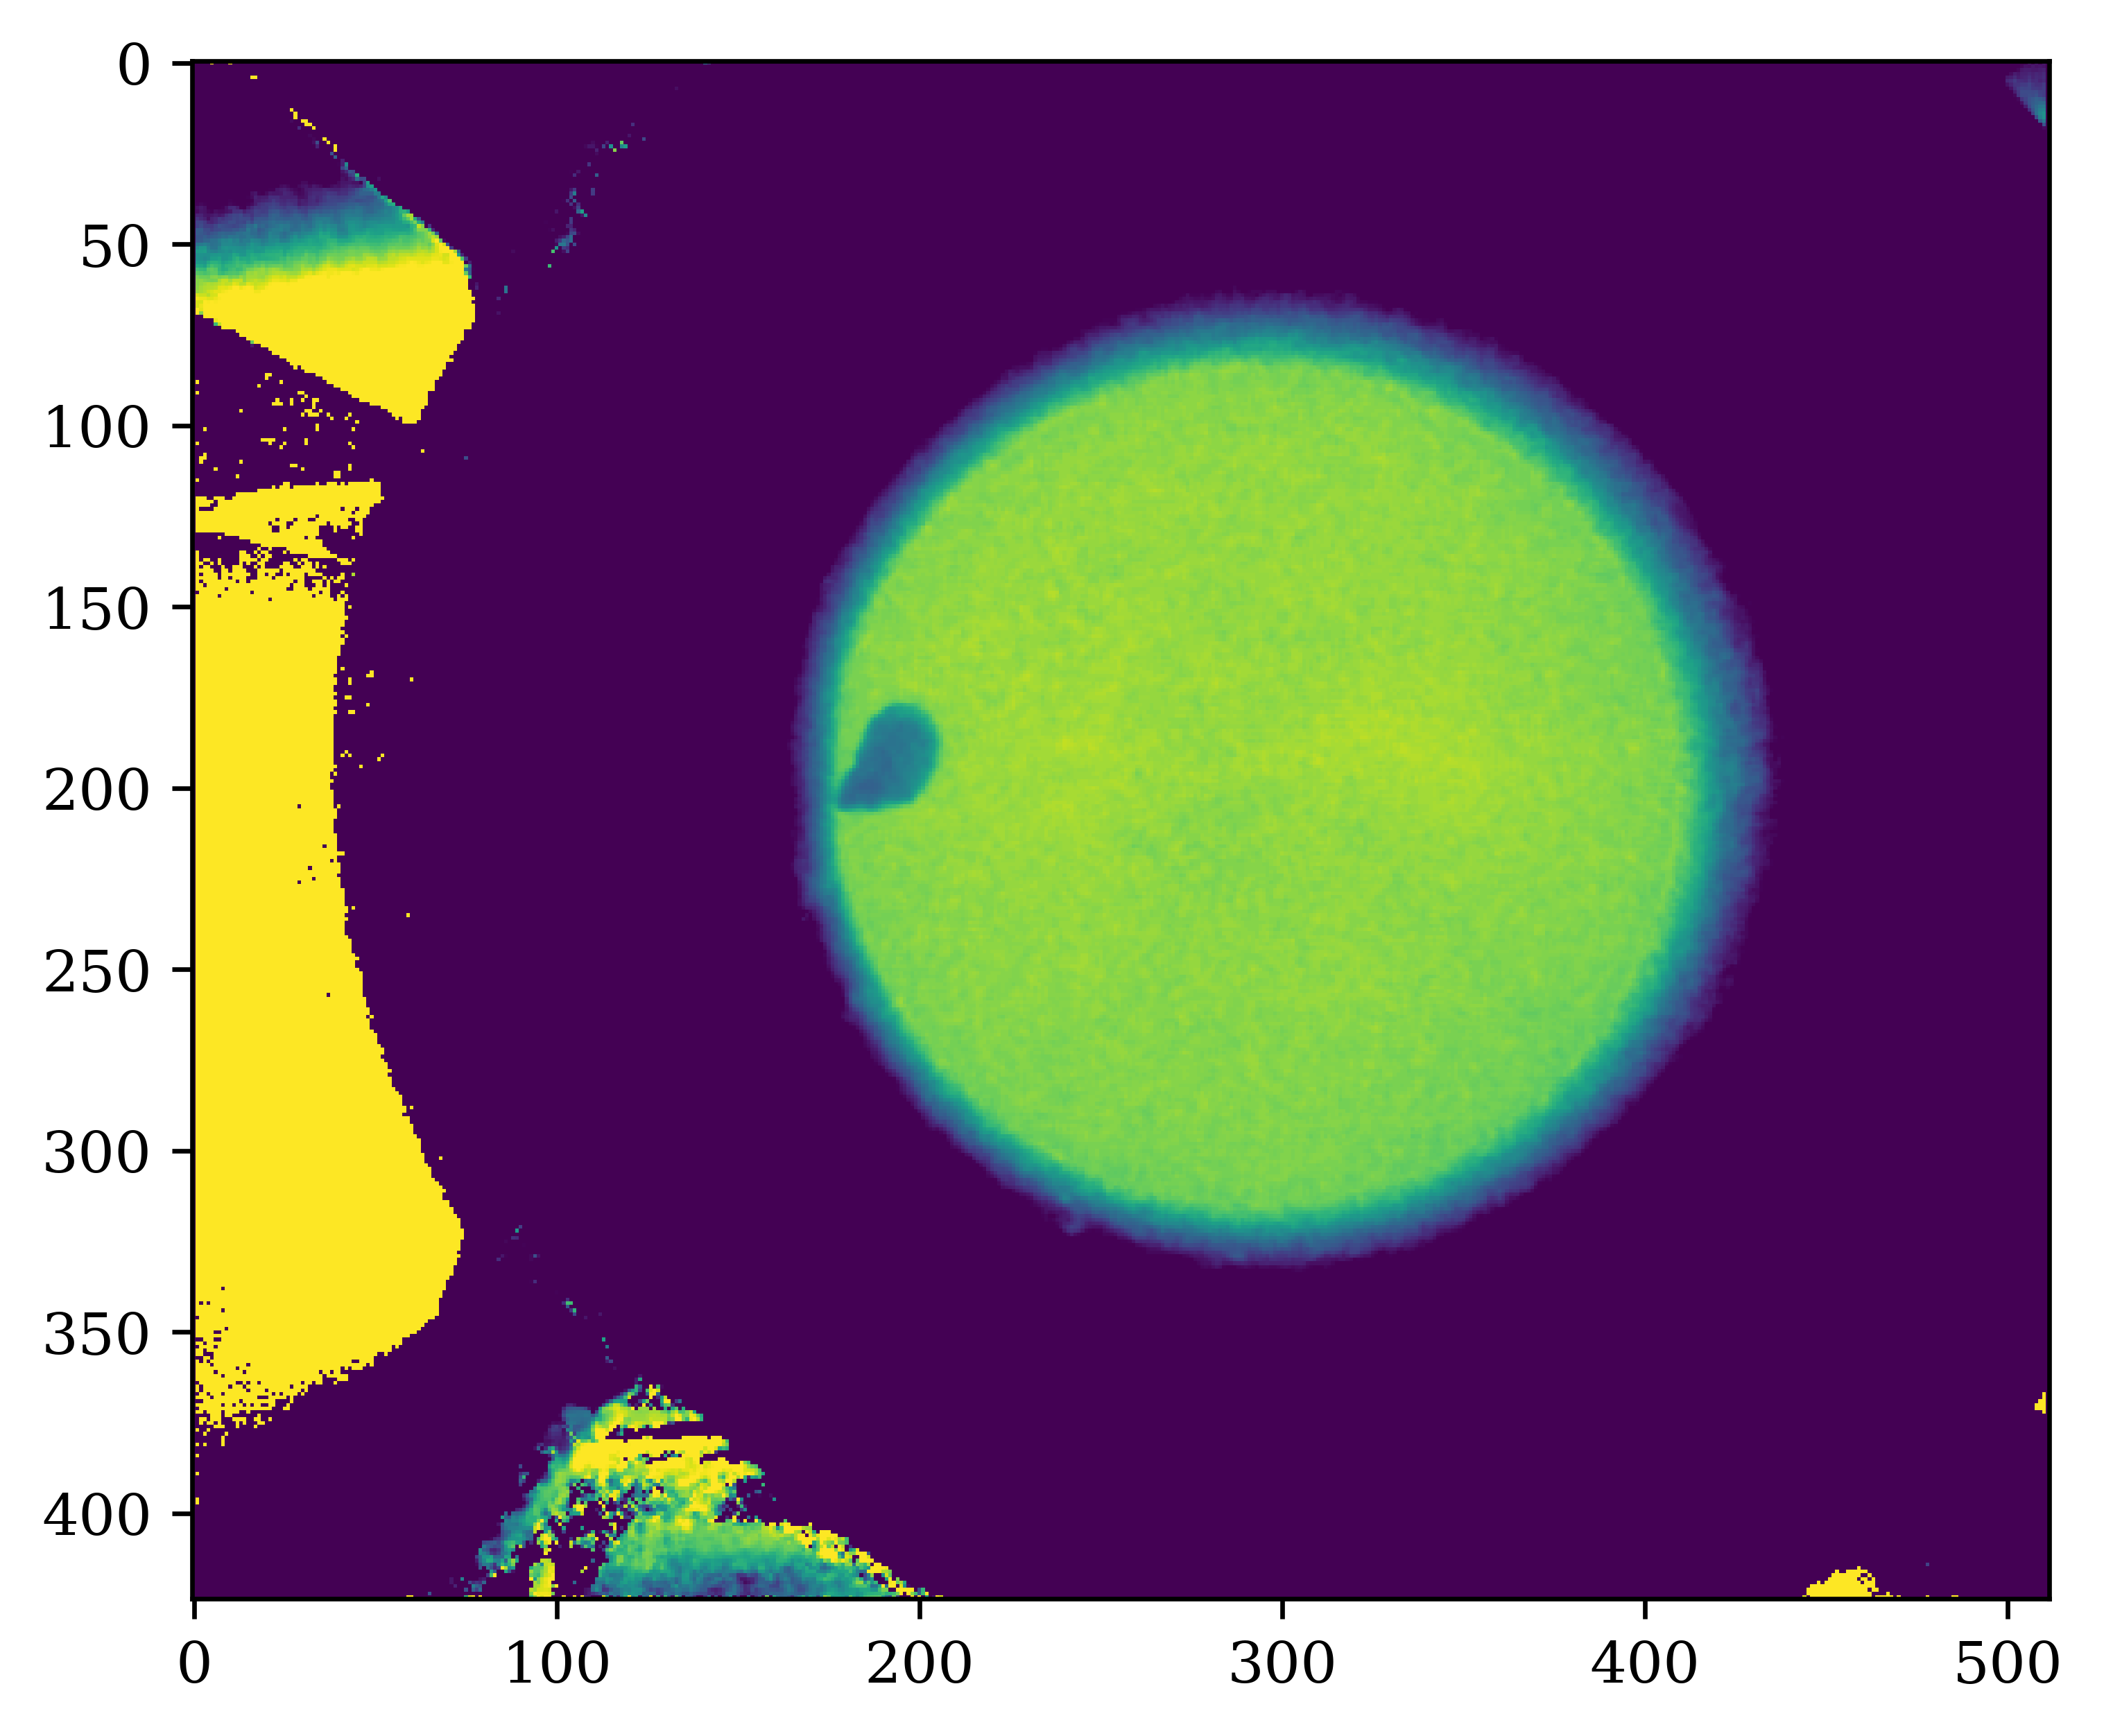

In [30]:
plt.imshow(data[1], vmin=600, vmax=700)

In [32]:
bg = np.median(data, axis=0)

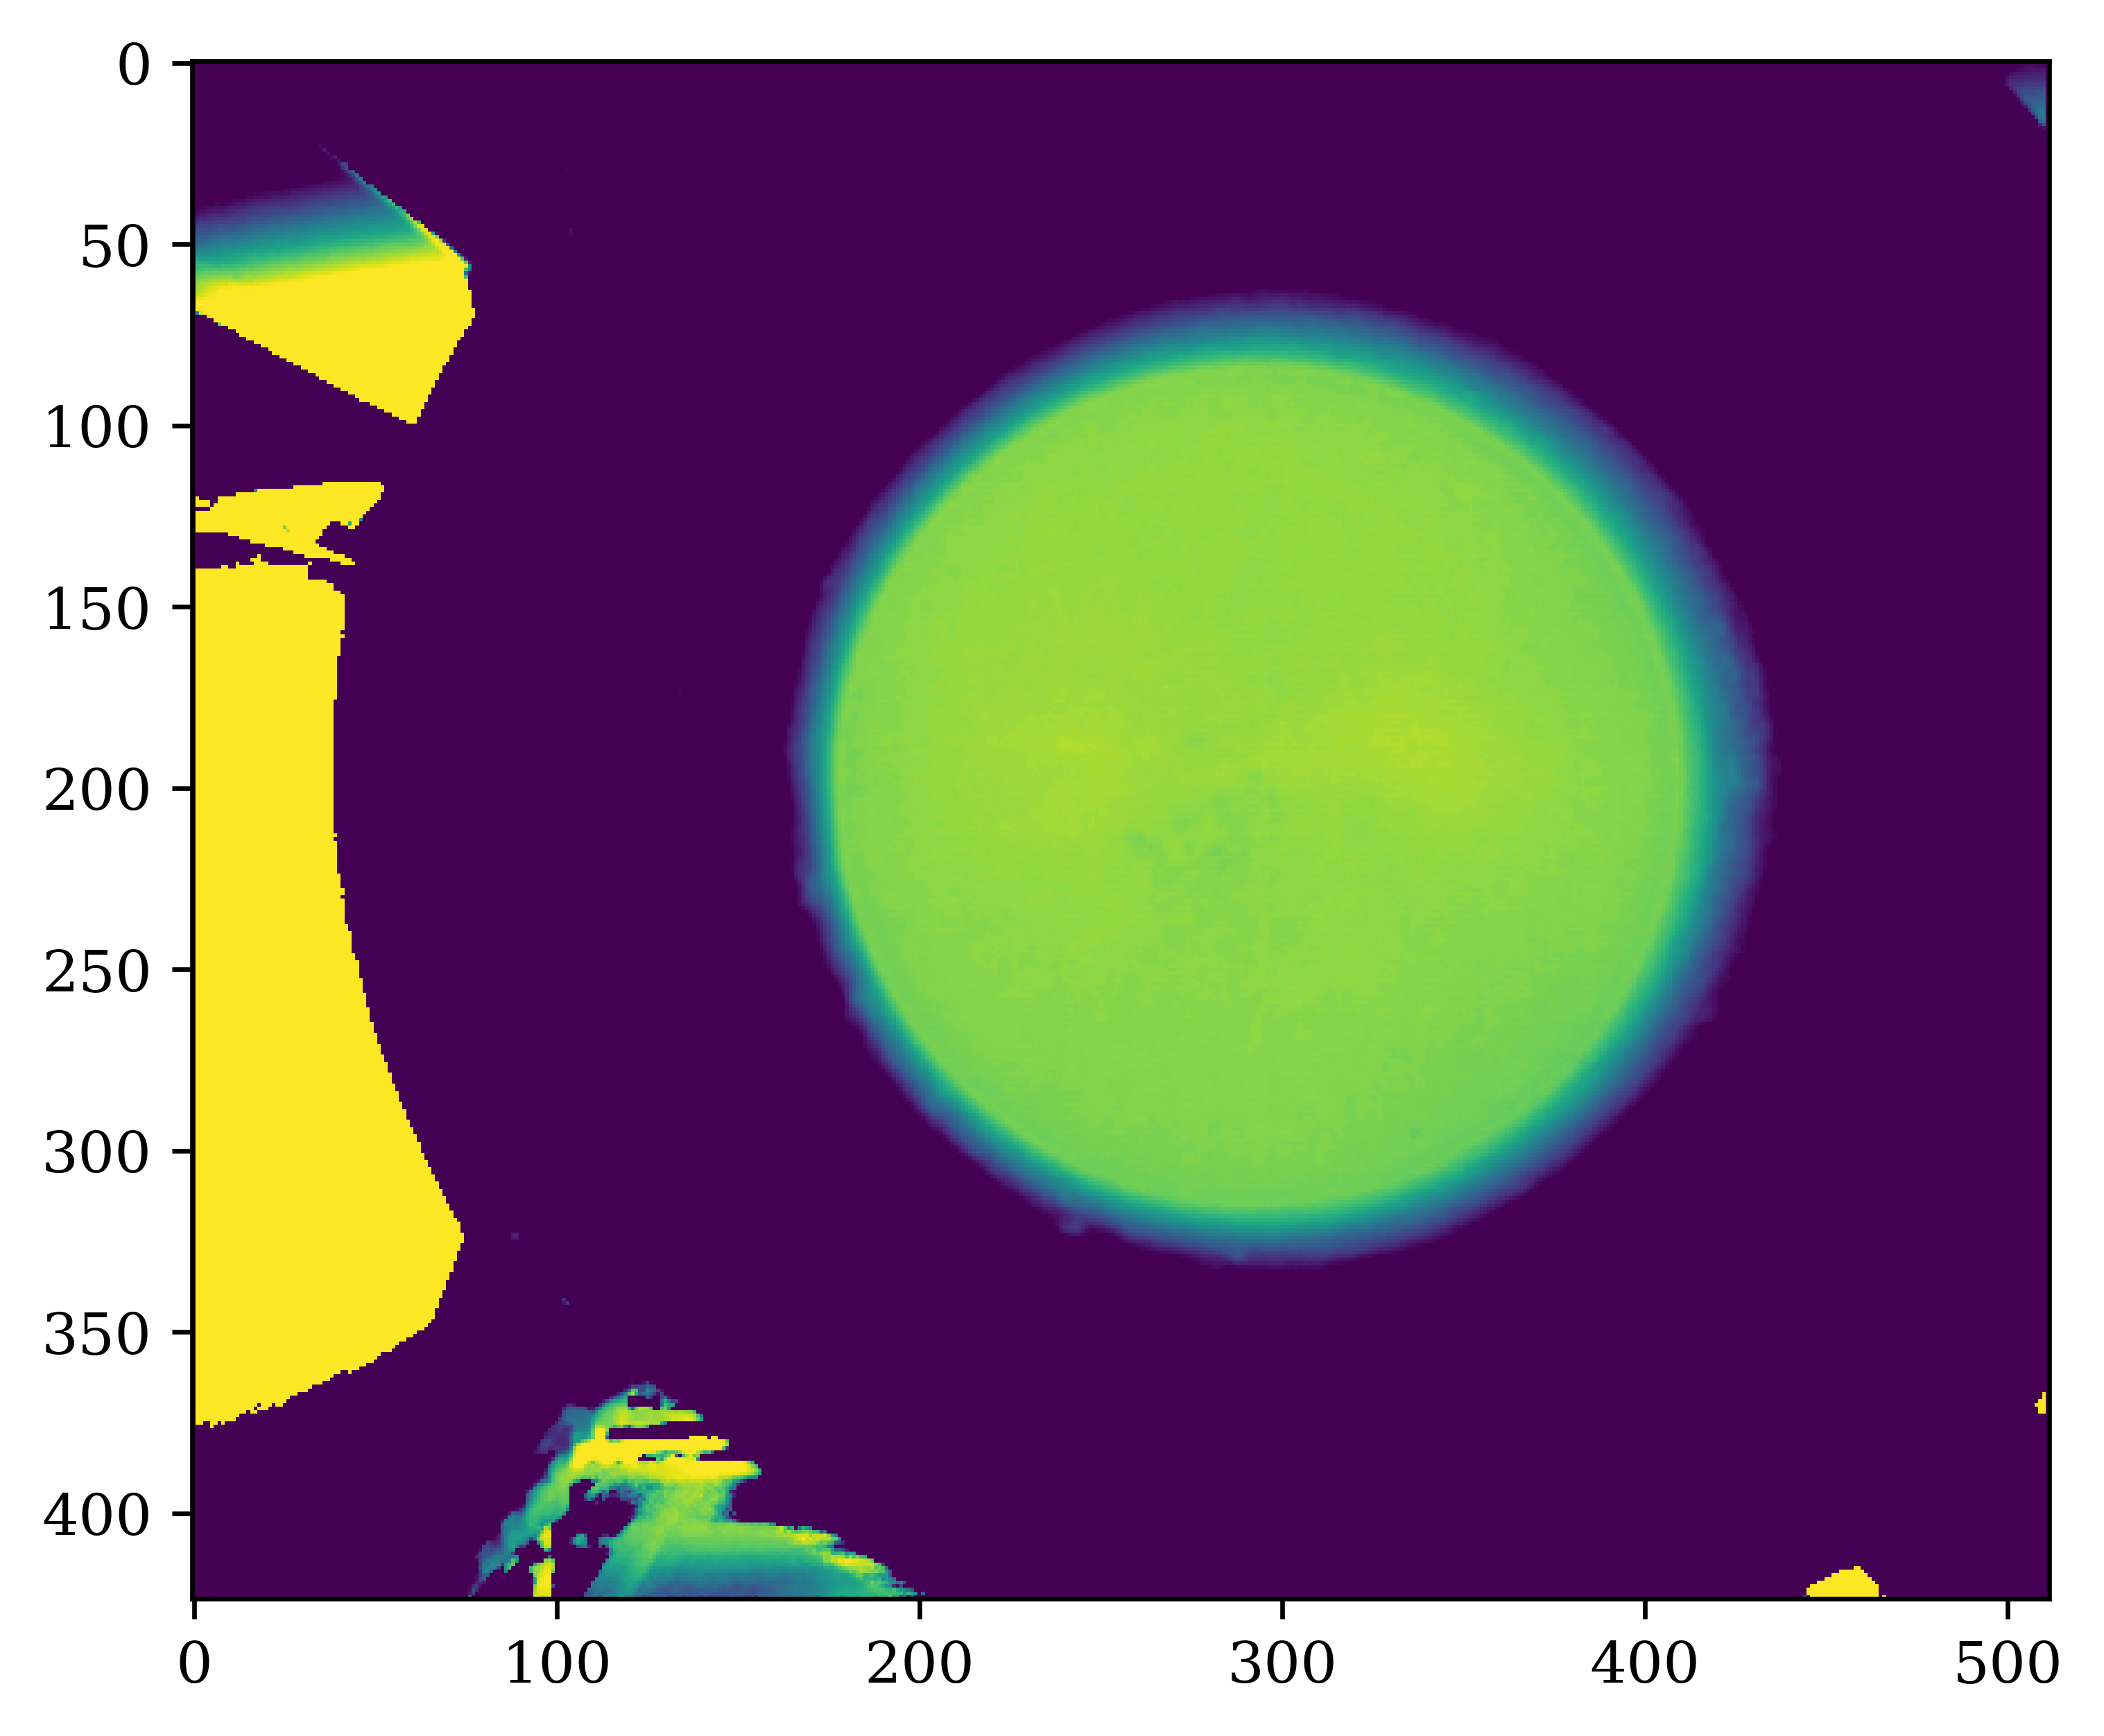

In [33]:
plt.imshow(bg, vmin=600, vmax=700)

In [34]:
smooth_bg = cv2.medianBlur(bg.astype('float32'), ksize=5)
smooth_bg = cv2.GaussianBlur(smooth_bg, ksize=(9, 9), sigmaX=2, sigmaY=2)

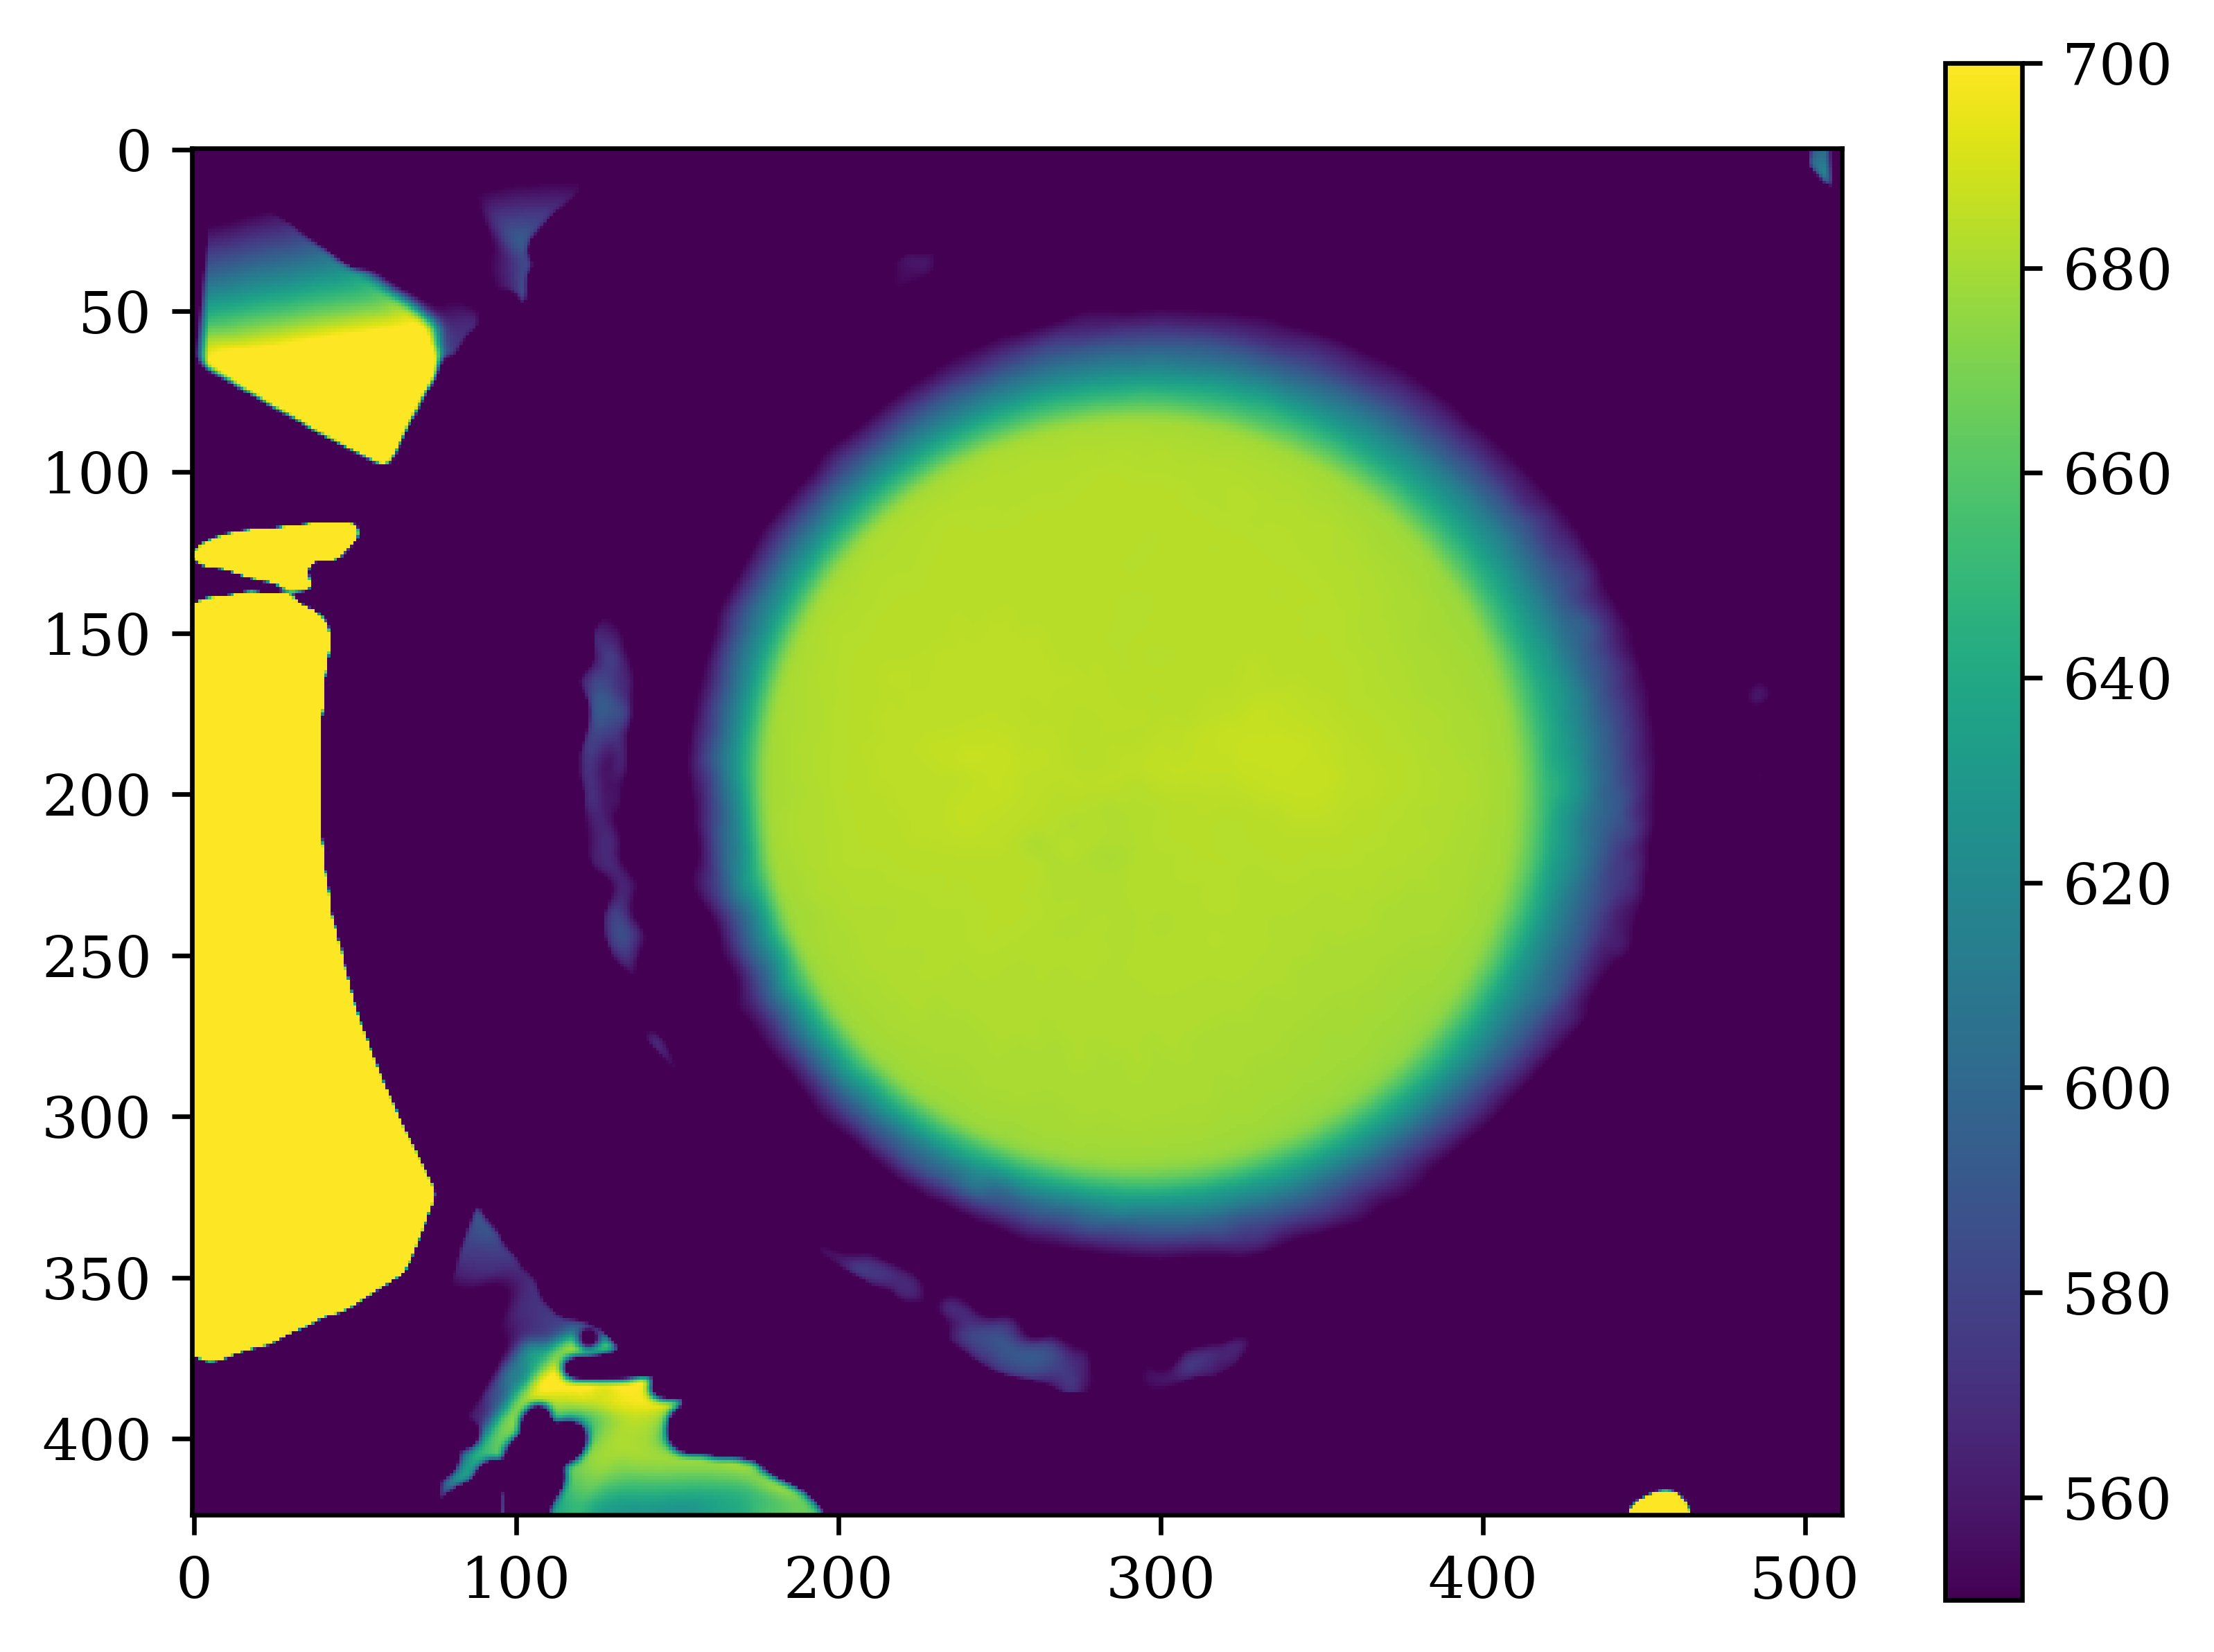

In [35]:
plt.imshow(smooth_bg, vmin=550, vmax=700)
plt.colorbar()

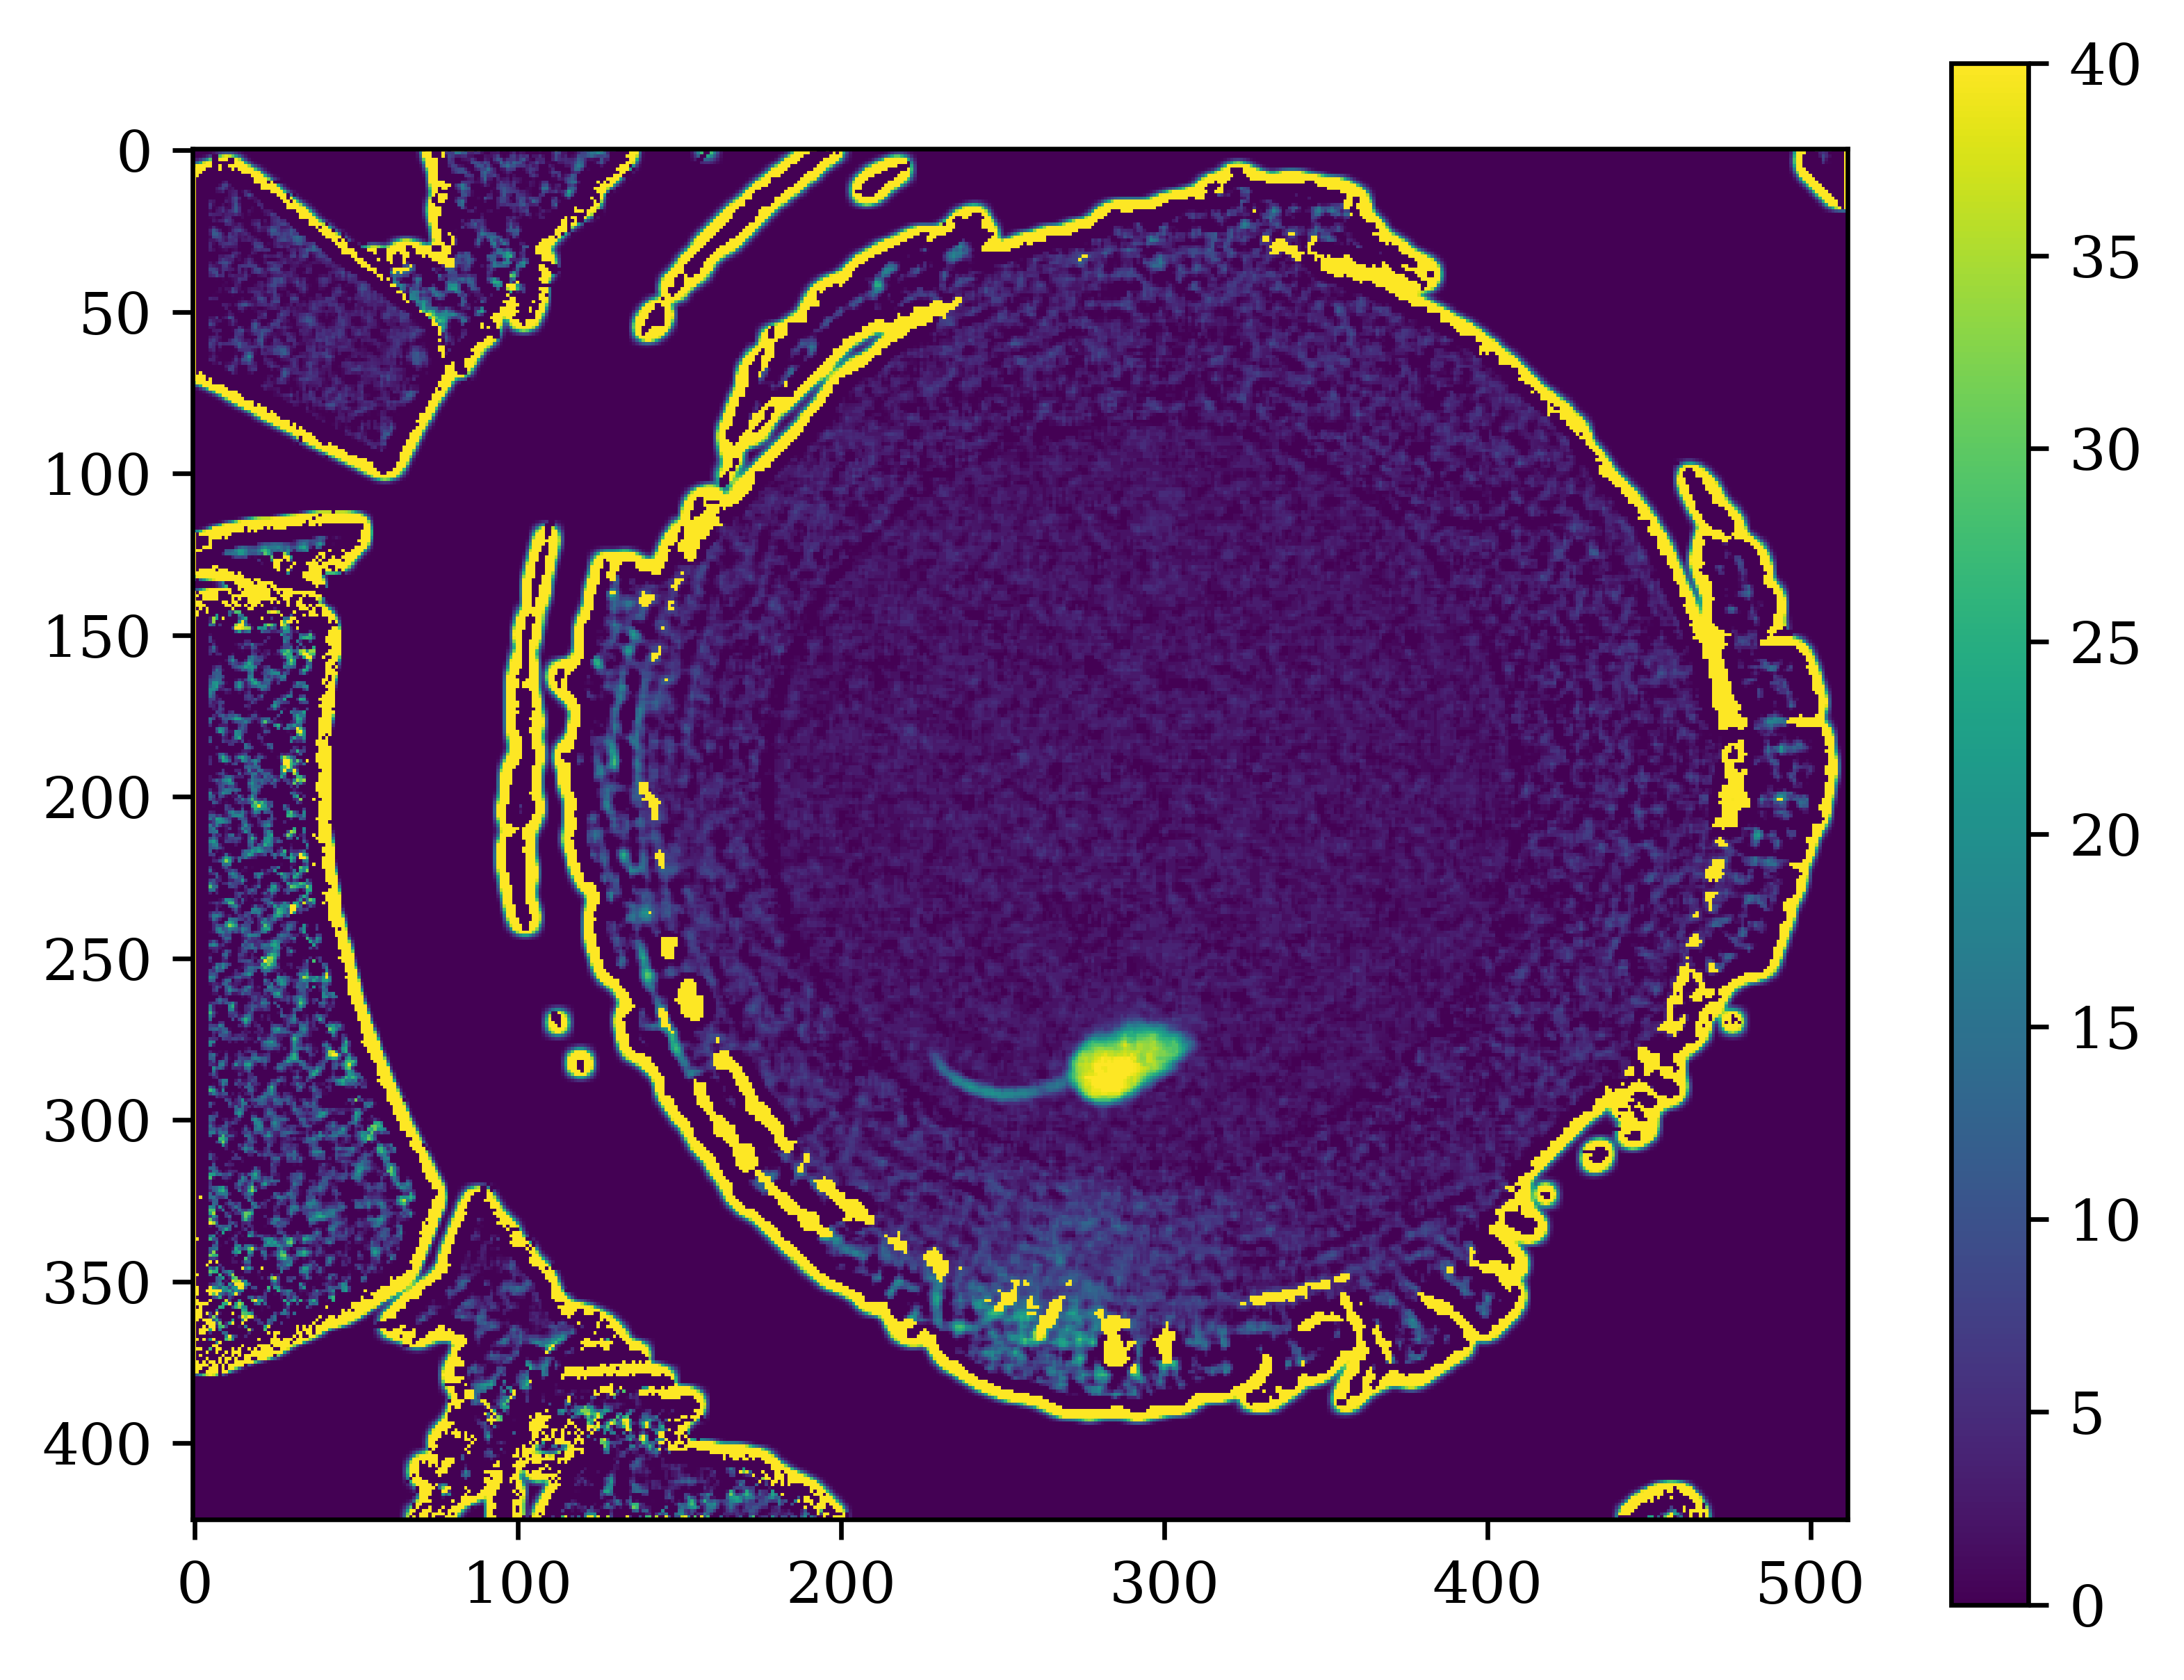

In [36]:
plt.imshow(smooth_bg.astype('float32') - data[10].astype('float32'), vmin=0, vmax=40)
# plt.imshow(bg2.astype('float32') - data[316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

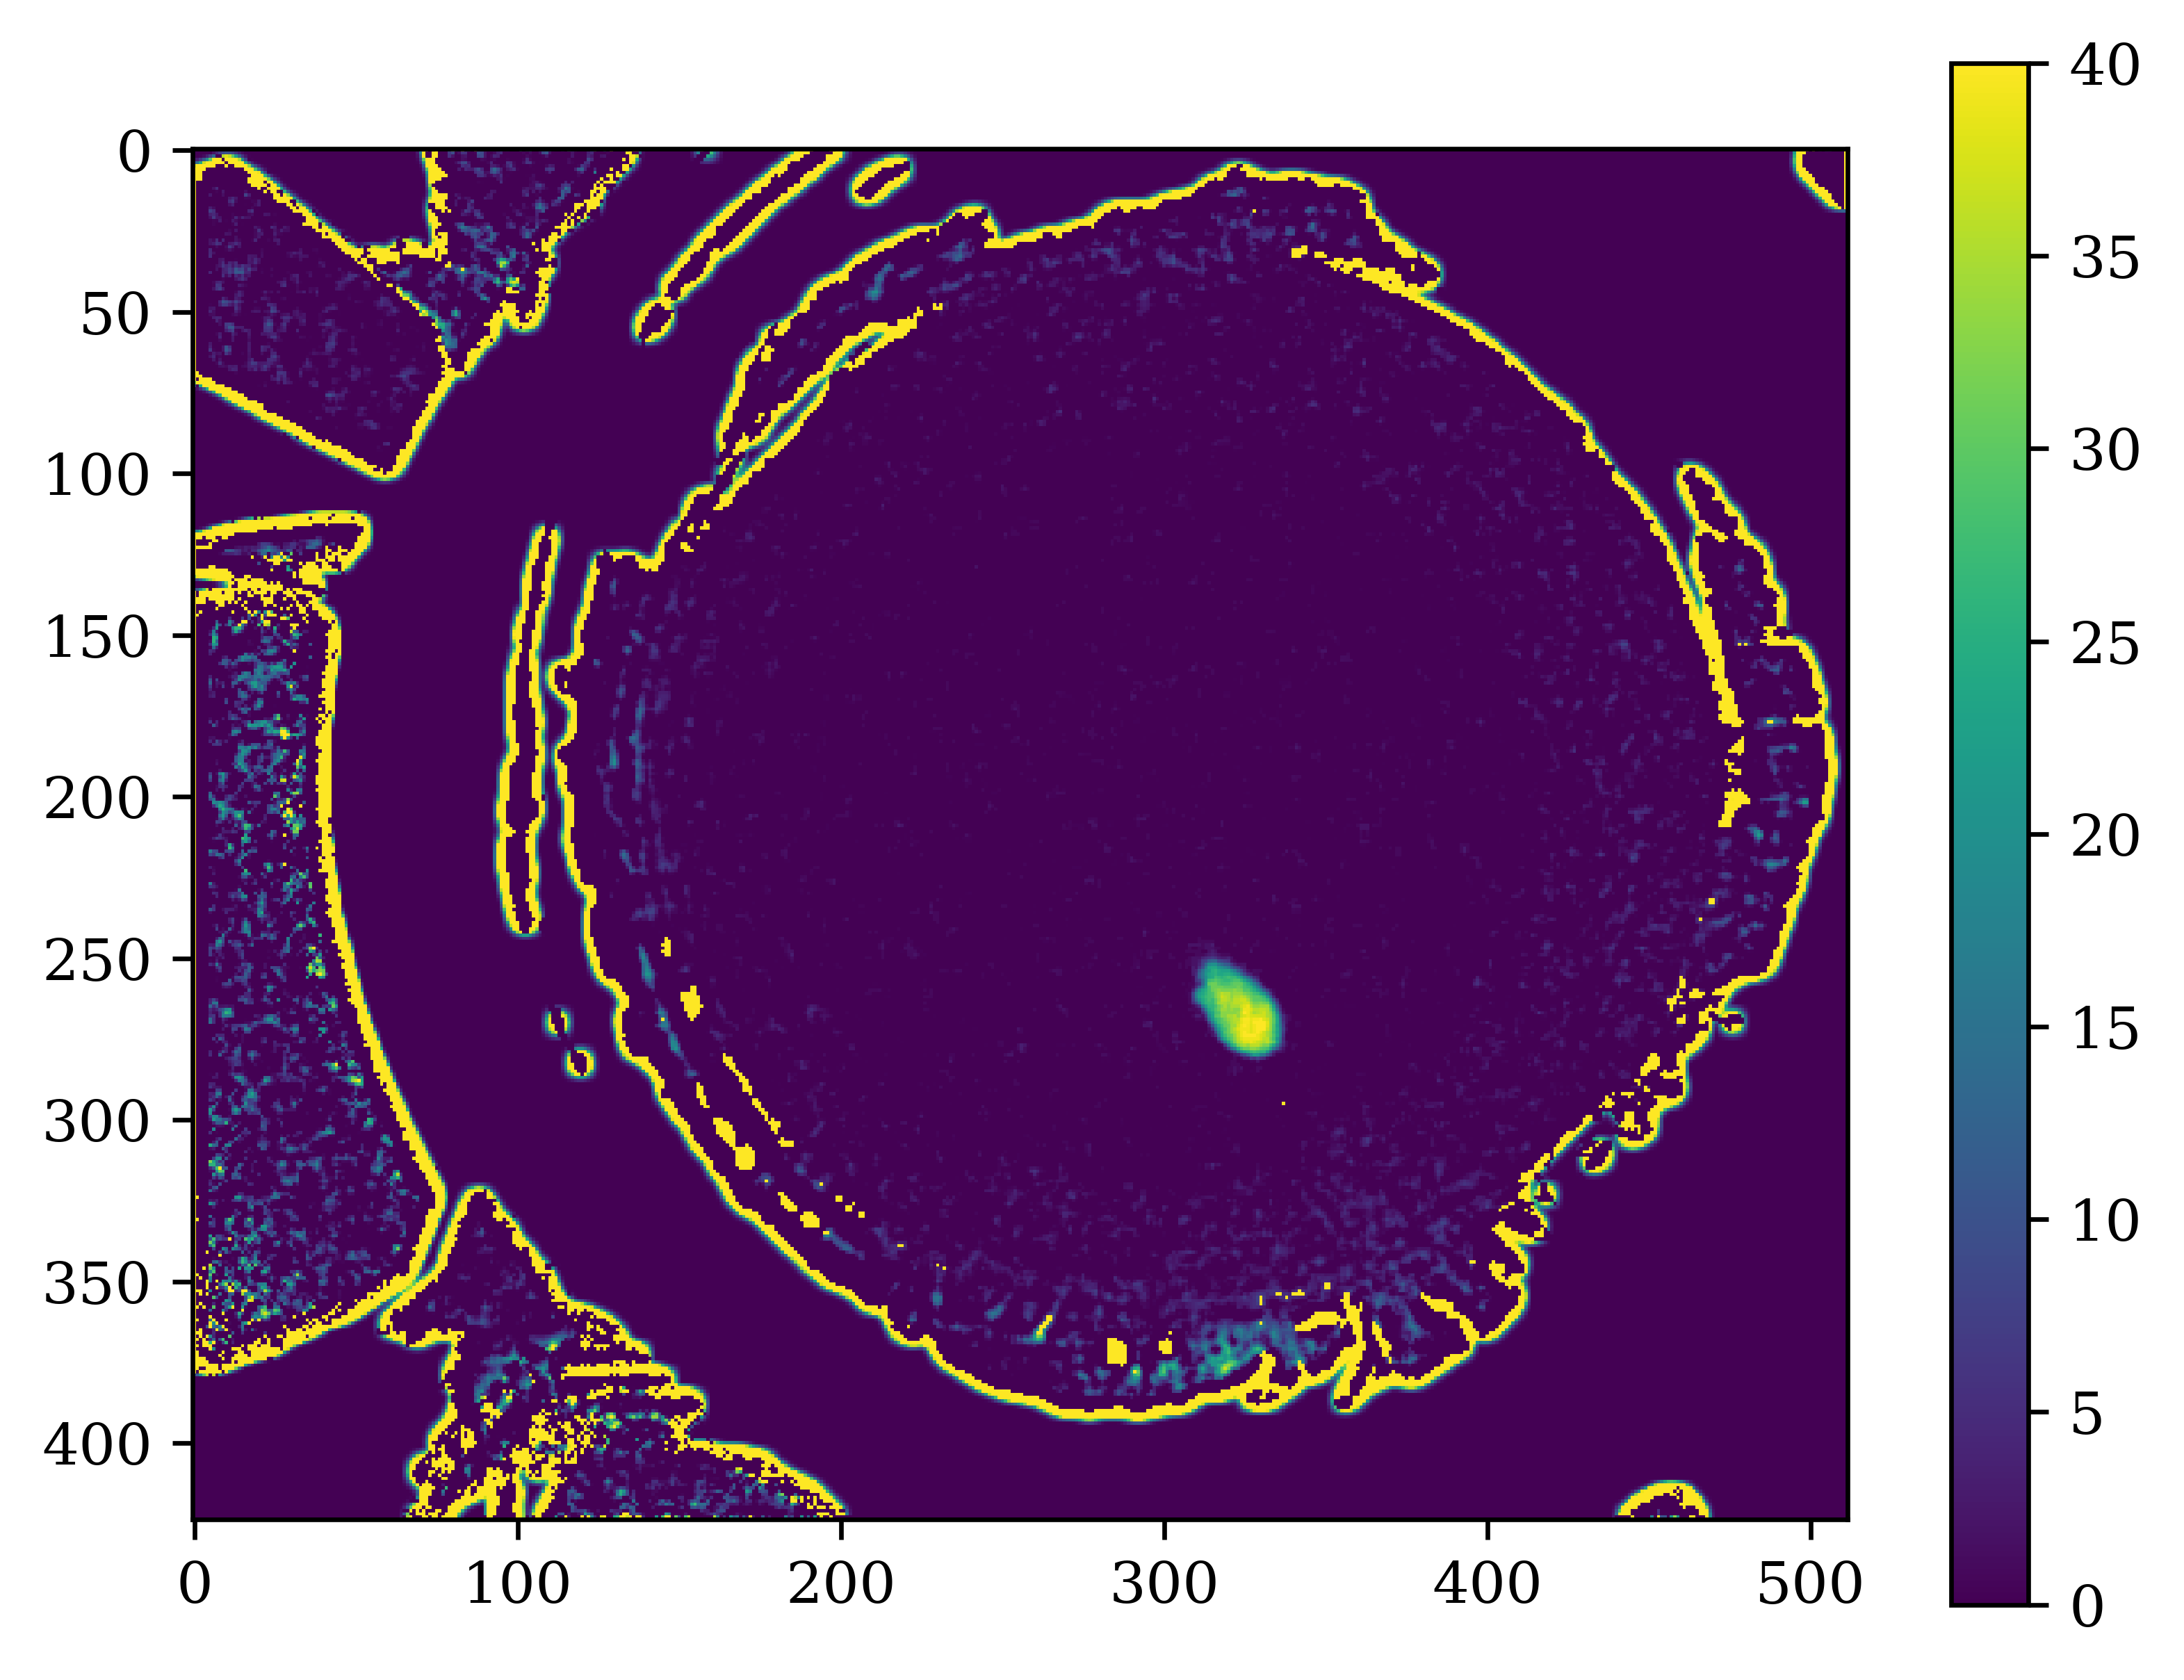

In [37]:
plt.imshow(smooth_bg.astype('float32') - data[-10].astype('float32'), vmin=0, vmax=40)
# plt.imshow(bg2.astype('float32') - data[-316].astype('float32'), vmin=0, vmax=40)
plt.colorbar()

In [38]:
px = []
with av.open(file_ex, 'r') as container:
    container.streams.video[0].thread_type = 'AUTO'
    for frame in map(lambda x: x.to_ndarray(), container.decode(video=0)):
        px.append(frame[60, 300])
px = pd.Series(px)

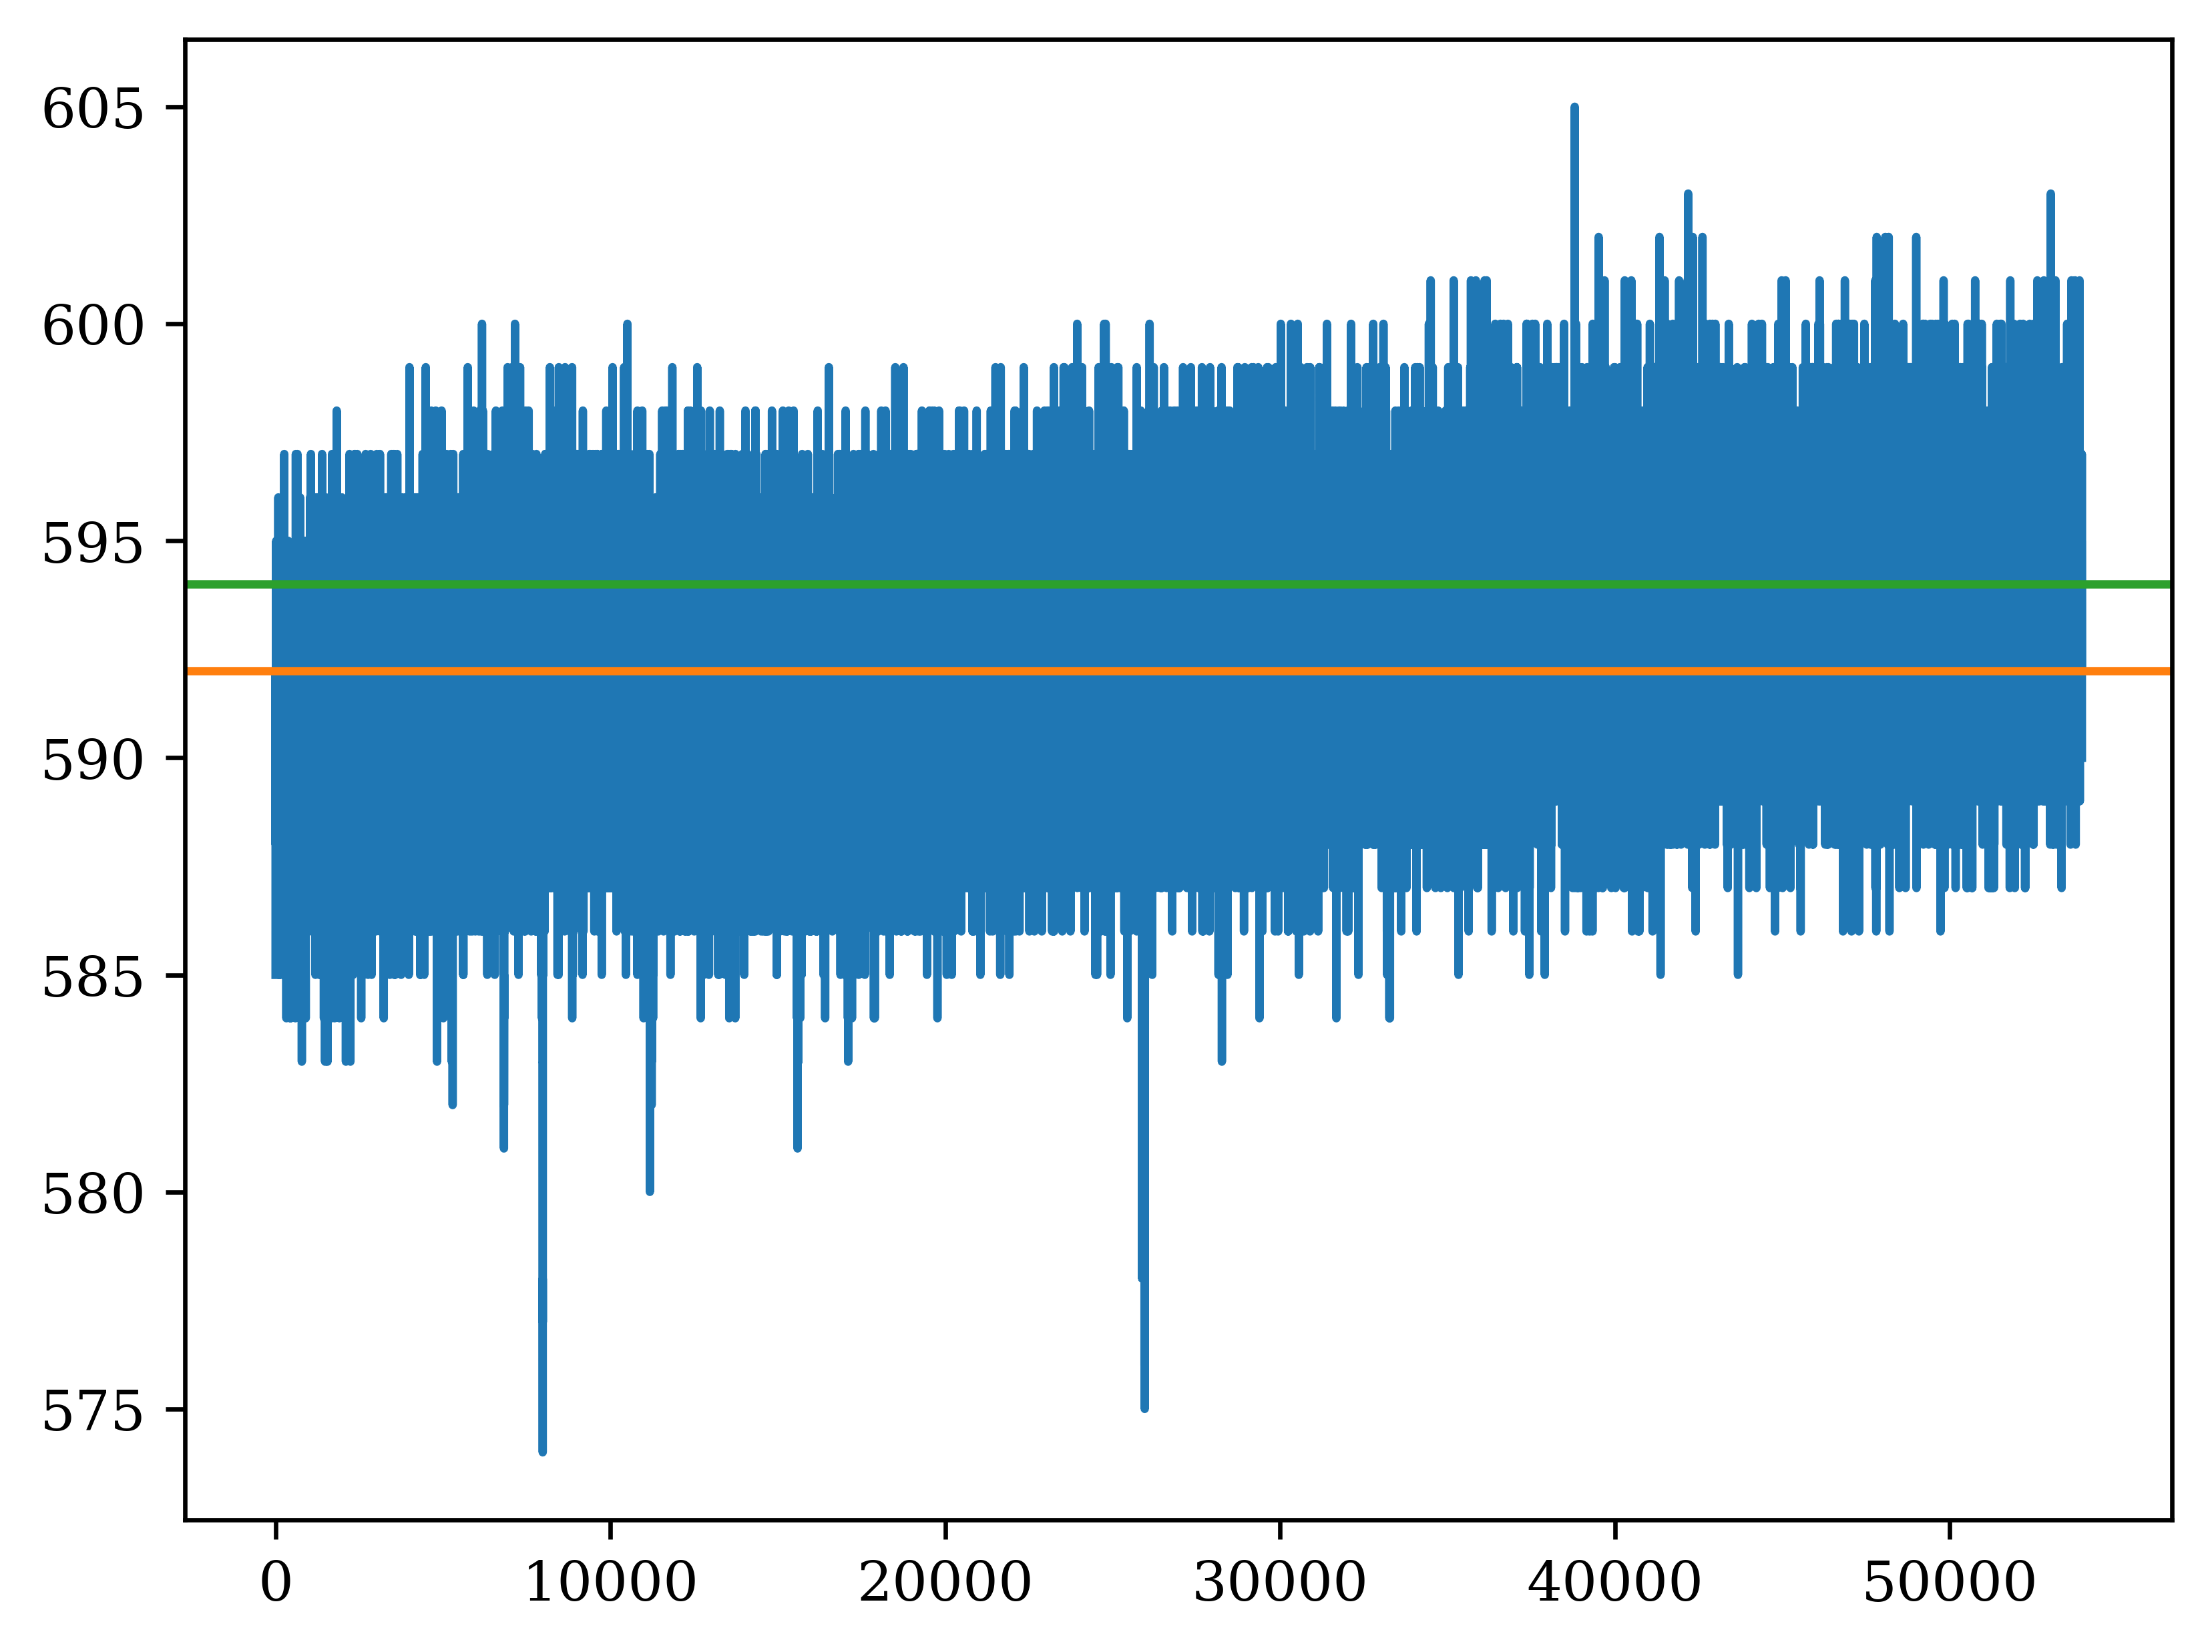

In [39]:
plt.plot(px)
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

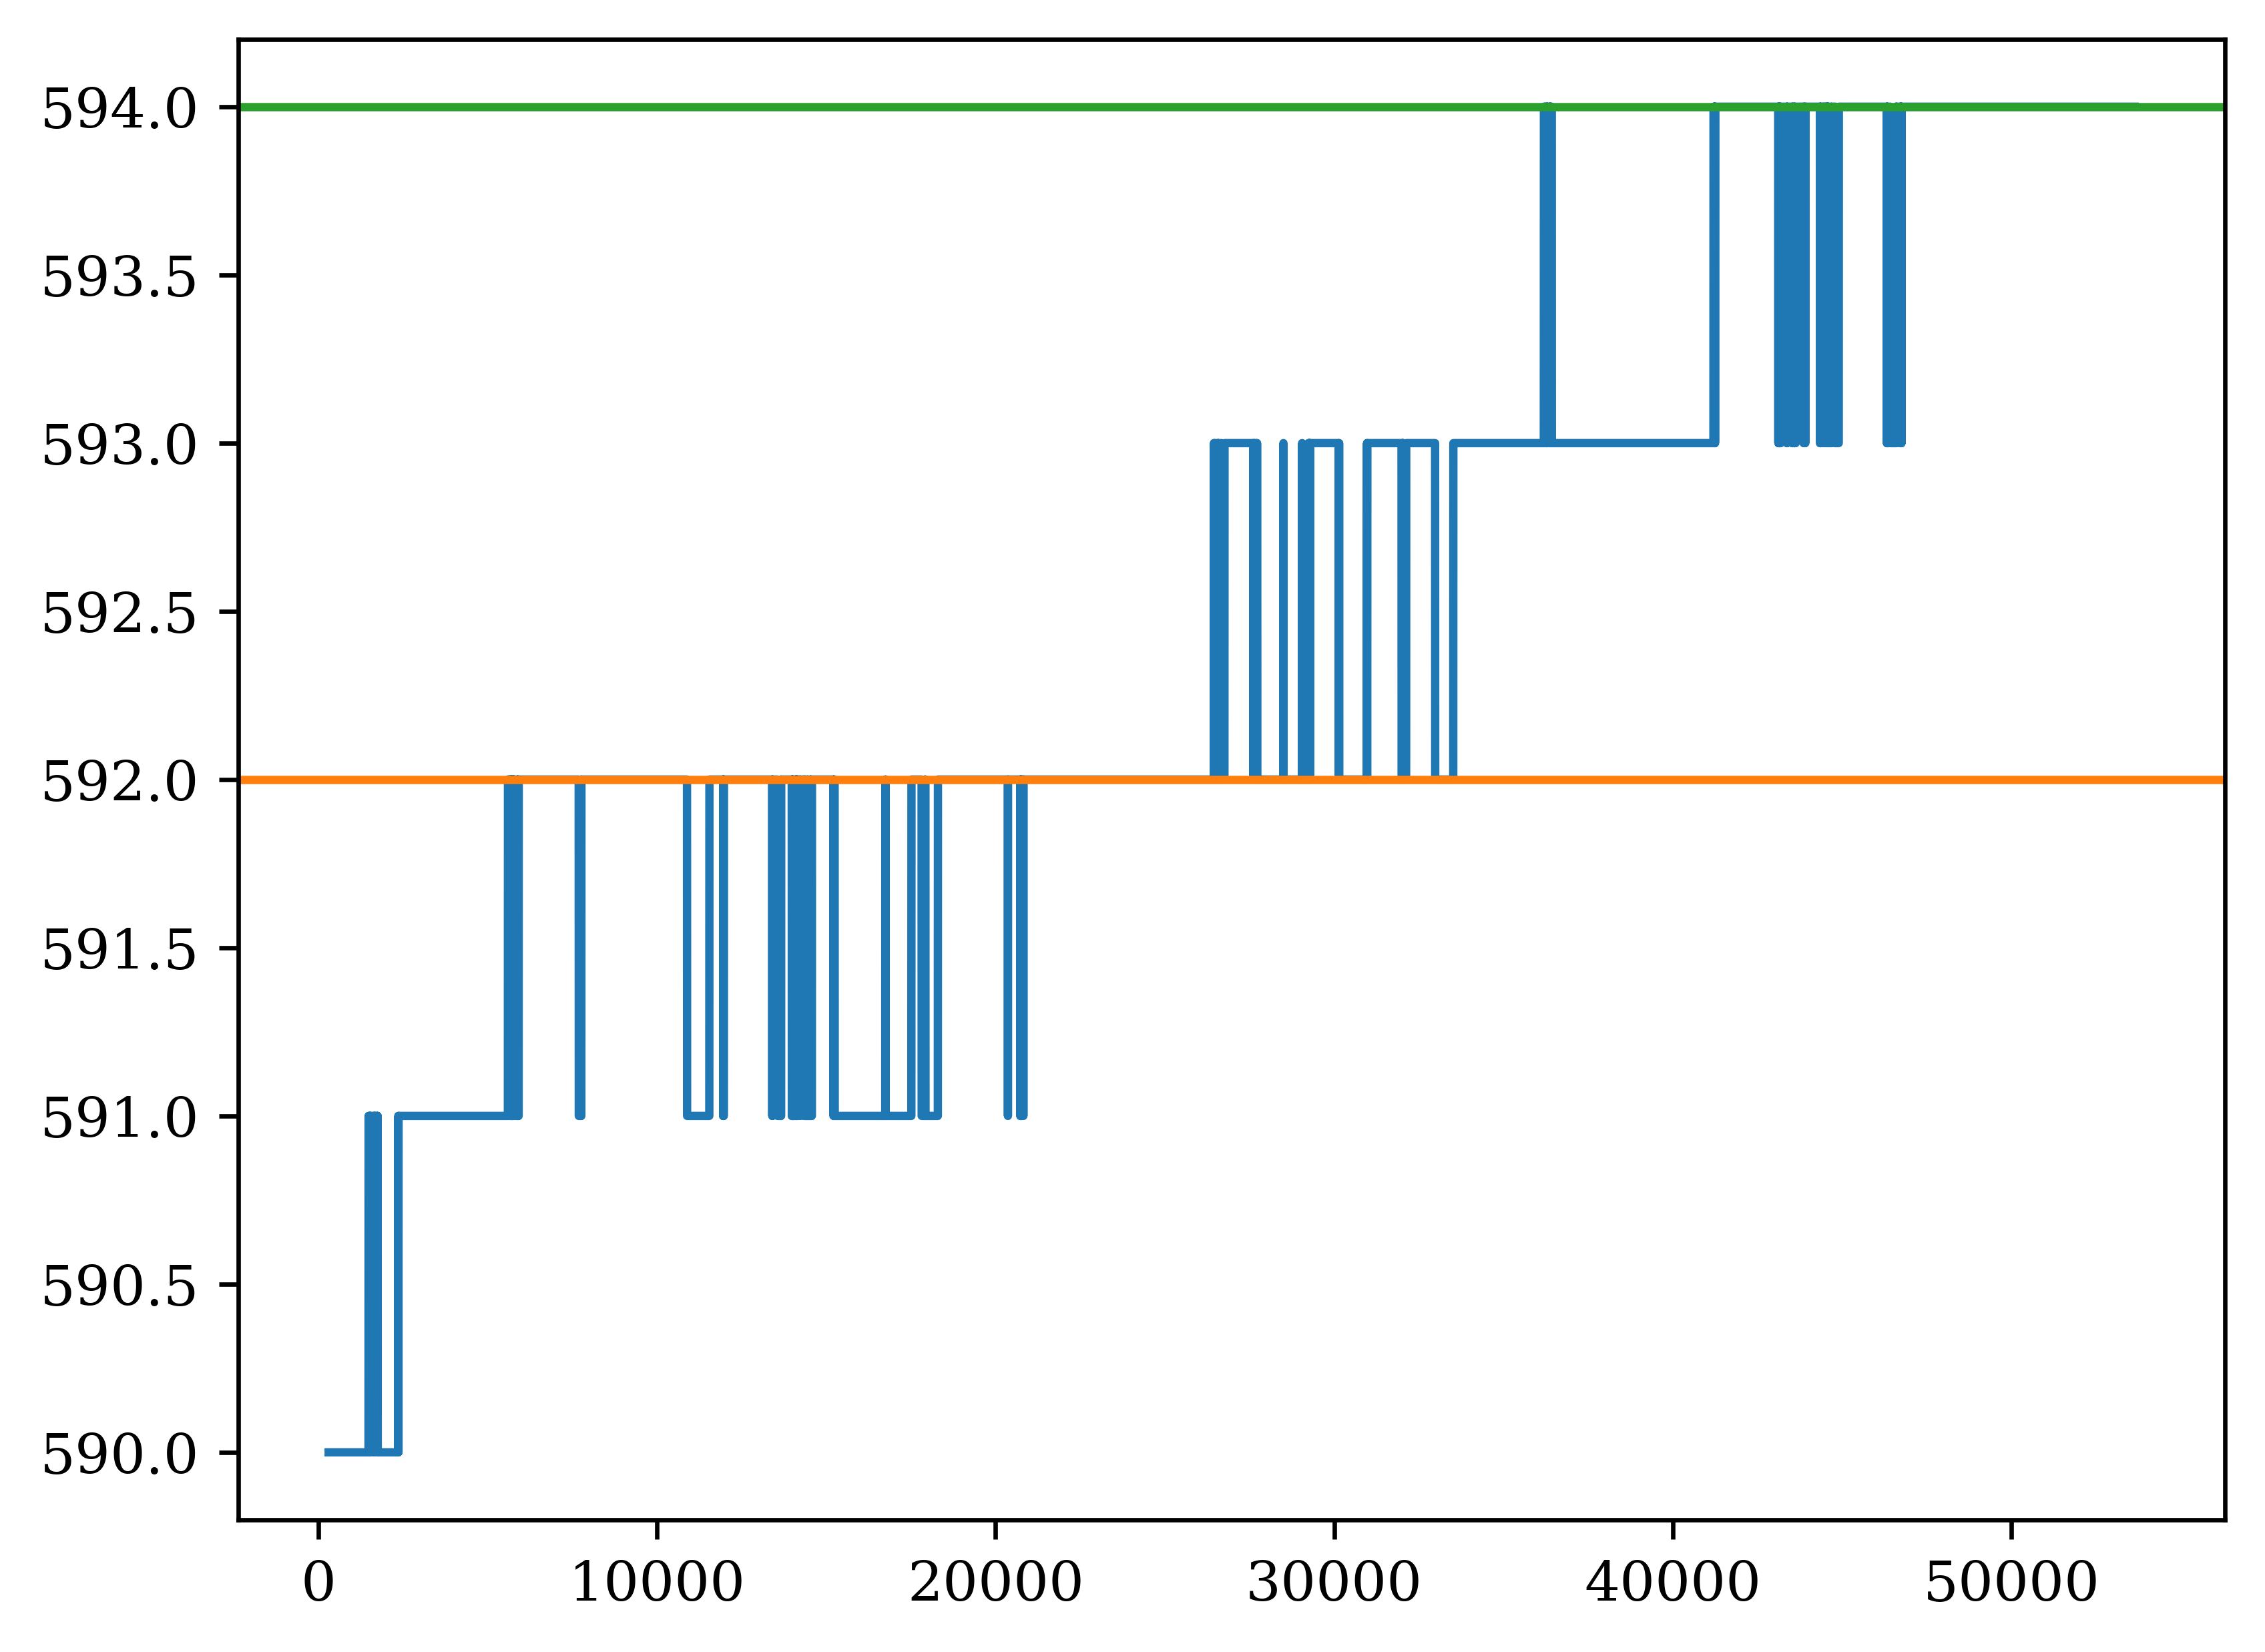

In [40]:
plt.plot(px.rolling(601, center=True).median())
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

In [41]:
px = []
with av.open(file_ex, 'r') as container:
    container.streams.video[0].thread_type = 'AUTO'
    for frame in map(lambda x: x.to_ndarray(), container.decode(video=0)):
        px.append(frame[75, 300])
px = pd.Series(px)

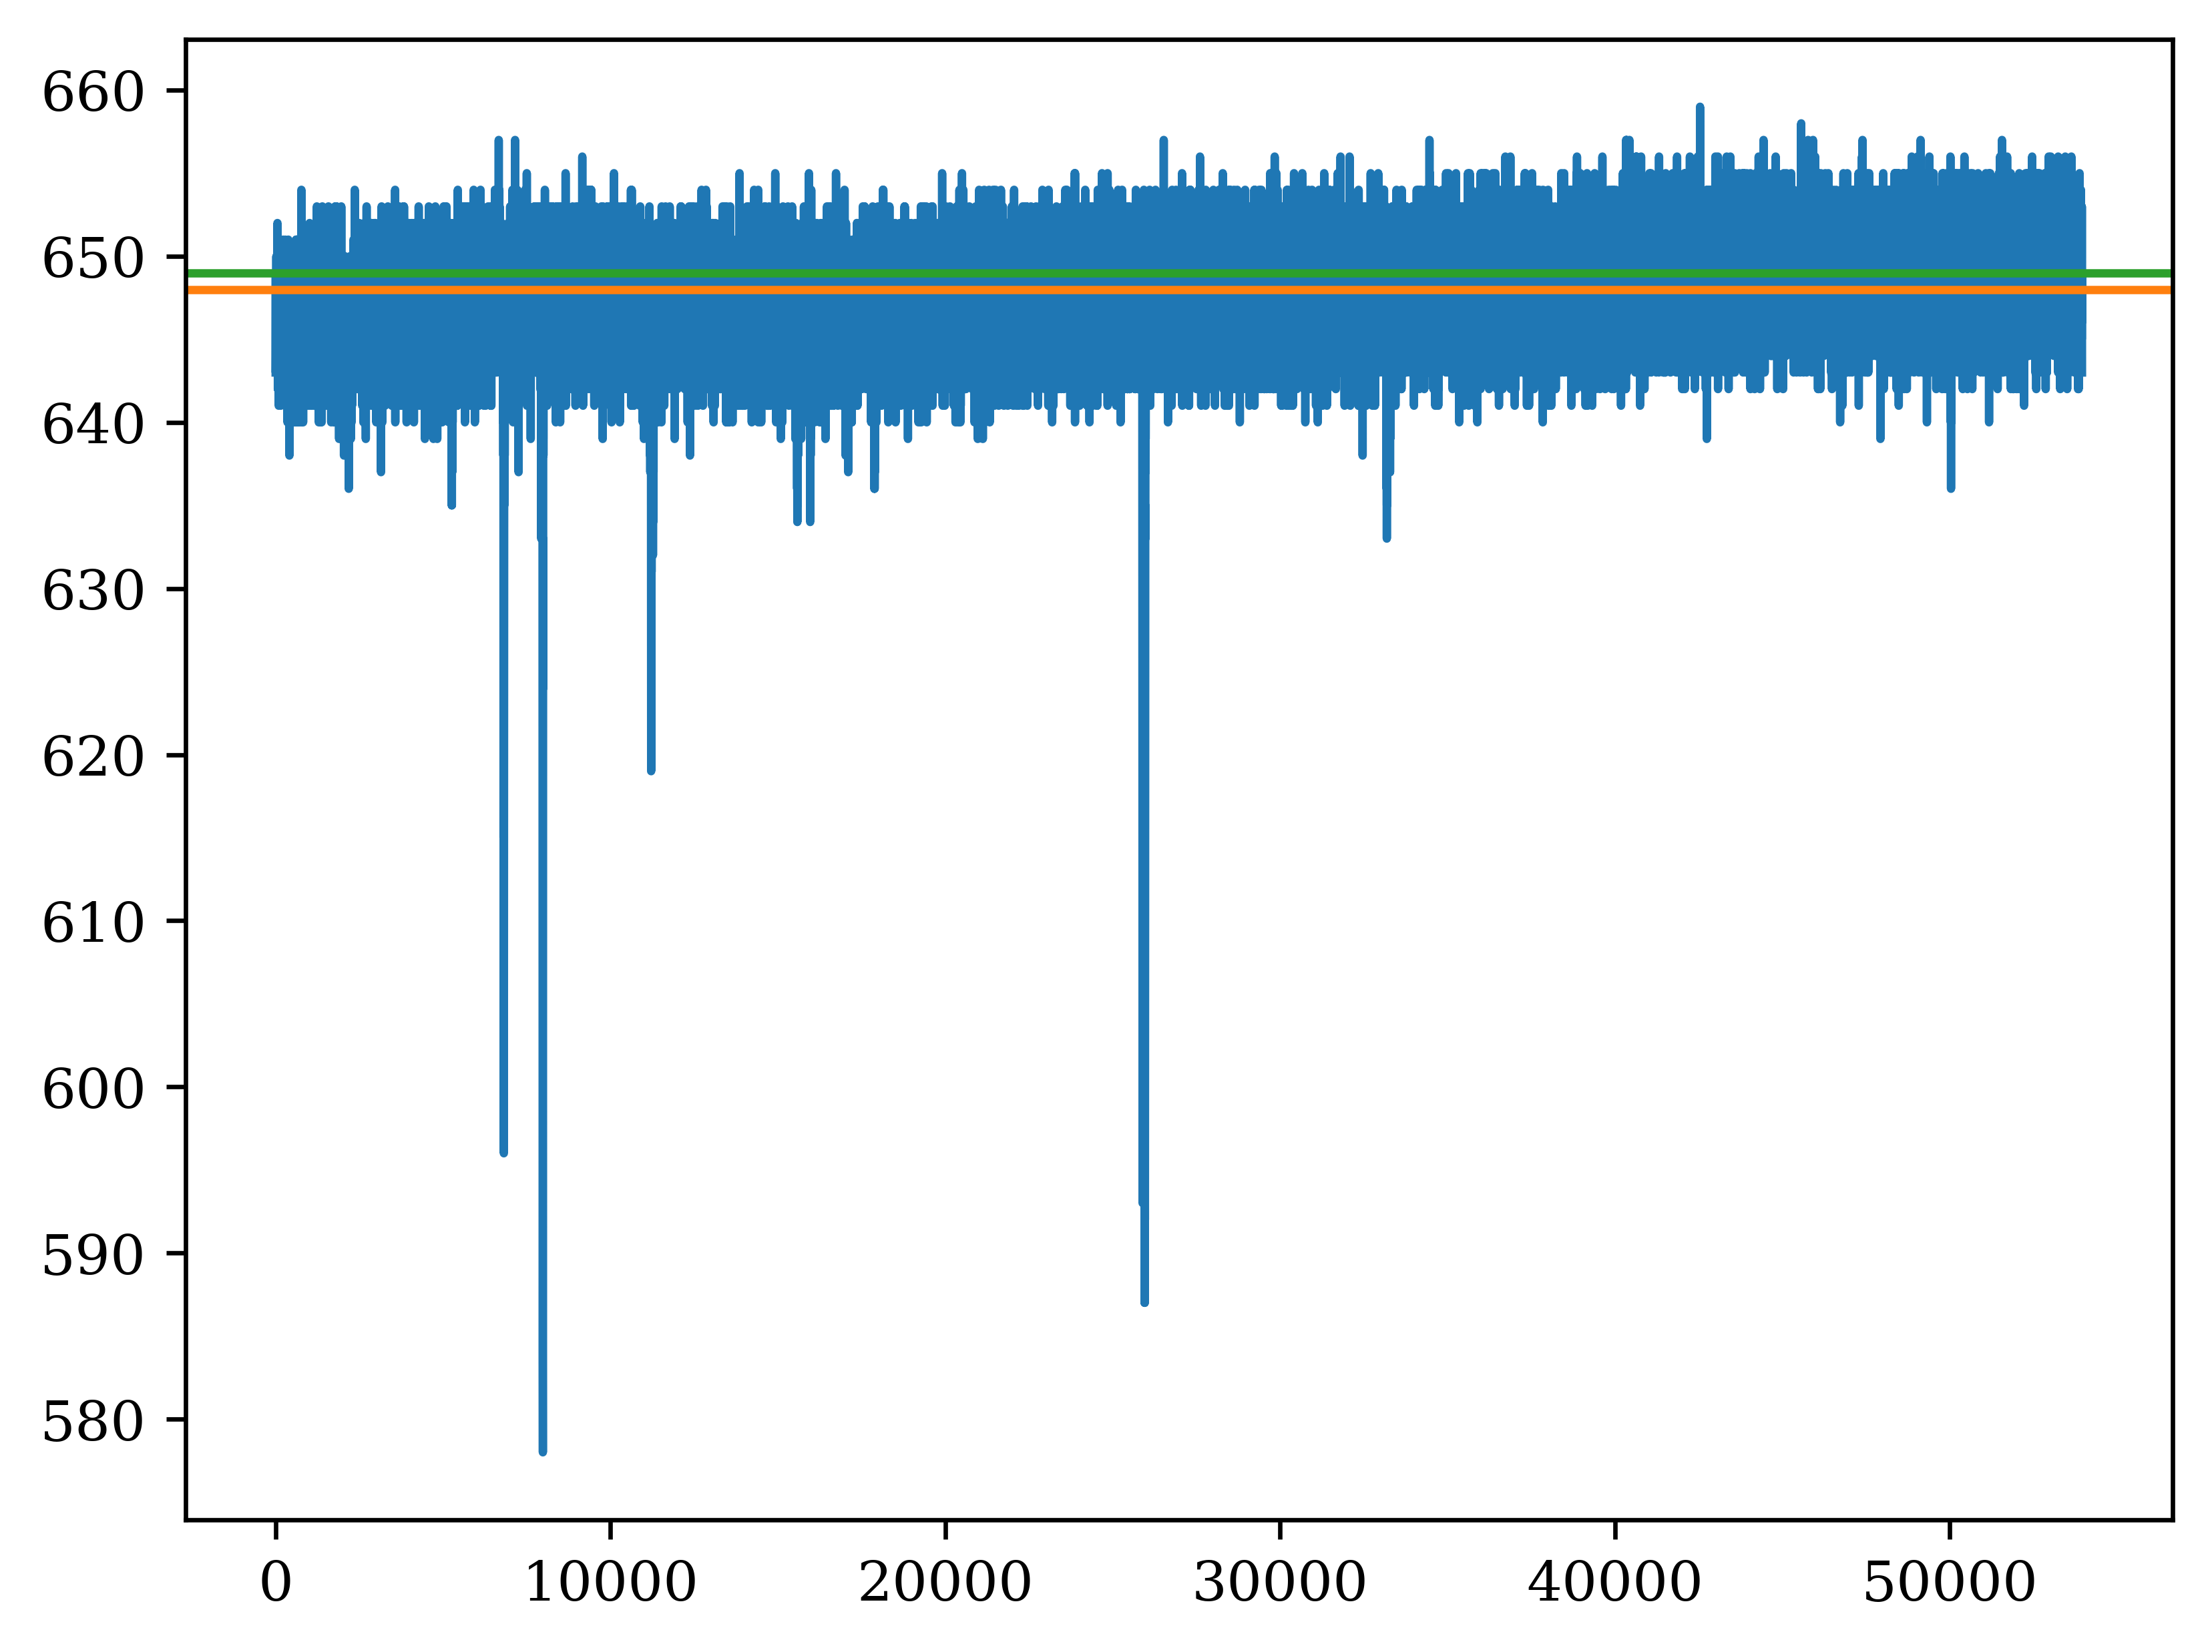

In [42]:
plt.plot(px)
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')

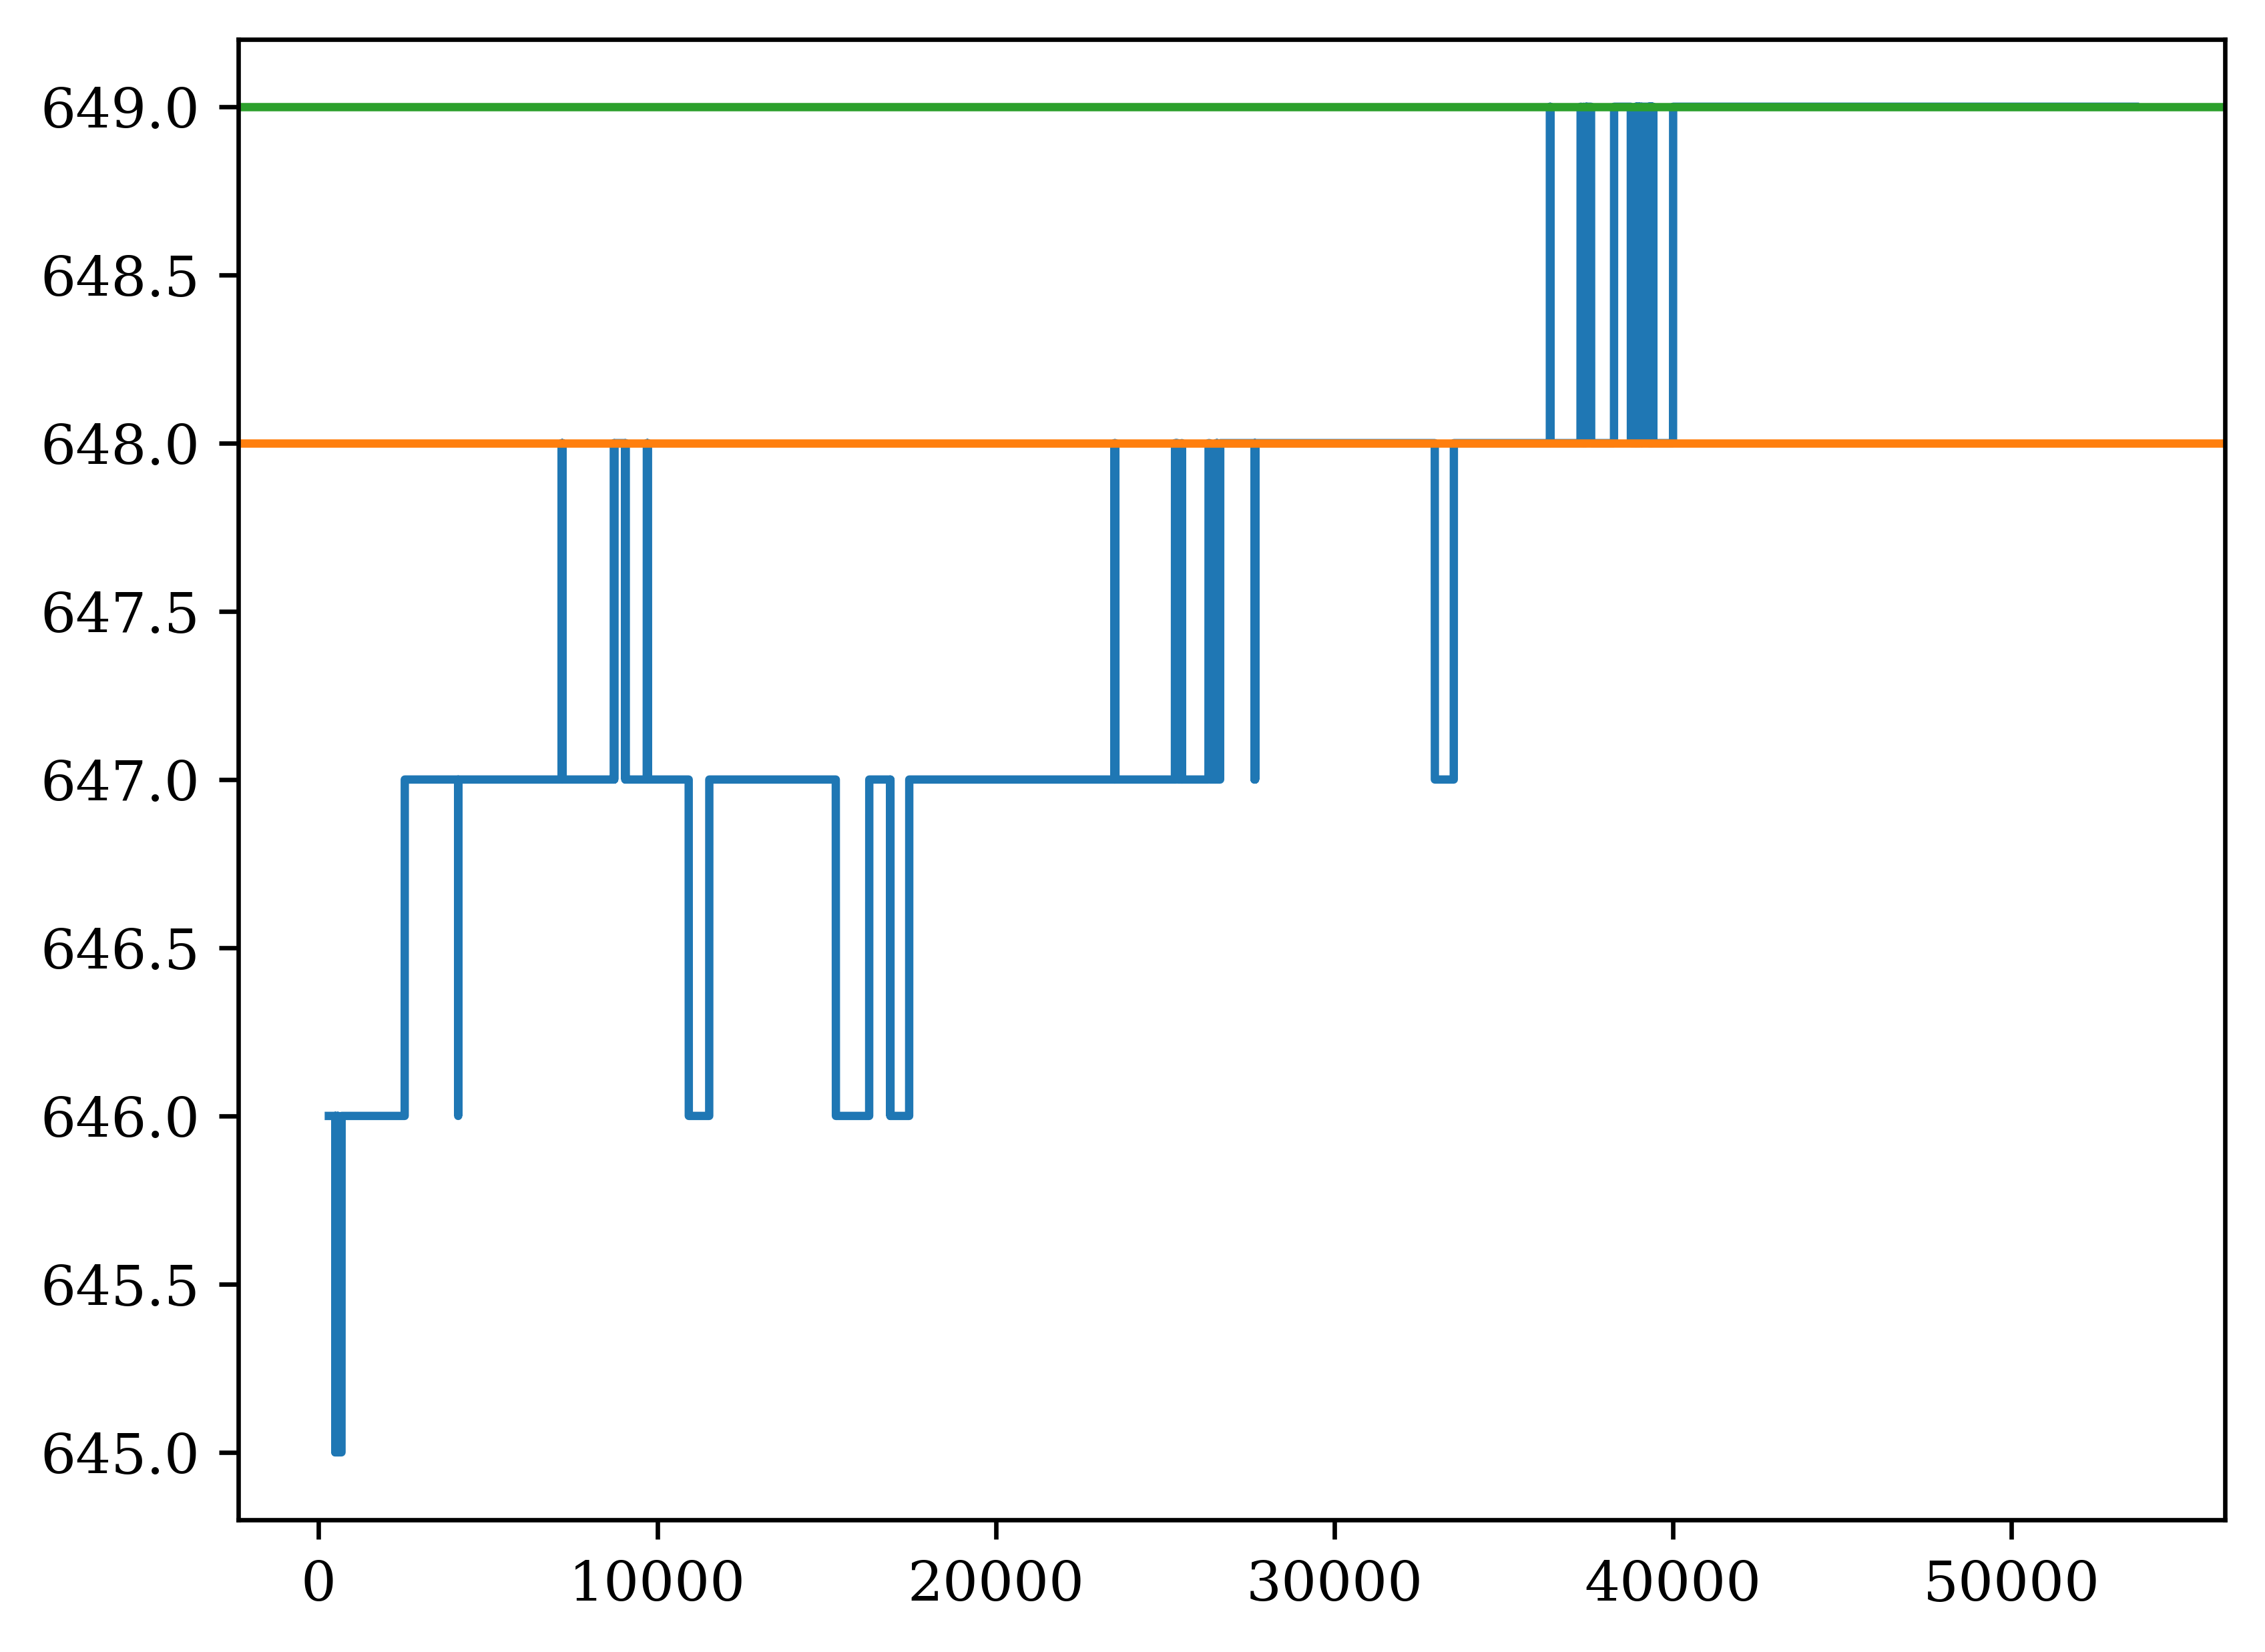

In [43]:
plt.plot(px.rolling(601, center=True).median())
plt.axhline(px.median(), color='C1')
plt.axhline(px.iloc[-10000:].median(), color='C2')